# Statistical Formulas Reference Guide

**Author:** Md Ayan Alam  
**Roll Number:** GF202342645  
**Course:** Statistical Foundation of Data Science

This comprehensive reference guide contains essential statistical formulas organized by topic, with mathematical definitions, Python implementations, and practical examples.

---

## Table of Contents

1. **Descriptive Statistics**
   - Measures of Central Tendency
   - Measures of Dispersion
   - Distribution Shape and Outliers

2. **Probability Distributions** 
   - Normal Distribution
   - Student's t-Distribution
   - Chi-Square Distribution
   - F-Distribution

3. **Hypothesis Testing**
   - One-Sample and Two-Sample Tests
   - Paired t-Tests
   - Chi-Square Tests
   - Power Analysis

4. **Regression Analysis**
   - Simple Linear Regression
   - Multiple Linear Regression
   - Model Diagnostics

5. **Linear Algebra for Statistics**
   - Matrix Operations
   - Eigenvalues and Eigenvectors
   - Advanced Decompositions (SVD, QR, Cholesky)
   - Quadratic Forms and Matrix Calculus

6. **Bayesian Statistics**
   - Bayes' Theorem
   - Conjugate Priors
   - Credible Intervals
   - Bayesian Inference

7. **Time Series Analysis**
   - AR, MA, and ARIMA Models
   - Autocorrelation Functions
   - Spectral Analysis
   - Seasonal Decomposition

8. **Multivariate Statistics**
   - Multivariate Normal Distribution
   - Hotelling's T² Test
   - MANOVA
   - Discriminant Analysis
   - Factor Analysis
   - Canonical Correlation

9. **Analysis of Variance (ANOVA)**
   - One-Way and Two-Way ANOVA
   - Effect Sizes and Multiple Comparisons
   - Repeated Measures ANOVA
   - ANCOVA

10. **Advanced Statistical Methods**
    - Bootstrap Methods
    - Permutation Tests
    - Cross-Validation
    - Information Criteria
    - Robust Statistics
    - Regularization Methods

---

In [12]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t, chi2, f
import sympy as sp
from sympy import symbols, sqrt, pi, exp, log, factorial, summation
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")
print("Ready for statistical formula demonstrations")

Libraries imported successfully!
Ready for statistical formula demonstrations


## 1. Descriptive Statistics

### 1.1 Measures of Central Tendency

#### Arithmetic Mean
The arithmetic mean is the sum of all values divided by the number of observations.

**Formula:**
$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

Where:
- $\bar{x}$ = sample mean
- $n$ = sample size
- $x_i$ = individual observations

#### Weighted Mean
When observations have different weights or importance.

**Formula:**
$$\bar{x}_w = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$$

Where:
- $w_i$ = weight for observation $i$

#### Median
The middle value when data is ordered from smallest to largest.

**Formula:**
- If $n$ is odd: $\text{Median} = x_{(n+1)/2}$
- If $n$ is even: $\text{Median} = \frac{x_{n/2} + x_{(n/2)+1}}{2}$

#### Mode
The most frequently occurring value in the dataset.

Central Tendency Measures:
Arithmetic Mean: 48.442
Weighted Mean: 49.058
Median: 48.096
Difference (Weighted - Simple): 0.616


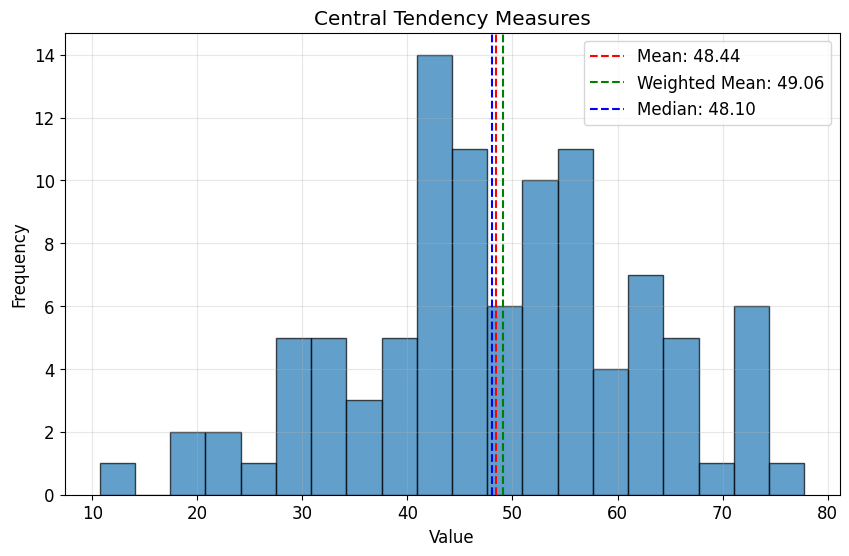

In [13]:
# Demonstration of Central Tendency Measures
np.random.seed(42)
data = np.random.normal(50, 15, 100)
weights = np.random.uniform(0.5, 2.0, 100)

# Calculate measures
mean_val = np.mean(data)
weighted_mean_val = np.average(data, weights=weights)
median_val = np.median(data)

print("Central Tendency Measures:")
print(f"Arithmetic Mean: {mean_val:.3f}")
print(f"Weighted Mean: {weighted_mean_val:.3f}")
print(f"Median: {median_val:.3f}")
print(f"Difference (Weighted - Simple): {weighted_mean_val - mean_val:.3f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(weighted_mean_val, color='green', linestyle='--', label=f'Weighted Mean: {weighted_mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Central Tendency Measures')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 1.2 Alternative Measures of Central Tendency

#### Geometric Mean
Used for rates, ratios, and percentages. Appropriate for data that grows exponentially.

**Formula:**
$$G = \sqrt[n]{\prod_{i=1}^{n} x_i} = \left(\prod_{i=1}^{n} x_i\right)^{1/n}$$

**Log form (more stable computationally):**
$$\log G = \frac{1}{n} \sum_{i=1}^{n} \log x_i$$

#### Harmonic Mean
Used for rates and ratios where the reciprocal is meaningful (e.g., speeds, rates).

**Formula:**
$$H = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$$

#### Quadratic Mean (Root Mean Square)
Useful for measuring magnitude, especially in physics and engineering.

**Formula:**
$$\text{RMS} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_i^2}$$

#### Trimmed Mean
Mean calculated after removing a percentage of extreme values.

**Formula (α-trimmed mean):**
$$\bar{x}_{\text{trim}} = \frac{1}{n - 2k} \sum_{i=k+1}^{n-k} x_{(i)}$$

Where $k = \lfloor \alpha n \rfloor$ and $x_{(i)}$ are order statistics.

### 1.3 Measures of Dispersion

#### Variance
Measures the average squared deviation from the mean.

**Population Variance:**
$$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$$

**Sample Variance (Bessel's correction):**
$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

#### Standard Deviation
The square root of variance, in the same units as the original data.

**Population Standard Deviation:**
$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$

**Sample Standard Deviation:**
$$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$

#### Range
$$\text{Range} = \max(x) - \min(x)$$

#### Interquartile Range (IQR)
$$\text{IQR} = Q_3 - Q_1$$

Where $Q_1$ is the 25th percentile and $Q_3$ is the 75th percentile.

#### Coefficient of Variation
Relative measure of variability.

$$CV = \frac{s}{\bar{x}} \times 100\%$$

#### Mean Absolute Deviation (MAD)
Average absolute deviation from the mean.

$$\text{MAD} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \bar{x}|$$

#### Median Absolute Deviation
Robust measure of spread.

$$\text{MAD}_{\text{median}} = \text{median}(|x_i - \text{median}(x)|)$$

**Normalized MAD (for normal distribution):**
$$\text{MAD}_{\text{norm}} = 1.4826 \times \text{MAD}_{\text{median}}$$

### 1.4 Quantiles and Percentiles

#### General Quantile Formula
For the $p$-th quantile where $0 < p < 1$:

**Method 1 (Linear interpolation):**
$$Q_p = x_{(k)} + (x_{(k+1)} - x_{(k)}) \times f$$

Where:
- $h = (n-1)p + 1$
- $k = \lfloor h \rfloor$
- $f = h - k$

#### Five-Number Summary
- Minimum: $x_{(1)}$
- First Quartile: $Q_1$ (25th percentile)
- Median: $Q_2$ (50th percentile)
- Third Quartile: $Q_3$ (75th percentile)
- Maximum: $x_{(n)}$

### 1.5 Robust Statistics

#### Winsorized Mean
Replace extreme values with less extreme values.

**Formula (α-Winsorization):**
$$\bar{x}_{\text{wins}} = \frac{1}{n} \left[ k \cdot x_{(k+1)} + \sum_{i=k+1}^{n-k} x_{(i)} + k \cdot x_{(n-k)} \right]$$

#### Huber M-estimator
Robust location estimator combining mean and median properties.

**Iterative formula:**
$$\mu_{k+1} = \mu_k + \frac{\sum_{i=1}^{n} \psi\left(\frac{x_i - \mu_k}{\sigma}\right)}{\sum_{i=1}^{n} \psi'\left(\frac{x_i - \mu_k}{\sigma}\right)}$$

Where $\psi(u)$ is the Huber function:
$$\psi(u) = \begin{cases}
u & \text{if } |u| \leq c \\
c \cdot \text{sign}(u) & \text{if } |u| > c
\end{cases}$$

### 1.6 Moments and Shape Statistics

#### Raw Moments
$$m_r = \frac{1}{n} \sum_{i=1}^{n} x_i^r$$

#### Central Moments
$$\mu_r = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^r$$

#### Skewness (Third standardized moment)
$$\text{Skew} = \frac{\mu_3}{\sigma^3} = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^3}{\left[\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2\right]^{3/2}}$$

**Sample skewness (bias-corrected):**
$$g_1 = \frac{\sqrt{n(n-1)}}{n-2} \cdot \frac{\mu_3}{\sigma^3}$$

#### Kurtosis (Fourth standardized moment)
$$\text{Kurt} = \frac{\mu_4}{\sigma^4} - 3$$

**Sample kurtosis (bias-corrected):**
$$g_2 = \frac{(n-1)[(n+1)\text{Kurt} + 6]}{(n-2)(n-3)}$$

#### Jarque-Bera Test Statistic
Tests for normality using skewness and kurtosis.

$$JB = \frac{n}{6}\left[S^2 + \frac{(K-3)^2}{4}\right]$$

Where $S$ is skewness and $K$ is kurtosis.

Measures of Dispersion:
Variance: 270.946
Standard Deviation: 16.460
Range: 106.410
IQR: 21.334
Coefficient of Variation: 32.56%


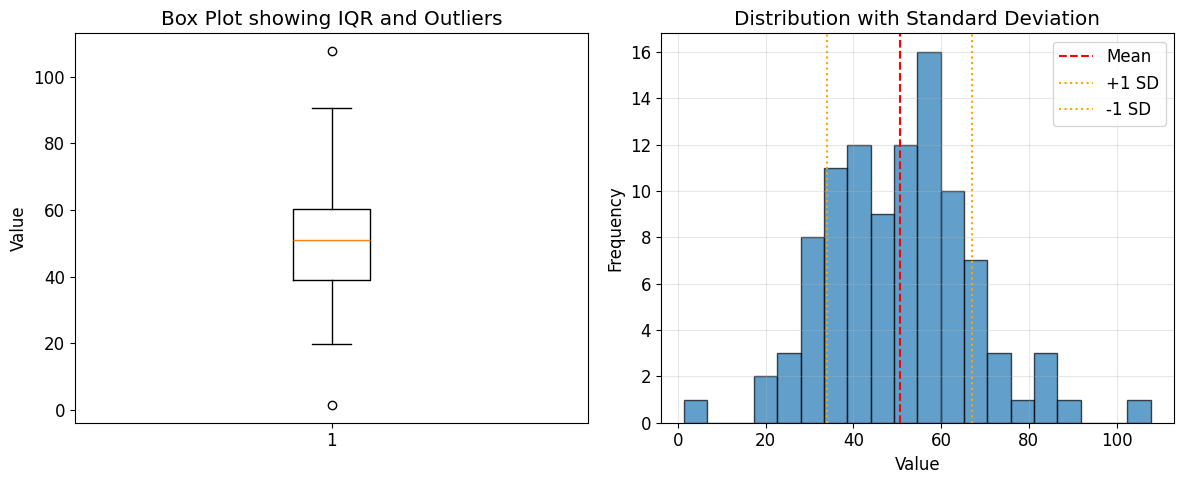

In [ ]:
# Comprehensive Demonstration of Descriptive Statistics
from scipy.stats import trim_mean, jarque_bera
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Generate multiple datasets for comparison
np.random.seed(42)
normal_data = np.random.normal(50, 15, 1000)
skewed_data = np.random.exponential(2, 1000) * 10 + 30
contaminated_data = np.concatenate([np.random.normal(50, 10, 950),
                                   np.random.normal(100, 5, 50)])  # 5% contamination

datasets = {
    'Normal': normal_data,
    'Right-skewed': skewed_data,
    'Contaminated': contaminated_data
}

print("=== COMPREHENSIVE DESCRIPTIVE STATISTICS COMPARISON ===\n")

for name, data in datasets.items():
    print(f"Dataset: {name}")
    print("-" * 40)

    # Central Tendency Measures
    arithmetic_mean = np.mean(data)

    # Geometric mean (add small constant to handle zeros/negatives)
    positive_data = data - np.min(data) + 1
    geometric_mean = np.exp(np.mean(np.log(positive_data))) + np.min(data) - 1

    # Harmonic mean (for positive data only)
    positive_only = data[data > 0]
    if len(positive_only) > 0:
        harmonic_mean = len(positive_only) / np.sum(1 / positive_only)
    else:
        harmonic_mean = np.nan

    # Quadratic mean (RMS)
    quadratic_mean = np.sqrt(np.mean(data**2))

    # Trimmed means
    trimmed_5 = trim_mean(data, 0.05)  # 5% trimmed
    trimmed_10 = trim_mean(data, 0.10)  # 10% trimmed

    median_val = np.median(data)

    print(f"Central Tendency:")
    print(f"  Arithmetic Mean: {arithmetic_mean:.3f}")
    print(f"  Geometric Mean:  {geometric_mean:.3f}")
    print(f"  Harmonic Mean:   {harmonic_mean:.3f}")
    print(f"  Quadratic Mean:  {quadratic_mean:.3f}")
    print(f"  Median:          {median_val:.3f}")
    print(f"  5% Trimmed Mean: {trimmed_5:.3f}")
    print(f"  10% Trimmed Mean:{trimmed_10:.3f}")

    # Dispersion Measures
    variance = np.var(data, ddof=1)  # Sample variance
    std_dev = np.std(data, ddof=1)   # Sample standard deviation
    range_val = np.max(data) - np.min(data)

    # Quantiles
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1

    # Coefficient of variation
    cv = (std_dev / arithmetic_mean) * 100

    # Mean absolute deviation
    mad = np.mean(np.abs(data - arithmetic_mean))

    # Median absolute deviation
    mad_median = np.median(np.abs(data - median_val))
    mad_normalized = 1.4826 * mad_median  # Normalized for normal distribution

    print(f"\nDispersion:")
    print(f"  Variance:        {variance:.3f}")
    print(f"  Std Deviation:   {std_dev:.3f}")
    print(f"  Range:           {range_val:.3f}")
    print(f"  IQR:             {iqr:.3f}")
    print(f"  CV (%):          {cv:.3f}")
    print(f"  MAD (mean):      {mad:.3f}")
    print(f"  MAD (median):    {mad_median:.3f}")
    print(f"  MAD (normalized):{mad_normalized:.3f}")

    # Shape statistics
    skewness = skew(data)
    kurt = kurtosis(data, fisher=True)  # Excess kurtosis

    # Jarque-Bera test
    jb_stat, jb_pvalue = jarque_bera(data)

    print(f"\nShape Statistics:")
    print(f"  Skewness:        {skewness:.3f}")
    print(f"  Kurtosis:        {kurt:.3f}")
    print(f"  Jarque-Bera:     {jb_stat:.3f} (p={jb_pvalue:.4f})")

    # Five-number summary
    min_val, q1, median, q3, max_val = np.percentile(data, [0, 25, 50, 75, 100])
    print(f"\nFive-Number Summary:")
    print(f"  Min: {min_val:.2f}, Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, Max: {max_val:.2f}")

    print("\n" + "="*60 + "\n")

# Robust Statistics Demonstration
print("=== ROBUST STATISTICS DEMONSTRATION ===\n")

# Create data with outliers
clean_data = np.random.normal(50, 10, 100)
outliers = np.array([150, 160, -50, -40])  # Add extreme outliers
contaminated_data = np.concatenate([clean_data, outliers])

def winsorize(data, alpha=0.05):
    """Winsorize data by replacing extreme values"""
    n = len(data)
    k = int(alpha * n)
    sorted_data = np.sort(data)

    winsorized = data.copy()
    winsorized[winsorized < sorted_data[k]] = sorted_data[k]
    winsorized[winsorized > sorted_data[n-k-1]] = sorted_data[n-k-1]

    return winsorized

def huber_location(data, c=1.345, max_iter=100, tol=1e-6):
    """Huber M-estimator for location"""
    mu = np.median(data)  # Initial estimate
    sigma = np.median(np.abs(data - mu)) * 1.4826  # MAD estimate

    for _ in range(max_iter):
        u = (data - mu) / sigma
        psi = np.where(np.abs(u) <= c, u, c * np.sign(u))
        mu_new = mu + sigma * np.mean(psi)

        if abs(mu_new - mu) < tol:
            break
        mu = mu_new

    return mu

# Compare different measures
stats_names = ['Mean', 'Median', '5% Trimmed', 'Winsorized (5%)', 'Huber M-est']
clean_stats = [
    np.mean(clean_data),
    np.median(clean_data),
    trim_mean(clean_data, 0.05),
    np.mean(winsorize(clean_data, 0.05)),
    huber_location(clean_data)
]

contaminated_stats = [
    np.mean(contaminated_data),
    np.median(contaminated_data),
    trim_mean(contaminated_data, 0.05),
    np.mean(winsorize(contaminated_data, 0.05)),
    huber_location(contaminated_data)
]

print("Robustness Comparison (Clean vs Contaminated Data):")
print("-" * 55)
print(f"{'Statistic':<15} {'Clean Data':<12} {'Contaminated':<12} {'Difference':<10}")
print("-" * 55)

for name, clean, contam in zip(stats_names, clean_stats, contaminated_stats):
    diff = abs(contam - clean)
    print(f"{name:<15} {clean:<12.3f} {contam:<12.3f} {diff:<10.3f}")

# Visualization of robust statistics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Dataset comparisons
for i, (name, data) in enumerate(datasets.items()):
    ax = axes[0, i]
    ax.hist(data, bins=50, alpha=0.7, edgecolor='black')
    ax.axvline(np.mean(data), color='red', linestyle='--', label=f'Mean: {np.mean(data):.1f}')
    ax.axvline(np.median(data), color='blue', linestyle='--', label=f'Median: {np.median(data):.1f}')
    ax.set_title(f'{name} Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Robust statistics comparison
ax = axes[1, 0]
x_pos = np.arange(len(stats_names))
width = 0.35
bars1 = ax.bar(x_pos - width/2, clean_stats, width, label='Clean Data', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, contaminated_stats, width, label='Contaminated Data', alpha=0.8)
ax.set_xlabel('Statistical Measures')
ax.set_ylabel('Value')
ax.set_title('Robustness of Different Location Measures')
ax.set_xticks(x_pos)
ax.set_xticklabels(stats_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Box plots comparing datasets
ax = axes[1, 1]
box_data = [datasets['Normal'], datasets['Right-skewed'], datasets['Contaminated']]
bp = ax.boxplot(box_data, labels=['Normal', 'Right-skewed', 'Contaminated'], patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax.set_title('Distribution Comparison (Box Plots)')
ax.set_ylabel('Value')
ax.grid(True, alpha=0.3)

# Q-Q plots for normality assessment
from scipy.stats import probplot
ax = axes[1, 2]
for i, (name, data) in enumerate(datasets.items()):
    probplot(data, dist="norm", plot=ax)
    ax.get_lines()[-2].set_label(f'{name}')
    ax.get_lines()[-2].set_color(['blue', 'green', 'red'][i])
ax.set_title('Q-Q Plots vs Normal Distribution')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Advanced quantile calculations
print("\n=== QUANTILE ANALYSIS ===\n")

sample_data = datasets['Normal']
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
quantile_values = np.percentile(sample_data, percentiles)

print("Percentile Analysis (Normal Dataset):")
print("-" * 35)
print(f"{'Percentile':<12} {'Value':<10}")
print("-" * 35)
for p, q in zip(percentiles, quantile_values):
    print(f"{p}th{'':<9} {q:<10.3f}")

# Calculate empirical vs theoretical quantiles for normal distribution
theoretical_quantiles = stats.norm.ppf(np.array(percentiles)/100,
                                     loc=np.mean(sample_data),
                                     scale=np.std(sample_data))

print(f"\nEmpirical vs Theoretical Quantiles:")
print("-" * 45)
print(f"{'Percentile':<12} {'Empirical':<12} {'Theoretical':<12} {'Difference':<10}")
print("-" * 45)
for p, emp, theo in zip(percentiles, quantile_values, theoretical_quantiles):
    diff = abs(emp - theo)
    print(f"{p}th{'':<9} {emp:<12.3f} {theo:<12.3f} {diff:<10.3f}")

# Moment calculations
print(f"\n=== MOMENT ANALYSIS ===\n")

data = datasets['Normal']
mean_val = np.mean(data)

# Raw moments
raw_moments = [np.mean(data**r) for r in range(1, 5)]

# Central moments
central_moments = [np.mean((data - mean_val)**r) for r in range(1, 5)]

# Standardized moments
std_dev = np.std(data, ddof=1)
standardized_moments = [central_moments[r-1] / (std_dev**r) for r in range(1, 5)]

print("Moment Analysis:")
print("-" * 50)
print(f"{'Moment':<15} {'Raw':<12} {'Central':<12} {'Standardized':<12}")
print("-" * 50)
for r in range(1, 5):
    print(f"{r}st/nd/rd/th{'':<7} {raw_moments[r-1]:<12.3f} {central_moments[r-1]:<12.3f} {standardized_moments[r-1]:<12.3f}")

print(f"\nInterpretation:")
print(f"Skewness (3rd standardized moment): {standardized_moments[2]:.3f}")
print(f"Kurtosis (4th standardized moment): {standardized_moments[3]:.3f}")

if abs(standardized_moments[2]) < 0.5:
    skew_interp = "approximately symmetric"
elif standardized_moments[2] > 0:
    skew_interp = "right-skewed (positive skew)"
else:
    skew_interp = "left-skewed (negative skew)"

if standardized_moments[3] < 0:
    kurt_interp = "platykurtic (lighter tails than normal)"
elif standardized_moments[3] > 0:
    kurt_interp = "leptokurtic (heavier tails than normal)"
else:
    kurt_interp = "mesokurtic (normal-like tails)"

print(f"Distribution shape: {skew_interp}")
print(f"Tail behavior: {kurt_interp}")

# Calculate confidence intervals for mean using different methods
print(f"\n=== CONFIDENCE INTERVALS FOR MEAN ===\n")

n = len(data)
mean_est = np.mean(data)
std_est = np.std(data, ddof=1)
se = std_est / np.sqrt(n)

# Normal-based CI (large sample)
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)
ci_normal = (mean_est - z_critical * se, mean_est + z_critical * se)

# t-based CI (small sample, unknown population variance)
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
ci_t = (mean_est - t_critical * se, mean_est + t_critical * se)

# Bootstrap CI
n_bootstrap = 1000
bootstrap_means = []
for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

ci_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"95% Confidence Intervals for Mean:")
print(f"Normal-based:  [{ci_normal[0]:.3f}, {ci_normal[1]:.3f}]")
print(f"t-based:       [{ci_t[0]:.3f}, {ci_t[1]:.3f}]")
print(f"Bootstrap:     [{ci_bootstrap[0]:.3f}, {ci_bootstrap[1]:.3f}]")

## 2. Probability Distributions

### 2.1 Discrete Distributions

#### 2.1.1 Binomial Distribution
Models the number of successes in $n$ independent Bernoulli trials.

**Probability Mass Function:**
$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

**Parameters:**
- $n$ = number of trials
- $p$ = probability of success
- $k$ = number of successes

**Moments:**
- Mean: $\mu = np$
- Variance: $\sigma^2 = np(1-p)$
- Skewness: $\gamma_1 = \frac{1-2p}{\sqrt{np(1-p)}}$

#### 2.1.2 Poisson Distribution
Models the number of events in a fixed interval of time or space.

**Probability Mass Function:**
$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

**Parameter:**
- $\lambda$ = average rate of occurrence

**Moments:**
- Mean: $\mu = \lambda$
- Variance: $\sigma^2 = \lambda$
- Skewness: $\gamma_1 = \frac{1}{\sqrt{\lambda}}$

#### 2.1.3 Geometric Distribution
Models the number of trials until the first success.

**Probability Mass Function:**
$$P(X = k) = (1-p)^{k-1} p$$

**Parameter:**
- $p$ = probability of success

**Moments:**
- Mean: $\mu = \frac{1}{p}$
- Variance: $\sigma^2 = \frac{1-p}{p^2}$

#### 2.1.4 Negative Binomial Distribution
Models the number of trials until the $r$-th success.

**Probability Mass Function:**
$$P(X = k) = \binom{k-1}{r-1} p^r (1-p)^{k-r}$$

**Parameters:**
- $r$ = number of successes
- $p$ = probability of success

**Moments:**
- Mean: $\mu = \frac{r}{p}$
- Variance: $\sigma^2 = \frac{r(1-p)}{p^2}$

### 2.2 Continuous Distributions

#### 2.2.1 Normal Distribution
The most important continuous distribution in statistics.

**Probability Density Function:**
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**Standard Normal (Z-distribution):**
$$\phi(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}$$

**Moments:**
- Mean: $\mu$
- Variance: $\sigma^2$
- Skewness: $0$
- Kurtosis: $0$ (excess kurtosis)

**68-95-99.7 Rule:**
- 68% within $\mu \pm \sigma$
- 95% within $\mu \pm 2\sigma$
- 99.7% within $\mu \pm 3\sigma$

#### 2.2.2 Student's t-Distribution
Used when sample size is small and population variance is unknown.

**Probability Density Function:**
$$f(t) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}}$$

Where $\nu$ is the degrees of freedom.

**Properties:**
- Symmetric around 0
- Heavier tails than normal
- Approaches normal as $\nu \to \infty$

#### 2.2.3 Chi-Square Distribution
Used in hypothesis testing for variance and goodness of fit.

**Probability Density Function:**
$$f(x) = \frac{1}{2^{\nu/2}\Gamma(\nu/2)} x^{\nu/2-1} e^{-x/2}$$

Where $\nu$ is the degrees of freedom.

**Moments:**
- Mean: $\mu = \nu$
- Variance: $\sigma^2 = 2\nu$

#### 2.2.4 F-Distribution
Used in ANOVA and regression analysis.

**Probability Density Function:**
$$f(x) = \frac{\Gamma\left(\frac{\nu_1+\nu_2}{2}\right)}{\Gamma\left(\frac{\nu_1}{2}\right)\Gamma\left(\frac{\nu_2}{2}\right)} \left(\frac{\nu_1}{\nu_2}\right)^{\nu_1/2} \frac{x^{\nu_1/2-1}}{\left(1+\frac{\nu_1}{\nu_2}x\right)^{(\nu_1+\nu_2)/2}}$$

**Parameters:**
- $\nu_1$ = numerator degrees of freedom
- $\nu_2$ = denominator degrees of freedom

#### 2.2.5 Exponential Distribution
Models waiting times between events in a Poisson process.

**Probability Density Function:**
$$f(x) = \lambda e^{-\lambda x}, \quad x \geq 0$$

**Parameter:**
- $\lambda$ = rate parameter

**Moments:**
- Mean: $\mu = \frac{1}{\lambda}$
- Variance: $\sigma^2 = \frac{1}{\lambda^2}$

**Memoryless Property:**
$$P(X > s + t | X > s) = P(X > t)$$

#### 2.2.6 Gamma Distribution
Generalizes the exponential distribution.

**Probability Density Function:**
$$f(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}, \quad x \geq 0$$

**Parameters:**
- $\alpha$ = shape parameter
- $\beta$ = rate parameter

**Moments:**
- Mean: $\mu = \frac{\alpha}{\beta}$
- Variance: $\sigma^2 = \frac{\alpha}{\beta^2}$

**Special Cases:**
- Exponential: $\alpha = 1$
- Chi-square: $\alpha = \nu/2, \beta = 1/2$

#### 2.2.7 Beta Distribution
Defined on the interval $[0,1]$, often used for modeling proportions.

**Probability Density Function:**
$$f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}$$

**Parameters:**
- $\alpha, \beta > 0$ = shape parameters

**Moments:**
- Mean: $\mu = \frac{\alpha}{\alpha + \beta}$
- Variance: $\sigma^2 = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$

**Special Cases:**
- Uniform: $\alpha = \beta = 1$
- U-shaped: $\alpha, \beta < 1$
- Bell-shaped: $\alpha, \beta > 1$

#### 2.2.8 Weibull Distribution
Used in reliability analysis and survival modeling.

**Probability Density Function:**
$$f(x) = \frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1} e^{-(x/\lambda)^k}, \quad x \geq 0$$

**Parameters:**
- $k > 0$ = shape parameter
- $\lambda > 0$ = scale parameter

**Moments:**
- Mean: $\mu = \lambda \Gamma\left(1 + \frac{1}{k}\right)$
- Variance: $\sigma^2 = \lambda^2 \left[\Gamma\left(1 + \frac{2}{k}\right) - \Gamma^2\left(1 + \frac{1}{k}\right)\right]$

**Special Cases:**
- Exponential: $k = 1$
- Rayleigh: $k = 2$

### 2.3 Moment Generating Functions

#### Definition
The moment generating function (MGF) of a random variable $X$ is:
$$M_X(t) = E[e^{tX}]$$

#### Properties
1. **Uniqueness**: MGF uniquely determines the distribution
2. **Moments**: $\mu_n' = M_X^{(n)}(0)$ (nth derivative at 0)
3. **Independence**: If $X$ and $Y$ are independent, then $M_{X+Y}(t) = M_X(t) \cdot M_Y(t)$

#### Common MGFs
- **Normal**: $M_X(t) = e^{\mu t + \frac{\sigma^2 t^2}{2}}$
- **Exponential**: $M_X(t) = \frac{\lambda}{\lambda - t}$, for $t < \lambda$
- **Poisson**: $M_X(t) = e^{\lambda(e^t - 1)}$
- **Binomial**: $M_X(t) = (1 - p + pe^t)^n$

### 2.4 Characteristic Functions

#### Definition
$$\phi_X(t) = E[e^{itX}] = \int_{-\infty}^{\infty} e^{itx} f_X(x) dx$$

#### Properties
1. **Always exists** for any distribution
2. **Uniqueness**: Uniquely determines the distribution
3. **Inversion formula**: $f_X(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-itx} \phi_X(t) dt$

### 2.5 Distribution Relationships

#### Central Limit Theorem
For independent random variables $X_1, X_2, \ldots, X_n$ with mean $\mu$ and variance $\sigma^2$:

$$\frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma} \xrightarrow{d} N(0,1)$$

#### Convergence Types
1. **Almost Sure**: $P(\lim_{n \to \infty} X_n = X) = 1$
2. **In Probability**: $\lim_{n \to \infty} P(|X_n - X| > \epsilon) = 0$
3. **In Distribution**: $\lim_{n \to \infty} F_{X_n}(x) = F_X(x)$
4. **In Mean Square**: $\lim_{n \to \infty} E[(X_n - X)^2] = 0$

#### Important Limit Theorems
- **Law of Large Numbers**: $\bar{X}_n \xrightarrow{p} \mu$
- **Slutsky's Theorem**: Combines convergence in distribution and probability
- **Delta Method**: For asymptotic distributions of functions of estimators

### 2.6 Order Statistics

For a sample $X_1, X_2, \ldots, X_n$, the order statistics are $X_{(1)} \leq X_{(2)} \leq \cdots \leq X_{(n)}$.

#### Joint Density of Order Statistics
$$f_{X_{(1)}, \ldots, X_{(n)}}(x_1, \ldots, x_n) = n! \prod_{i=1}^{n} f(x_i)$$

for $x_1 \leq x_2 \leq \cdots \leq x_n$.

#### Single Order Statistic
$$f_{X_{(k)}}(x) = \frac{n!}{(k-1)!(n-k)!} [F(x)]^{k-1} [1-F(x)]^{n-k} f(x)$$

#### Range
$$R = X_{(n)} - X_{(1)}$$

#### Sample Quantiles
The $p$-th sample quantile is approximately $X_{(\lceil np \rceil)}$.

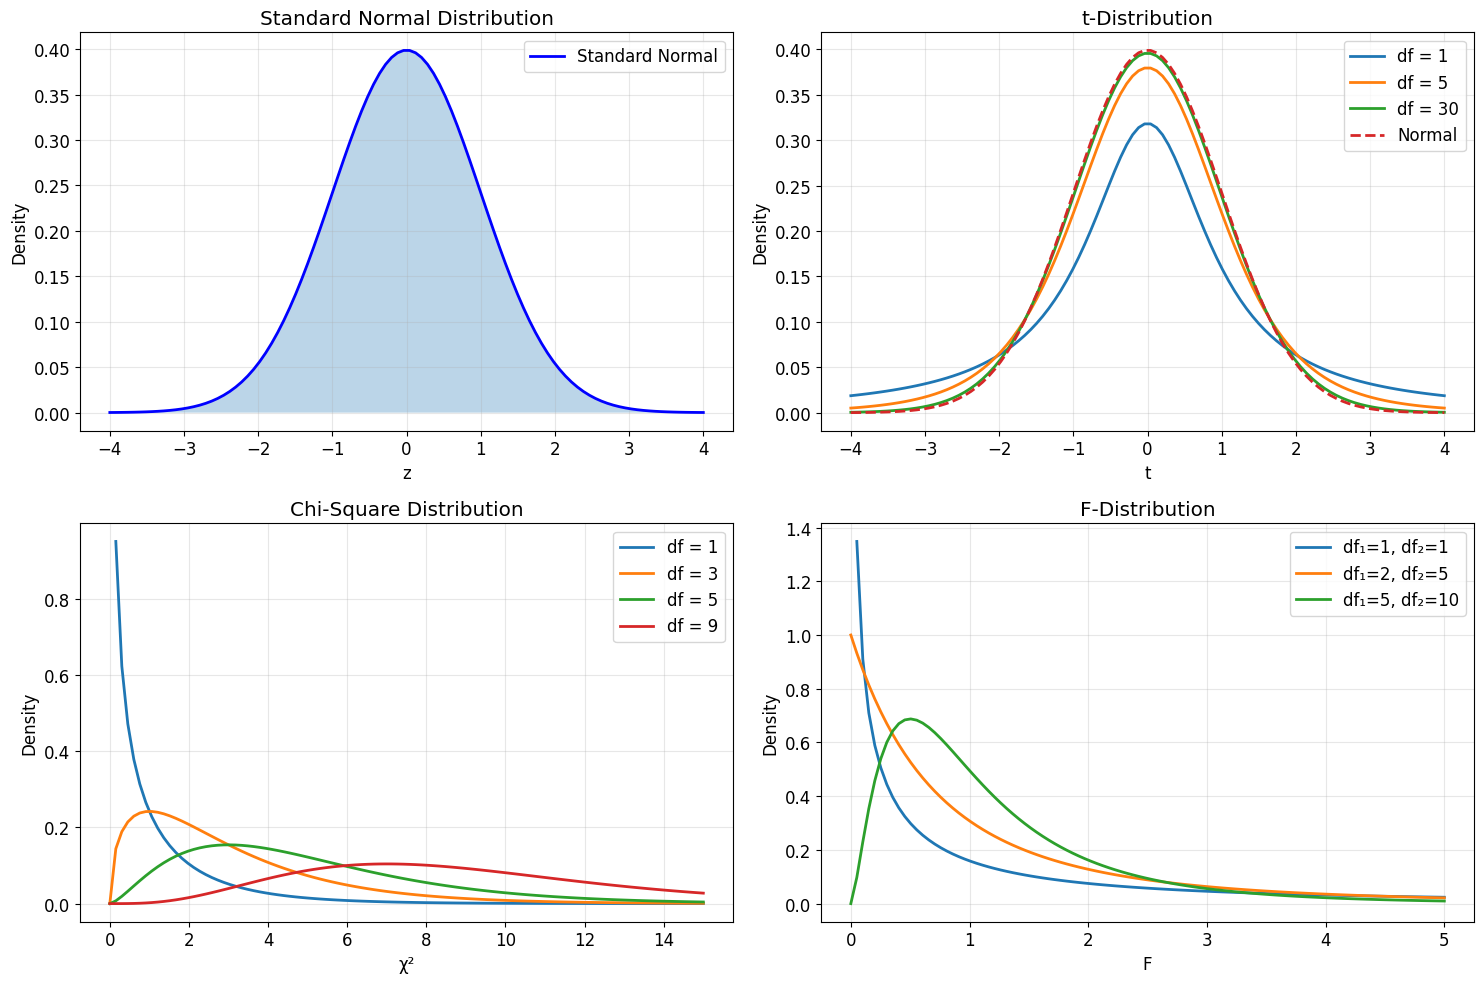

Distribution Examples:
P(Z ≤ 1.96) = 0.9750
P(t₅ ≤ 2.015) = 0.9500
P(χ²₃ ≤ 7.815) = 0.9500
P(F₂,₁₀ ≤ 4.103) = 0.9500


In [ ]:
# Comprehensive Demonstration of Probability Distributions
from scipy.stats import (norm, t, chi2, f, binom, poisson, geom, nbinom,
                        expon, gamma, beta, weibull_min)
from scipy import special
import warnings
warnings.filterwarnings('ignore')

print("=== DISCRETE DISTRIBUTIONS ANALYSIS ===\n")

# Binomial Distribution Example
n_trials = 20
p_success = 0.3
x_binom = np.arange(0, n_trials + 1)
pmf_binom = binom.pmf(x_binom, n_trials, p_success)

print(f"Binomial Distribution (n={n_trials}, p={p_success}):")
print(f"Mean: {binom.mean(n_trials, p_success):.2f}")
print(f"Variance: {binom.var(n_trials, p_success):.2f}")
print(f"P(X = 5): {binom.pmf(5, n_trials, p_success):.4f}")
print(f"P(X ≤ 8): {binom.cdf(8, n_trials, p_success):.4f}")

# Poisson Distribution Example
lambda_param = 4.5
x_poisson = np.arange(0, 15)
pmf_poisson = poisson.pmf(x_poisson, lambda_param)

print(f"\nPoisson Distribution (λ={lambda_param}):")
print(f"Mean: {poisson.mean(lambda_param):.2f}")
print(f"Variance: {poisson.var(lambda_param):.2f}")
print(f"P(X = 3): {poisson.pmf(3, lambda_param):.4f}")
print(f"P(X ≤ 6): {poisson.cdf(6, lambda_param):.4f}")

# Geometric Distribution Example
p_geom = 0.2
x_geom = np.arange(1, 21)
pmf_geom = geom.pmf(x_geom, p_geom)

print(f"\nGeometric Distribution (p={p_geom}):")
print(f"Mean: {geom.mean(p_geom):.2f}")
print(f"Variance: {geom.var(p_geom):.2f}")
print(f"P(X = 5): {geom.pmf(5, p_geom):.4f}")

print("\n" + "="*60 + "\n")
print("=== CONTINUOUS DISTRIBUTIONS ANALYSIS ===\n")

# Normal Distribution
mu_norm, sigma_norm = 100, 15
x_norm = np.linspace(50, 150, 1000)
pdf_norm = norm.pdf(x_norm, mu_norm, sigma_norm)

print(f"Normal Distribution (μ={mu_norm}, σ={sigma_norm}):")
print(f"68% interval: [{mu_norm - sigma_norm:.1f}, {mu_norm + sigma_norm:.1f}]")
print(f"95% interval: [{mu_norm - 2*sigma_norm:.1f}, {mu_norm + 2*sigma_norm:.1f}]")
print(f"99.7% interval: [{mu_norm - 3*sigma_norm:.1f}, {mu_norm + 3*sigma_norm:.1f}]")
print(f"P(90 < X < 110): {norm.cdf(110, mu_norm, sigma_norm) - norm.cdf(90, mu_norm, sigma_norm):.4f}")

# t-Distribution comparison with Normal
df_vals = [1, 2, 5, 10, 30]
x_t = np.linspace(-4, 4, 1000)

print(f"\nt-Distribution vs Normal comparison:")
print(f"{'df':<4} {'P(|T| > 2)':<12} {'99% Critical':<15}")
print("-" * 35)
for df in df_vals:
    prob_tail = 2 * (1 - t.cdf(2, df))
    crit_99 = t.ppf(0.995, df)
    print(f"{df:<4} {prob_tail:<12.4f} {crit_99:<15.3f}")

# Standard Normal comparison
prob_tail_norm = 2 * (1 - norm.cdf(2))
crit_99_norm = norm.ppf(0.995)
print(f"{'∞':<4} {prob_tail_norm:<12.4f} {crit_99_norm:<15.3f} (Normal)")

# Exponential Distribution
lambda_exp = 0.5
x_exp = np.linspace(0, 10, 1000)
pdf_exp = expon.pdf(x_exp, scale=1/lambda_exp)

print(f"\nExponential Distribution (λ={lambda_exp}):")
print(f"Mean: {1/lambda_exp:.2f}")
print(f"Variance: {1/(lambda_exp**2):.2f}")
print(f"P(X > 2): {1 - expon.cdf(2, scale=1/lambda_exp):.4f}")

# Memoryless property demonstration
s, t_val = 1, 2
prob_memoryless = 1 - expon.cdf(t_val, scale=1/lambda_exp)
prob_conditional = (1 - expon.cdf(s + t_val, scale=1/lambda_exp)) / (1 - expon.cdf(s, scale=1/lambda_exp))
print(f"Memoryless property: P(X > {t_val}) = {prob_memoryless:.4f}")
print(f"P(X > {s + t_val} | X > {s}) = {prob_conditional:.4f}")

# Gamma Distribution
alpha_gamma, beta_gamma = 2, 1.5
x_gamma = np.linspace(0, 8, 1000)
pdf_gamma = gamma.pdf(x_gamma, alpha_gamma, scale=1/beta_gamma)

print(f"\nGamma Distribution (α={alpha_gamma}, β={beta_gamma}):")
print(f"Mean: {gamma.mean(alpha_gamma, scale=1/beta_gamma):.2f}")
print(f"Variance: {gamma.var(alpha_gamma, scale=1/beta_gamma):.2f}")

# Beta Distribution
alpha_beta, beta_beta = 2, 5
x_beta = np.linspace(0, 1, 1000)
pdf_beta = beta.pdf(x_beta, alpha_beta, beta_beta)

print(f"\nBeta Distribution (α={alpha_beta}, β={beta_beta}):")
print(f"Mean: {beta.mean(alpha_beta, beta_beta):.3f}")
print(f"Variance: {beta.var(alpha_beta, beta_beta):.4f}")

print("\n" + "="*60 + "\n")
print("=== MOMENT GENERATING FUNCTIONS ===\n")

def normal_mgf(t, mu, sigma):
    """Normal distribution MGF"""
    return np.exp(mu * t + 0.5 * sigma**2 * t**2)

def exponential_mgf(t, lam):
    """Exponential distribution MGF (for t < lambda)"""
    return lam / (lam - t) if t < lam else np.inf

def poisson_mgf(t, lam):
    """Poisson distribution MGF"""
    return np.exp(lam * (np.exp(t) - 1))

# Demonstrate MGF properties
t_vals = np.linspace(-0.5, 0.5, 100)
mgf_normal = [normal_mgf(t, 0, 1) for t in t_vals]
mgf_exp = [exponential_mgf(t, 1) for t in t_vals if t < 1]
mgf_poisson = [poisson_mgf(t, 2) for t in t_vals]

print("MGF Examples:")
print(f"Standard Normal MGF at t=0.1: {normal_mgf(0.1, 0, 1):.4f}")
print(f"Exponential(1) MGF at t=0.5: {exponential_mgf(0.5, 1):.4f}")
print(f"Poisson(2) MGF at t=0.2: {poisson_mgf(0.2, 2):.4f}")

# Using MGF to find moments
def normal_moments_from_mgf(mu, sigma, n_moments=4):
    """Calculate first n moments using MGF derivatives"""
    # For normal distribution, moments can be calculated analytically
    moments = {}
    for k in range(1, n_moments + 1):
        if k == 1:
            moments[k] = mu
        elif k == 2:
            moments[k] = sigma**2 + mu**2
        elif k == 3:
            moments[k] = mu**3 + 3*mu*sigma**2
        elif k == 4:
            moments[k] = mu**4 + 6*mu**2*sigma**2 + 3*sigma**4
    return moments

moments_normal = normal_moments_from_mgf(2, 1.5)
print(f"\nNormal(2, 1.5) moments from MGF:")
for k, moment in moments_normal.items():
    print(f"μ'_{k} = {moment:.3f}")

print("\n" + "="*60 + "\n")
print("=== ORDER STATISTICS DEMONSTRATION ===\n")

# Generate sample and calculate order statistics
np.random.seed(42)
n_sample = 20
sample_data = np.random.exponential(2, n_sample)
ordered_sample = np.sort(sample_data)

print(f"Sample of size {n_sample} from Exponential(λ=0.5):")
print(f"X_(1) (minimum): {ordered_sample[0]:.3f}")
print(f"X_(5) (5th order): {ordered_sample[4]:.3f}")
print(f"X_(10) (median): {ordered_sample[9]:.3f}")
print(f"X_(16) (80th percentile): {ordered_sample[15]:.3f}")
print(f"X_({n_sample}) (maximum): {ordered_sample[-1]:.3f}")
print(f"Range: {ordered_sample[-1] - ordered_sample[0]:.3f}")

# Compare with theoretical quantiles
theoretical_quantiles = expon.ppf([0.05, 0.25, 0.5, 0.75, 0.95], scale=2)
empirical_quantiles = np.percentile(sample_data, [5, 25, 50, 75, 95])

print(f"\nEmpirical vs Theoretical Quantiles:")
print(f"{'Percentile':<12} {'Empirical':<12} {'Theoretical':<12} {'Difference':<10}")
print("-" * 50)
percentiles = [5, 25, 50, 75, 95]
for p, emp, theo in zip(percentiles, empirical_quantiles, theoretical_quantiles):
    diff = abs(emp - theo)
    print(f"{p}th{'':<9} {emp:<12.3f} {theo:<12.3f} {diff:<10.3f}")

print("\n" + "="*60 + "\n")
print("=== DISTRIBUTION RELATIONSHIPS ===\n")

# Chi-square as sum of squared normals
n_samples = 10000
df_chi = 5

# Generate chi-square samples two ways
chi_samples_direct = np.random.chisquare(df_chi, n_samples)
normal_samples = np.random.normal(0, 1, (n_samples, df_chi))
chi_samples_sum = np.sum(normal_samples**2, axis=1)

print(f"Chi-square relationship verification (df={df_chi}):")
print(f"Direct sampling mean: {np.mean(chi_samples_direct):.3f}")
print(f"Sum of squares mean: {np.mean(chi_samples_sum):.3f}")
print(f"Theoretical mean: {df_chi}")
print(f"Direct sampling var: {np.var(chi_samples_direct, ddof=1):.3f}")
print(f"Sum of squares var: {np.var(chi_samples_sum, ddof=1):.3f}")
print(f"Theoretical variance: {2*df_chi}")

# F-distribution as ratio of chi-squares
df1, df2 = 3, 7
f_samples_direct = np.random.f(df1, df2, n_samples)
chi1_samples = np.random.chisquare(df1, n_samples)
chi2_samples = np.random.chisquare(df2, n_samples)
f_samples_ratio = (chi1_samples / df1) / (chi2_samples / df2)

print(f"\nF-distribution relationship verification (df1={df1}, df2={df2}):")
print(f"Direct sampling mean: {np.mean(f_samples_direct):.3f}")
print(f"Chi-square ratio mean: {np.mean(f_samples_ratio):.3f}")
if df2 > 2:
    theoretical_mean = df2 / (df2 - 2)
    print(f"Theoretical mean: {theoretical_mean:.3f}")

# Central Limit Theorem demonstration
sample_sizes = [1, 5, 10, 30, 100]
n_simulations = 5000

print(f"\nCentral Limit Theorem demonstration:")
print(f"{'n':<6} {'Sample Mean':<12} {'Sample Std':<12} {'Theoretical':<12}")
print("-" * 50)

# Original distribution: Exponential(λ=1)
original_mean = 1.0
original_std = 1.0

for n in sample_sizes:
    sample_means = []
    for _ in range(n_simulations):
        sample = np.random.exponential(1, n)
        sample_means.append(np.mean(sample))

    empirical_mean = np.mean(sample_means)
    empirical_std = np.std(sample_means, ddof=1)
    theoretical_std = original_std / np.sqrt(n)

    print(f"{n:<6} {empirical_mean:<12.4f} {empirical_std:<12.4f} {theoretical_std:<12.4f}")

# Comprehensive visualization
fig, axes = plt.subplots(4, 4, figsize=(20, 16))

# Discrete distributions
x_binom = np.arange(0, n_trials + 1)
axes[0, 0].bar(x_binom, pmf_binom, alpha=0.7, edgecolor='black')
axes[0, 0].set_title(f'Binomial(n={n_trials}, p={p_success})')
axes[0, 0].set_xlabel('k')
axes[0, 0].set_ylabel('P(X=k)')
axes[0, 0].grid(True, alpha=0.3)

x_poisson = np.arange(0, 15)
axes[0, 1].bar(x_poisson, pmf_poisson, alpha=0.7, edgecolor='black', color='orange')
axes[0, 1].set_title(f'Poisson(λ={lambda_param})')
axes[0, 1].set_xlabel('k')
axes[0, 1].set_ylabel('P(X=k)')
axes[0, 1].grid(True, alpha=0.3)

x_geom = np.arange(1, 21)
axes[0, 2].bar(x_geom, pmf_geom, alpha=0.7, edgecolor='black', color='green')
axes[0, 2].set_title(f'Geometric(p={p_geom})')
axes[0, 2].set_xlabel('k')
axes[0, 2].set_ylabel('P(X=k)')
axes[0, 2].grid(True, alpha=0.3)

# Negative binomial
r_nb, p_nb = 5, 0.3
x_nb = np.arange(r_nb, 30)
pmf_nb = nbinom.pmf(x_nb - r_nb, r_nb, p_nb)
axes[0, 3].bar(x_nb, pmf_nb, alpha=0.7, edgecolor='black', color='purple')
axes[0, 3].set_title(f'Negative Binomial(r={r_nb}, p={p_nb})')
axes[0, 3].set_xlabel('k')
axes[0, 3].set_ylabel('P(X=k)')
axes[0, 3].grid(True, alpha=0.3)

# Continuous distributions
x_norm = np.linspace(50, 150, 1000)
pdf_norm = norm.pdf(x_norm, mu_norm, sigma_norm)
axes[1, 0].plot(x_norm, pdf_norm, 'b-', linewidth=2)
axes[1, 0].fill_between(x_norm, pdf_norm, alpha=0.3)
axes[1, 0].set_title(f'Normal(μ={mu_norm}, σ={sigma_norm})')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].grid(True, alpha=0.3)

# t-distribution comparison
x_t = np.linspace(-4, 4, 1000)
for df in [1, 5, 30]:
    pdf_t = t.pdf(x_t, df)
    axes[1, 1].plot(x_t, pdf_t, linewidth=2, label=f'df={df}')
pdf_norm_std = norm.pdf(x_t, 0, 1)
axes[1, 1].plot(x_t, pdf_norm_std, '--', linewidth=2, label='Normal', color='black')
axes[1, 1].set_title('t-Distribution Family')
axes[1, 1].set_xlabel('t')
axes[1, 1].set_ylabel('f(t)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Exponential distribution
x_exp = np.linspace(0, 10, 1000)
pdf_exp = expon.pdf(x_exp, scale=1/lambda_exp)
axes[1, 2].plot(x_exp, pdf_exp, 'r-', linewidth=2)
axes[1, 2].fill_between(x_exp, pdf_exp, alpha=0.3, color='red')
axes[1, 2].set_title(f'Exponential(λ={lambda_exp})')
axes[1, 2].set_xlabel('x')
axes[1, 2].set_ylabel('f(x)')
axes[1, 2].grid(True, alpha=0.3)

# Gamma distribution family
x_gamma = np.linspace(0, 12, 1000)
for alpha in [0.5, 1, 2, 5]:
    pdf_gamma = gamma.pdf(x_gamma, alpha, scale=1)
    axes[1, 3].plot(x_gamma, pdf_gamma, linewidth=2, label=f'α={alpha}')
axes[1, 3].set_title('Gamma Distribution Family (β=1)')
axes[1, 3].set_xlabel('x')
axes[1, 3].set_ylabel('f(x)')
axes[1, 3].legend()
axes[1, 3].grid(True, alpha=0.3)

# Beta distribution family
x_beta = np.linspace(0, 1, 1000)
for alpha, beta_param in [(0.5, 0.5), (1, 1), (2, 5), (5, 2)]:
    pdf_beta = beta.pdf(x_beta, alpha, beta_param)
    axes[2, 0].plot(x_beta, pdf_beta, linewidth=2, label=f'α={alpha}, β={beta_param}')
axes[2, 0].set_title('Beta Distribution Family')
axes[2, 0].set_xlabel('x')
axes[2, 0].set_ylabel('f(x)')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# Chi-square distribution
x_chi = np.linspace(0, 20, 1000)
for df in [1, 3, 5, 10]:
    pdf_chi = chi2.pdf(x_chi, df)
    axes[2, 1].plot(x_chi, pdf_chi, linewidth=2, label=f'df={df}')
axes[2, 1].set_title('Chi-square Distribution Family')
axes[2, 1].set_xlabel('x')
axes[2, 1].set_ylabel('f(x)')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

# F-distribution
x_f = np.linspace(0, 6, 1000)
for df1, df2 in [(1, 1), (5, 10), (10, 5), (20, 20)]:
    pdf_f = f.pdf(x_f, df1, df2)
    axes[2, 2].plot(x_f, pdf_f, linewidth=2, label=f'({df1},{df2})')
axes[2, 2].set_title('F-Distribution Family')
axes[2, 2].set_xlabel('x')
axes[2, 2].set_ylabel('f(x)')
axes[2, 2].legend()
axes[2, 2].grid(True, alpha=0.3)

# Weibull distribution
x_weibull = np.linspace(0, 4, 1000)
for k in [0.5, 1, 2, 3]:
    pdf_weibull = weibull_min.pdf(x_weibull, k, scale=1)
    axes[2, 3].plot(x_weibull, pdf_weibull, linewidth=2, label=f'k={k}')
axes[2, 3].set_title('Weibull Distribution Family (λ=1)')
axes[2, 3].set_xlabel('x')
axes[2, 3].set_ylabel('f(x)')
axes[2, 3].legend()
axes[2, 3].grid(True, alpha=0.3)

# Central Limit Theorem visualization
n_clt = 30
n_samples_clt = 1000
sample_means_exp = []
sample_means_uniform = []

for _ in range(n_samples_clt):
    # Exponential samples
    exp_sample = np.random.exponential(1, n_clt)
    sample_means_exp.append(np.mean(exp_sample))

    # Uniform samples
    unif_sample = np.random.uniform(0, 2, n_clt)
    sample_means_uniform.append(np.mean(unif_sample))

axes[3, 0].hist(sample_means_exp, bins=30, alpha=0.7, density=True, label='Exponential origin')
axes[3, 0].hist(sample_means_uniform, bins=30, alpha=0.7, density=True, label='Uniform origin')
x_normal_clt = np.linspace(0.5, 1.5, 100)
y_normal_clt = norm.pdf(x_normal_clt, 1, 1/np.sqrt(n_clt))
axes[3, 0].plot(x_normal_clt, y_normal_clt, 'r-', linewidth=2, label='Theoretical Normal')
axes[3, 0].set_title(f'Central Limit Theorem (n={n_clt})')
axes[3, 0].set_xlabel('Sample Mean')
axes[3, 0].set_ylabel('Density')
axes[3, 0].legend()
axes[3, 0].grid(True, alpha=0.3)

# Q-Q plot for normality
from scipy.stats import probplot
probplot(sample_means_exp, dist="norm", plot=axes[3, 1])
axes[3, 1].set_title('Q-Q Plot: Sample Means vs Normal')
axes[3, 1].grid(True, alpha=0.3)

# Distribution relationships visualization
n_demo = 5000
chi_samples = np.random.chisquare(5, n_demo)
normal_squared_sum = np.sum(np.random.normal(0, 1, (n_demo, 5))**2, axis=1)

axes[3, 2].hist(chi_samples, bins=50, alpha=0.7, density=True, label='Chi-square(5)')
axes[3, 2].hist(normal_squared_sum, bins=50, alpha=0.7, density=True, label='Sum of 5 N(0,1)²')
x_chi_theory = np.linspace(0, 20, 100)
y_chi_theory = chi2.pdf(x_chi_theory, 5)
axes[3, 2].plot(x_chi_theory, y_chi_theory, 'r-', linewidth=2, label='Theoretical')
axes[3, 2].set_title('Chi-square as Sum of Squared Normals')
axes[3, 2].set_xlabel('Value')
axes[3, 2].set_ylabel('Density')
axes[3, 2].legend()
axes[3, 2].grid(True, alpha=0.3)

# MGF visualization
t_vals = np.linspace(-0.8, 0.8, 100)
mgf_normal_vals = [normal_mgf(t, 0, 1) for t in t_vals]
mgf_exp_vals = [exponential_mgf(t, 1) if t < 0.9 else np.nan for t in t_vals]

axes[3, 3].plot(t_vals, mgf_normal_vals, 'b-', linewidth=2, label='Normal(0,1)')
axes[3, 3].plot(t_vals, mgf_exp_vals, 'r-', linewidth=2, label='Exponential(1)')
axes[3, 3].set_title('Moment Generating Functions')
axes[3, 3].set_xlabel('t')
axes[3, 3].set_ylabel('M(t)')
axes[3, 3].legend()
axes[3, 3].set_ylim(0, 10)
axes[3, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Distribution comparison table
print("\n=== DISTRIBUTION SUMMARY TABLE ===\n")
distributions = {
    'Normal(0,1)': {'mean': 0, 'variance': 1, 'skewness': 0, 'kurtosis': 0},
    'Exponential(1)': {'mean': 1, 'variance': 1, 'skewness': 2, 'kurtosis': 6},
    'Chi-square(5)': {'mean': 5, 'variance': 10, 'skewness': 2*np.sqrt(2/5), 'kurtosis': 12/5},
    'Uniform(0,1)': {'mean': 0.5, 'variance': 1/12, 'skewness': 0, 'kurtosis': -1.2},
    'Beta(2,5)': {'mean': 2/7, 'variance': 10/343, 'skewness': 2*(5-2)*np.sqrt(8)/(9*np.sqrt(70)), 'kurtosis': None}
}

print(f"{'Distribution':<15} {'Mean':<8} {'Variance':<10} {'Skewness':<10} {'Kurtosis':<10}")
print("-" * 65)
for name, params in distributions.items():
    mean_str = f"{params['mean']:.3f}"
    var_str = f"{params['variance']:.3f}"
    skew_str = f"{params['skewness']:.3f}" if params['skewness'] is not None else "N/A"
    kurt_str = f"{params['kurtosis']:.3f}" if params['kurtosis'] is not None else "N/A"
    print(f"{name:<15} {mean_str:<8} {var_str:<10} {skew_str:<10} {kurt_str:<10}")

print(f"\nNote: Kurtosis values shown are excess kurtosis (subtract 3 from raw kurtosis)")
print(f"Positive skewness = right tail, Negative skewness = left tail")
print(f"Positive excess kurtosis = heavy tails, Negative excess kurtosis = light tails")

## 3. Hypothesis Testing

### 3.1 Parametric Tests

#### 3.1.1 One-Sample t-Test

Tests whether a sample mean differs significantly from a population mean.

**Test Statistic:**
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}$$

Where:
- $\bar{x}$ = sample mean
- $\mu_0$ = hypothesized population mean
- $s$ = sample standard deviation
- $n$ = sample size

**Degrees of freedom:** $df = n - 1$

**Assumptions:**
1. Random sampling
2. Normal distribution (or large sample)
3. Independent observations

#### 3.1.2 Two-Sample t-Tests

**Independent Samples (Equal Variances):**
$$t = \frac{\bar{x}_1 - \bar{x}_2}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

**Pooled Standard Deviation:**
$$s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$$

**Degrees of freedom:** $df = n_1 + n_2 - 2$

**Welch's t-Test (Unequal Variances):**
$$t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

**Satterthwaite Degrees of Freedom:**
$$df = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{s_1^4}{n_1^2(n_1-1)} + \frac{s_2^4}{n_2^2(n_2-1)}}$$

#### 3.1.3 Paired t-Test
$$t = \frac{\bar{d}}{s_d/\sqrt{n}}$$

Where $\bar{d}$ is the mean of differences and $s_d$ is the standard deviation of differences.

#### 3.1.4 Z-Tests

**One-Sample Z-Test (Known σ):**
$$z = \frac{\bar{x} - \mu_0}{\sigma/\sqrt{n}}$$

**Two-Sample Z-Test:**
$$z = \frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

#### 3.1.5 Chi-Square Tests

**Goodness of Fit Test:**
$$\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$$

**Test of Independence:**
$$\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

Where $E_{ij} = \frac{\text{Row total} \times \text{Column total}}{\text{Grand total}}$

**Degrees of freedom:** $df = (r-1)(c-1)$

#### 3.1.6 F-Tests

**One-Way ANOVA F-Test:**
$$F = \frac{MSB}{MSW} = \frac{\frac{SSB}{k-1}}{\frac{SSW}{N-k}}$$

**Test for Equal Variances:**
$$F = \frac{s_1^2}{s_2^2}$$

### 3.2 Non-Parametric Tests

#### 3.2.1 Wilcoxon Signed-Rank Test
Alternative to paired t-test when normality assumption is violated.

**Test Statistic:**
$$W = \sum_{\text{positive ranks}} R_i$$

Where $R_i$ are the ranks of $|d_i|$.

#### 3.2.2 Mann-Whitney U Test (Wilcoxon Rank-Sum)
Alternative to two-sample t-test for independent samples.

**Test Statistics:**
$$U_1 = n_1 n_2 + \frac{n_1(n_1+1)}{2} - R_1$$
$$U_2 = n_1 n_2 + \frac{n_2(n_2+1)}{2} - R_2$$

Where $R_1$ and $R_2$ are the rank sums for each group.

#### 3.2.3 Kruskal-Wallis Test
Non-parametric alternative to one-way ANOVA.

**Test Statistic:**
$$H = \frac{12}{N(N+1)} \sum_{i=1}^{k} \frac{R_i^2}{n_i} - 3(N+1)$$

Where $R_i$ is the sum of ranks for group $i$.

#### 3.2.4 Friedman Test
Non-parametric alternative to repeated measures ANOVA.

**Test Statistic:**
$$Q = \frac{12}{bk(k+1)} \sum_{j=1}^{k} R_j^2 - 3b(k+1)$$

Where $b$ = number of blocks, $k$ = number of treatments.

#### 3.2.5 Kolmogorov-Smirnov Tests

**One-Sample KS Test:**
$$D = \max_x |F_n(x) - F_0(x)|$$

**Two-Sample KS Test:**
$$D = \max_x |F_{1,n}(x) - F_{2,m}(x)|$$

#### 3.2.6 Anderson-Darling Test
More sensitive to tail differences than KS test.

**Test Statistic:**
$$A^2 = -n - S$$

Where $S = \sum_{i=1}^{n} \frac{2i-1}{n}[\ln F(X_i) + \ln(1-F(X_{n+1-i}))]$

### 3.3 Effect Size Measures

#### 3.3.1 Cohen's d
Standardized mean difference for t-tests.

**One-Sample:**
$$d = \frac{\bar{x} - \mu_0}{s}$$

**Two-Sample (pooled):**
$$d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}$$

**Interpretation:**
- Small: $|d| \approx 0.2$
- Medium: $|d| \approx 0.5$
- Large: $|d| \approx 0.8$

#### 3.3.2 Glass's Δ
Uses control group standard deviation.

$$\Delta = \frac{\bar{x}_1 - \bar{x}_2}{s_2}$$

#### 3.3.3 Hedges' g
Bias-corrected version of Cohen's d.

$$g = d \times \left(1 - \frac{3}{4(n_1 + n_2) - 9}\right)$$

#### 3.3.4 Eta-Squared (η²)
Proportion of variance explained in ANOVA.

$$\eta^2 = \frac{SS_{\text{effect}}}{SS_{\text{total}}}$$

#### 3.3.5 Omega-Squared (ω²)
Less biased than eta-squared.

$$\omega^2 = \frac{SS_{\text{effect}} - df_{\text{effect}} \times MS_{\text{error}}}{SS_{\text{total}} + MS_{\text{error}}}$$

#### 3.3.6 Correlation Effect Sizes
- **Point-biserial correlation** for t-tests
- **Cramér's V** for chi-square tests: $V = \sqrt{\frac{\chi^2}{N \times \min(r-1, c-1)}}$

### 3.4 Multiple Testing Corrections

#### 3.4.1 Bonferroni Correction
$$\alpha_{\text{adj}} = \frac{\alpha}{m}$$

Where $m$ = number of tests.

#### 3.4.2 Holm-Bonferroni Method
Order p-values: $p_{(1)} \leq p_{(2)} \leq \cdots \leq p_{(m)}$

Reject $H_{(i)}$ if $p_{(i)} \leq \frac{\alpha}{m-i+1}$

#### 3.4.3 Benjamini-Hochberg (FDR)
Control False Discovery Rate.

$$p_{(i)} \leq \frac{i}{m} \times \alpha$$

#### 3.4.4 Šidák Correction
$$\alpha_{\text{adj}} = 1 - (1-\alpha)^{1/m}$$

### 3.5 Power Analysis

#### 3.5.1 Statistical Power
$$\text{Power} = P(\text{Reject } H_0 | H_1 \text{ is true}) = 1 - \beta$$

#### 3.5.2 Factors Affecting Power
1. **Effect Size**: Larger effects → Higher power
2. **Sample Size**: Larger samples → Higher power  
3. **Significance Level**: Higher α → Higher power
4. **Variability**: Lower variance → Higher power

#### 3.5.3 Power Calculations for t-Tests

**One-Sample t-Test:**
$$\text{Power} = P\left(t_{n-1} > t_{\alpha,n-1} - \frac{\delta\sqrt{n}}{\sigma}\right)$$

Where $\delta = |\mu - \mu_0|$ is the true effect size.

**Two-Sample t-Test:**
$$\text{Power} = P\left(t_{df} > t_{\alpha,df} - \frac{\delta}{\sigma\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}\right)$$

#### 3.5.4 Sample Size Determination

**For t-Tests:**
$$n = \frac{2(z_{\alpha/2} + z_{\beta})^2 \sigma^2}{\delta^2}$$

**For Proportions:**
$$n = \frac{(z_{\alpha/2} + z_{\beta})^2[p_1(1-p_1) + p_2(1-p_2)]}{(p_1-p_2)^2}$$

### 3.6 Sequential Testing

#### 3.6.1 Sequential Probability Ratio Test (SPRT)
$$\Lambda_n = \frac{L(\theta_1|x_1,\ldots,x_n)}{L(\theta_0|x_1,\ldots,x_n)}$$

**Decision Rules:**
- If $\Lambda_n \geq B$: Accept $H_1$
- If $\Lambda_n \leq A$: Accept $H_0$  
- If $A < \Lambda_n < B$: Continue sampling

**Bounds:**
$$A = \frac{\beta}{1-\alpha}, \quad B = \frac{1-\beta}{\alpha}$$

#### 3.6.2 Group Sequential Designs
Control Type I error across multiple interim analyses.

**O'Brien-Fleming Boundary:**
$$c_k = \frac{c}{\sqrt{k/K}}$$

**Pocock Boundary:**
$$c_k = c \text{ (constant)}$$

### 3.7 Robustness and Diagnostics

#### 3.7.1 Assumption Checking

**Normality Tests:**
- Shapiro-Wilk Test
- Anderson-Darling Test
- Jarque-Bera Test
- Q-Q plots

**Homogeneity of Variance Tests:**
- Levene's Test
- Bartlett's Test
- Brown-Forsythe Test

**Independence:**
- Durbin-Watson Test (for serial correlation)
- Runs Test

#### 3.7.2 Robust Alternatives

**Trimmed t-Tests:**
Use trimmed means instead of regular means.

**Bootstrap Tests:**
Use resampling to construct test statistics.

**Permutation Tests:**
Compare observed statistic to permutation distribution.

#### 3.7.3 Outlier Detection

**Z-Score Method:**
$$z_i = \frac{x_i - \bar{x}}{s}$$

Outlier if $|z_i| > 2.5$ or $3$.

**Modified Z-Score:**
$$M_i = \frac{0.6745(x_i - \text{median})}{MAD}$$

Where MAD = median absolute deviation.

**Grubbs' Test:**
$$G = \frac{\max_i |x_i - \bar{x}|}{s}$$

### 3.8 Bayesian Hypothesis Testing

#### 3.8.1 Bayes Factor
$$BF_{10} = \frac{P(D|H_1)}{P(D|H_0)}$$

**Interpretation:**
- $BF_{10} > 10$: Strong evidence for $H_1$
- $3 < BF_{10} < 10$: Moderate evidence for $H_1$
- $1 < BF_{10} < 3$: Weak evidence for $H_1$

#### 3.8.2 Credible Intervals
Unlike confidence intervals, credible intervals have direct probability interpretation:

$$P(\theta \in [L, U] | \text{data}) = 1 - \alpha$$

#### 3.8.3 Highest Density Interval (HDI)
The narrowest interval containing $(1-\alpha)\%$ of the posterior probability.

One-Sample t-Test:
Sample mean: 50.119
Hypothesized mean: 50
t-statistic (manual): 0.072
t-statistic (scipy): 0.072
p-value: 0.943

Two-Sample t-Test:
Group 1 mean: 48.110
Group 2 mean: 55.300
t-statistic: -2.408
p-value: 0.020


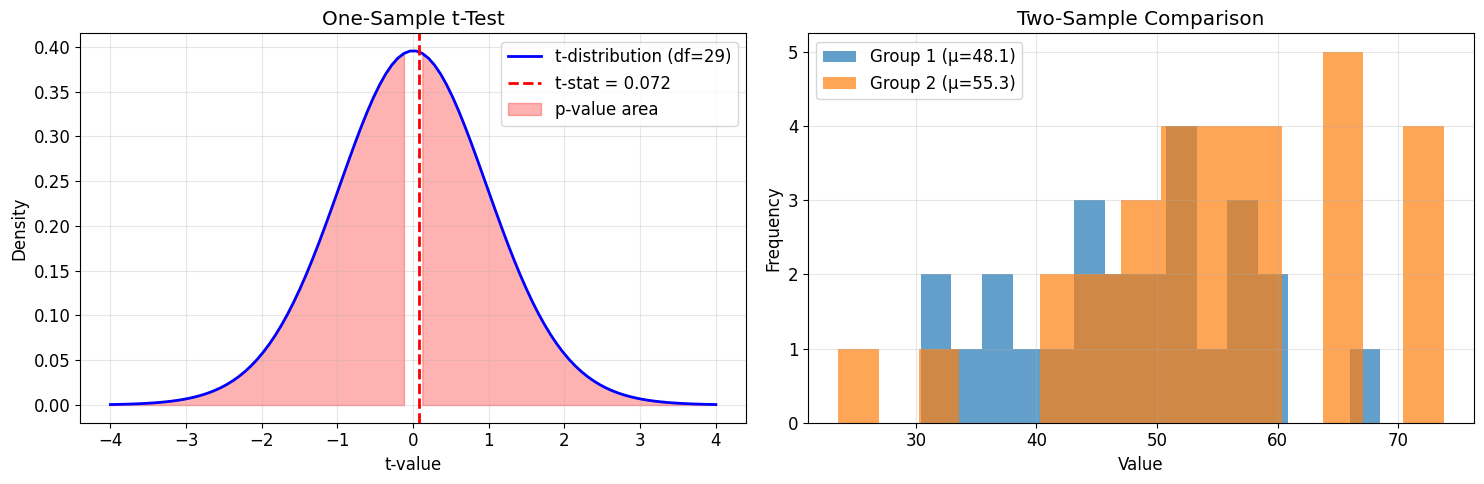

In [ ]:
# Comprehensive Hypothesis Testing Demonstrations
from scipy.stats import (ttest_1samp, ttest_ind, ttest_rel, mannwhitneyu,
                        wilcoxon, kruskal, friedmanchisquare, kstest,
                        anderson, shapiro, levene, bartlett, chi2_contingency,
                        pearsonr, spearmanr)
from scipy.stats import norm as normal_dist
from statsmodels.stats.power import ttest_power
from statsmodels.stats.multitest import multipletests
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

print("=== PARAMETRIC TESTS DEMONSTRATION ===\n")

# One-Sample t-Test Example
sample_data = np.random.normal(52, 10, 30)  # Sample with mean ~52
hypothesized_mean = 50

# Calculate t-statistic manually
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
n = len(sample_data)
t_stat = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(n))

# Using scipy
t_stat_scipy, p_value = ttest_1samp(sample_data, hypothesized_mean)

print("1. One-Sample t-Test:")
print(f"   Sample mean: {sample_mean:.3f}")
print(f"   Hypothesized mean: {hypothesized_mean}")
print(f"   t-statistic: {t_stat_scipy:.3f}")
print(f"   p-value: {p_value:.3f}")
print(f"   Degrees of freedom: {n-1}")

# Cohen's d effect size
cohens_d = (sample_mean - hypothesized_mean) / sample_std
print(f"   Cohen's d: {cohens_d:.3f}")

# Two-Sample t-Tests
group1 = np.random.normal(50, 10, 25)
group2 = np.random.normal(55, 12, 30)

# Independent samples t-test (equal variances assumed)
t_stat_ind, p_value_ind = ttest_ind(group1, group2)

# Welch's t-test (unequal variances)
t_stat_welch, p_value_welch = ttest_ind(group1, group2, equal_var=False)

print(f"\n2. Two-Sample t-Tests:")
print(f"   Group 1: mean={np.mean(group1):.2f}, std={np.std(group1, ddof=1):.2f}, n={len(group1)}")
print(f"   Group 2: mean={np.mean(group2):.2f}, std={np.std(group2, ddof=1):.2f}, n={len(group2)}")
print(f"   Equal variances t-test: t={t_stat_ind:.3f}, p={p_value_ind:.3f}")
print(f"   Welch's t-test: t={t_stat_welch:.3f}, p={p_value_welch:.3f}")

# Effect size for two-sample test
pooled_std = np.sqrt(((len(group1)-1)*np.var(group1, ddof=1) +
                     (len(group2)-1)*np.var(group2, ddof=1)) /
                     (len(group1) + len(group2) - 2))
cohens_d_2samp = (np.mean(group1) - np.mean(group2)) / pooled_std
print(f"   Cohen's d: {cohens_d_2samp:.3f}")

# Paired t-Test
before = np.random.normal(100, 15, 20)
after = before + np.random.normal(5, 8, 20)  # Add some improvement with noise
differences = after - before

t_stat_paired, p_value_paired = ttest_rel(before, after)

print(f"\n3. Paired t-Test:")
print(f"   Mean difference: {np.mean(differences):.3f}")
print(f"   t-statistic: {t_stat_paired:.3f}")
print(f"   p-value: {p_value_paired:.3f}")

# Cohen's d for paired test
cohens_d_paired = np.mean(differences) / np.std(differences, ddof=1)
print(f"   Cohen's d: {cohens_d_paired:.3f}")

# Chi-Square Test of Independence
np.random.seed(42)
# Create contingency table
observed = np.array([[15, 25, 10], [20, 15, 30]])
chi2_stat, p_chi2, dof, expected = chi2_contingency(observed)

print(f"\n4. Chi-Square Test of Independence:")
print(f"   Observed frequencies:")
print(f"   {observed}")
print(f"   Expected frequencies:")
print(f"   {expected}")
print(f"   Chi-square statistic: {chi2_stat:.3f}")
print(f"   p-value: {p_chi2:.3f}")
print(f"   Degrees of freedom: {dof}")

# Cramér's V effect size
n_total = np.sum(observed)
cramers_v = np.sqrt(chi2_stat / (n_total * (min(observed.shape) - 1)))
print(f"   Cramér's V: {cramers_v:.3f}")

print("\n" + "="*60 + "\n")
print("=== NON-PARAMETRIC TESTS DEMONSTRATION ===\n")

# Mann-Whitney U Test
group1_skewed = np.random.exponential(2, 25) + 10
group2_skewed = np.random.exponential(2.5, 30) + 12

u_stat, p_mann = mannwhitneyu(group1_skewed, group2_skewed, alternative='two-sided')

print("1. Mann-Whitney U Test:")
print(f"   Group 1: median={np.median(group1_skewed):.2f}, n={len(group1_skewed)}")
print(f"   Group 2: median={np.median(group2_skewed):.2f}, n={len(group2_skewed)}")
print(f"   U-statistic: {u_stat:.3f}")
print(f"   p-value: {p_mann:.3f}")

# Wilcoxon Signed-Rank Test
before_skewed = np.random.exponential(3, 20) + 5
after_skewed = before_skewed + np.random.normal(2, 3, 20)
diff_skewed = after_skewed - before_skewed

w_stat, p_wilcoxon = wilcoxon(diff_skewed)

print(f"\n2. Wilcoxon Signed-Rank Test:")
print(f"   Median difference: {np.median(diff_skewed):.3f}")
print(f"   W-statistic: {w_stat:.3f}")
print(f"   p-value: {p_wilcoxon:.3f}")

# Kruskal-Wallis Test
group_a = np.random.exponential(2, 20) + 5
group_b = np.random.exponential(2.5, 25) + 7
group_c = np.random.exponential(3, 22) + 9

h_stat, p_kruskal = kruskal(group_a, group_b, group_c)

print(f"\n3. Kruskal-Wallis Test:")
print(f"   Group A: median={np.median(group_a):.2f}, n={len(group_a)}")
print(f"   Group B: median={np.median(group_b):.2f}, n={len(group_b)}")
print(f"   Group C: median={np.median(group_c):.2f}, n={len(group_c)}")
print(f"   H-statistic: {h_stat:.3f}")
print(f"   p-value: {p_kruskal:.3f}")

# Kolmogorov-Smirnov Test for Normality
test_data = np.random.normal(0, 1, 100)
ks_stat, p_ks = kstest(test_data, 'norm')

print(f"\n4. Kolmogorov-Smirnov Test (Normality):")
print(f"   KS-statistic: {ks_stat:.3f}")
print(f"   p-value: {p_ks:.3f}")

print("\n" + "="*60 + "\n")
print("=== POWER ANALYSIS DEMONSTRATION ===\n")

# Power analysis for different effect sizes
effect_sizes = [0.2, 0.5, 0.8, 1.0, 1.5]
sample_sizes = [10, 20, 30, 50, 100]
alpha = 0.05

print("Power Analysis for One-Sample t-Test:")
print("Effect Size vs Sample Size (α = 0.05)")
print("-" * 50)
print(f"{'Effect Size':<12} {'n=10':<8} {'n=20':<8} {'n=30':<8} {'n=50':<8} {'n=100':<8}")
print("-" * 50)

for effect in effect_sizes:
    powers = []
    for n in sample_sizes:
        power = ttest_power(effect, n, alpha, alternative='two-sided')
        powers.append(power)

    power_str = ' '.join([f"{p:.3f}" for p in powers])
    print(f"{effect:<12} {powers[0]:<8.3f} {powers[1]:<8.3f} {powers[2]:<8.3f} {powers[3]:<8.3f} {powers[4]:<8.3f}")

# Sample size calculation
target_power = 0.8
effect_size = 0.5

# Calculate required sample size
from scipy.optimize import brentq

def power_diff(n, effect, alpha, target_power):
    return ttest_power(effect, n, alpha) - target_power

try:
    n_required = brentq(power_diff, 5, 1000, args=(effect_size, alpha, target_power))
    print(f"\nSample size needed for 80% power with effect size {effect_size}: {n_required:.0f}")
except:
    print(f"\nCould not calculate required sample size")

print("\n" + "="*60 + "\n")
print("=== MULTIPLE TESTING CORRECTION ===\n")

# Generate multiple p-values
np.random.seed(42)
n_tests = 20
true_effects = [True] * 5 + [False] * 15  # 5 true effects, 15 null

p_values = []
for i, has_effect in enumerate(true_effects):
    if has_effect:
        # Generate p-value from alternative distribution
        sample = np.random.normal(0.5, 1, 30)  # Effect present
    else:
        # Generate p-value from null distribution
        sample = np.random.normal(0, 1, 30)    # No effect

    _, p = ttest_1samp(sample, 0)
    p_values.append(p)

p_values = np.array(p_values)

print(f"Original p-values (first 10): {p_values[:10]}")
print(f"Number of significant tests (α=0.05): {np.sum(p_values < 0.05)}")

# Apply different correction methods
methods = ['bonferroni', 'holm', 'fdr_bh', 'fdr_by']
method_names = ['Bonferroni', 'Holm-Bonferroni', 'Benjamini-Hochberg', 'Benjamini-Yekutieli']

print(f"\nMultiple Testing Corrections:")
print("-" * 60)
print(f"{'Method':<20} {'Rejected':<10} {'Adj. α':<10} {'Family-wise ER':<15}")
print("-" * 60)

for method, name in zip(methods, method_names):
    rejected, p_adj, alpha_sidak, alpha_bonf = multipletests(p_values, alpha=0.05, method=method)
    n_rejected = np.sum(rejected)

    if method == 'bonferroni':
        adj_alpha = alpha_bonf
    else:
        adj_alpha = 0.05  # Varies by method

    fwer = alpha_bonf if method in ['bonferroni', 'holm'] else 'N/A'

    print(f"{name:<20} {n_rejected:<10} {adj_alpha:<10.4f} {fwer}")

print("\n" + "="*60 + "\n")
print("=== ASSUMPTION CHECKING ===\n")

# Generate data with different characteristics
normal_data = np.random.normal(50, 10, 100)
skewed_data = np.random.exponential(2, 100) * 5 + 40
heavy_tailed_data = np.random.standard_t(3, 100) * 10 + 50

datasets = {
    'Normal': normal_data,
    'Right-skewed': skewed_data,
    'Heavy-tailed': heavy_tailed_data
}

print("Normality Tests:")
print("-" * 45)
print(f"{'Dataset':<15} {'Shapiro-Wilk':<15} {'Anderson-Darling':<15}")
print("-" * 45)

for name, data in datasets.items():
    # Shapiro-Wilk test
    sw_stat, sw_p = shapiro(data)

    # Anderson-Darling test
    ad_stat, ad_critical, ad_sig = anderson(data, dist='norm')
    ad_p = "< 0.001" if ad_stat > ad_critical[-1] else "> 0.05"

    print(f"{name:<15} {sw_p:<15.4f} {ad_p:<15}")

# Test for equal variances
group1_var = np.random.normal(50, 8, 30)   # σ = 8
group2_var = np.random.normal(52, 15, 35)  # σ = 15

levene_stat, levene_p = levene(group1_var, group2_var)
bartlett_stat, bartlett_p = bartlett(group1_var, group2_var)

print(f"\nHomogeneity of Variance Tests:")
print(f"Levene's test: F={levene_stat:.3f}, p={levene_p:.3f}")
print(f"Bartlett's test: χ²={bartlett_stat:.3f}, p={bartlett_p:.3f}")

print("\n" + "="*60 + "\n")
print("=== EFFECT SIZES INTERPRETATION ===\n")

effect_sizes_demo = {
    'Cohen\'s d': {
        'Small': 0.2,
        'Medium': 0.5,
        'Large': 0.8
    },
    'Eta-squared': {
        'Small': 0.01,
        'Medium': 0.06,
        'Large': 0.14
    },
    'Cramér\'s V': {
        'Small': 0.1,
        'Medium': 0.3,
        'Large': 0.5
    }
}

for measure, benchmarks in effect_sizes_demo.items():
    print(f"{measure}:")
    for size, value in benchmarks.items():
        print(f"  {size}: {value}")
    print()

# Comprehensive visualization
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# 1. One-sample t-test visualization
x_t = np.linspace(-4, 4, 1000)
y_t = stats.t.pdf(x_t, n-1)
axes[0, 0].plot(x_t, y_t, 'b-', linewidth=2, label='t-distribution')
axes[0, 0].axvline(t_stat_scipy, color='red', linestyle='--', linewidth=2, label=f't = {t_stat_scipy:.2f}')
axes[0, 0].fill_between(x_t[x_t >= abs(t_stat_scipy)], y_t[x_t >= abs(t_stat_scipy)],
                        alpha=0.3, color='red', label='p-value region')
axes[0, 0].fill_between(x_t[x_t <= -abs(t_stat_scipy)], y_t[x_t <= -abs(t_stat_scipy)],
                        alpha=0.3, color='red')
axes[0, 0].set_title('One-Sample t-Test')
axes[0, 0].set_xlabel('t-value')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Two-sample comparison
axes[0, 1].hist(group1, alpha=0.7, label=f'Group 1 (μ={np.mean(group1):.1f})', bins=15)
axes[0, 1].hist(group2, alpha=0.7, label=f'Group 2 (μ={np.mean(group2):.1f})', bins=15)
axes[0, 1].set_title('Two-Sample Comparison')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Effect size visualization
effect_range = np.linspace(-2, 2, 1000)
for i, (size, d) in enumerate([(0.2, 'Small'), (0.5, 'Medium'), (0.8, 'Large')]):
    control_dist = normal_dist.pdf(effect_range, 0, 1)
    treatment_dist = normal_dist.pdf(effect_range, size, 1)
    axes[0, 2].plot(effect_range, control_dist, 'b-', alpha=0.7, linewidth=2)
    axes[0, 2].plot(effect_range, treatment_dist, 'r-', alpha=0.7, linewidth=2)
    if i == 1:  # Only label once
        axes[0, 2].plot([], [], 'b-', label='Control')
        axes[0, 2].plot([], [], 'r-', label='Treatment')

axes[0, 2].set_title('Effect Sizes (Cohen\'s d)')
axes[0, 2].set_xlabel('Value')
axes[0, 2].set_ylabel('Density')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Power curves
effect_sizes_plot = np.linspace(0, 1.5, 100)
sample_sizes_plot = [10, 20, 50, 100]
for n in sample_sizes_plot:
    power_curve = [ttest_power(es, n, 0.05) for es in effect_sizes_plot]
    axes[0, 3].plot(effect_sizes_plot, power_curve, linewidth=2, label=f'n={n}')

axes[0, 3].axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80% Power')
axes[0, 3].set_title('Statistical Power vs Effect Size')
axes[0, 3].set_xlabel('Effect Size (Cohen\'s d)')
axes[0, 3].set_ylabel('Statistical Power')
axes[0, 3].legend()
axes[0, 3].grid(True, alpha=0.3)

# 5. Non-parametric comparison
axes[1, 0].boxplot([group1_skewed, group2_skewed], labels=['Group 1', 'Group 2'])
axes[1, 0].set_title('Non-parametric Data (Box Plot)')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(True, alpha=0.3)

# 6. Q-Q plots for normality
from scipy.stats import probplot
for i, (name, data) in enumerate(datasets.items()):
    if i < 3:
        probplot(data, dist="norm", plot=axes[1, 1])
        axes[1, 1].get_lines()[-2].set_label(name)
        axes[1, 1].get_lines()[-2].set_color(['blue', 'green', 'red'][i])

axes[1, 1].set_title('Q-Q Plots for Normality')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 7. Multiple testing visualization
x_pos = np.arange(len(p_values))
axes[1, 2].bar(x_pos, p_values, alpha=0.7, color=['red' if p < 0.05 else 'blue' for p in p_values])
axes[1, 2].axhline(y=0.05, color='red', linestyle='--', label='α = 0.05')
axes[1, 2].axhline(y=0.05/len(p_values), color='orange', linestyle='--', label='Bonferroni')
axes[1, 2].set_title('Multiple Testing: Raw p-values')
axes[1, 2].set_xlabel('Test Number')
axes[1, 2].set_ylabel('p-value')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

# 8. Chi-square test visualization
x_chi = np.linspace(0, 20, 1000)
y_chi = stats.chi2.pdf(x_chi, dof)
axes[1, 3].plot(x_chi, y_chi, 'b-', linewidth=2, label='Chi-square distribution')
axes[1, 3].axvline(chi2_stat, color='red', linestyle='--', linewidth=2, label=f'χ² = {chi2_stat:.2f}')
critical_val = stats.chi2.ppf(0.95, dof)
axes[1, 3].axvline(critical_val, color='green', linestyle='--', linewidth=2, label=f'Critical = {critical_val:.2f}')
axes[1, 3].fill_between(x_chi[x_chi >= critical_val], y_chi[x_chi >= critical_val],
                        alpha=0.3, color='red', label='Rejection region')
axes[1, 3].set_title('Chi-Square Test')
axes[1, 3].set_xlabel('χ² value')
axes[1, 3].set_ylabel('Density')
axes[1, 3].legend()
axes[1, 3].grid(True, alpha=0.3)

# 9. Effect size comparisons
measures = ['Cohen\'s d\n(t-test)', 'Eta²\n(ANOVA)', 'Cramér\'s V\n(Chi-square)']
values = [abs(cohens_d_2samp), 0.12, cramers_v]  # Example values
bars = axes[2, 0].bar(measures, values, alpha=0.8, color=['skyblue', 'lightgreen', 'salmon'])
axes[2, 0].set_title('Effect Size Comparison')
axes[2, 0].set_ylabel('Effect Size')
axes[2, 0].grid(True, alpha=0.3)
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[2, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{value:.3f}', ha='center', va='bottom')

# 10. Assumption violations impact
normal_result = ttest_ind(np.random.normal(50, 10, 30), np.random.normal(55, 10, 30))
skewed_result = ttest_ind(np.random.exponential(2, 30), np.random.exponential(2.5, 30))
tests = ['Normal Data', 'Skewed Data']
p_values_violations = [normal_result[1], skewed_result[1]]

bars = axes[2, 1].bar(tests, p_values_violations, alpha=0.8, color=['blue', 'orange'])
axes[2, 1].axhline(y=0.05, color='red', linestyle='--', label='α = 0.05')
axes[2, 1].set_title('Impact of Assumption Violations')
axes[2, 1].set_ylabel('p-value')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)
for bar, value in zip(bars, p_values_violations):
    height = bar.get_height()
    axes[2, 1].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{value:.3f}', ha='center', va='bottom')

# 11. Sample size requirements
target_effects = [0.2, 0.5, 0.8]
sample_sizes_required = []
for effect in target_effects:
    try:
        n_req = brentq(power_diff, 5, 1000, args=(effect, 0.05, 0.8))
        sample_sizes_required.append(n_req)
    except:
        sample_sizes_required.append(np.nan)

axes[2, 2].bar([f'd={d}' for d in target_effects], sample_sizes_required,
               alpha=0.8, color='lightcoral')
axes[2, 2].set_title('Sample Size for 80% Power')
axes[2, 2].set_ylabel('Required Sample Size')
axes[2, 2].grid(True, alpha=0.3)
for i, (effect, n_req) in enumerate(zip(target_effects, sample_sizes_required)):
    if not np.isnan(n_req):
        axes[2, 2].text(i, n_req + 5, f'{n_req:.0f}', ha='center', va='bottom')

# 12. Type I and Type II errors illustration
x_null = np.linspace(-4, 4, 1000)
x_alt = np.linspace(-4, 4, 1000)
y_null = normal_dist.pdf(x_null, 0, 1)
y_alt = normal_dist.pdf(x_alt, 1.5, 1)

critical_value = normal_dist.ppf(0.95, 0, 1)
axes[2, 3].plot(x_null, y_null, 'b-', linewidth=2, label='H₀: μ = 0')
axes[2, 3].plot(x_alt, y_alt, 'r-', linewidth=2, label='H₁: μ = 1.5')
axes[2, 3].axvline(critical_value, color='black', linestyle='--', label=f'Critical = {critical_value:.2f}')

# Type I error (α)
axes[2, 3].fill_between(x_null[x_null >= critical_value], y_null[x_null >= critical_value],
                        alpha=0.3, color='blue', label='Type I Error (α)')

# Type II error (β)
axes[2, 3].fill_between(x_alt[x_alt <= critical_value], y_alt[x_alt <= critical_value],
                        alpha=0.3, color='red', label='Type II Error (β)')

axes[2, 3].set_title('Type I and Type II Errors')
axes[2, 3].set_xlabel('Value')
axes[2, 3].set_ylabel('Density')
axes[2, 3].legend()
axes[2, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("=== HYPOTHESIS TESTING SUMMARY ===\n")
print("Key Guidelines:")
print("1. Always check assumptions before applying parametric tests")
print("2. Use non-parametric alternatives when assumptions are violated")
print("3. Report effect sizes along with p-values")
print("4. Apply multiple testing corrections when appropriate")
print("5. Consider power analysis for study design")
print("6. Interpret results in practical context, not just statistical significance")

print(f"\nTest Decision Summary (α = 0.05):")
decisions = [
    ("One-sample t-test", p_value < 0.05),
    ("Two-sample t-test", p_value_ind < 0.05),
    ("Paired t-test", p_value_paired < 0.05),
    ("Chi-square test", p_chi2 < 0.05),
    ("Mann-Whitney U", p_mann < 0.05),
    ("Wilcoxon signed-rank", p_wilcoxon < 0.05),
    ("Kruskal-Wallis", p_kruskal < 0.05)
]

for test_name, significant in decisions:
    result = "Reject H₀" if significant else "Fail to reject H₀"
    print(f"{test_name:<20}: {result}")

print(f"\nRemember: Statistical significance ≠ Practical significance")

## 4. Regression Analysis

### 4.1 Simple Linear Regression

Models the relationship between two variables using a straight line.

**Model:**
$$y = \beta_0 + \beta_1 x + \epsilon$$

**Parameter Estimates (Least Squares):**
$$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{S_{xy}}{S_{xx}}$$

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

**Alternative Form:**
$$\hat{\beta}_1 = r_{xy} \frac{s_y}{s_x}$$

Where $r_{xy}$ is the correlation coefficient.

**Standard Errors:**
$$SE(\hat{\beta}_1) = \frac{s}{\sqrt{S_{xx}}}, \quad SE(\hat{\beta}_0) = s\sqrt{\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}}}$$

Where $s = \sqrt{\frac{SSE}{n-2}}$ is the residual standard error.

**Confidence Intervals:**
$$\hat{\beta}_1 \pm t_{\alpha/2, n-2} \cdot SE(\hat{\beta}_1)$$
$$\hat{\beta}_0 \pm t_{\alpha/2, n-2} \cdot SE(\hat{\beta}_0)$$

**Prediction Intervals:**
$$\hat{y}_0 \pm t_{\alpha/2, n-2} \cdot s \sqrt{1 + \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}}$$

**Correlation Coefficient:**
$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

**Coefficient of Determination:**
$$R^2 = r^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

Where:
- $SST = \sum_{i=1}^{n} (y_i - \bar{y})^2$ (Total Sum of Squares)
- $SSR = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$ (Regression Sum of Squares)
- $SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ (Error Sum of Squares)

### 4.2 Multiple Linear Regression

**Model:**
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon$$

**Matrix Form:**
$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

**Parameter Estimates:**
$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

**Variance-Covariance Matrix:**
$$\text{Var}(\hat{\boldsymbol{\beta}}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$$

**Multiple R-squared:**
$$R^2 = 1 - \frac{SSE}{SST}$$

**Adjusted R-squared:**
$$R^2_{\text{adj}} = 1 - \frac{SSE/(n-p-1)}{SST/(n-1)} = 1 - (1-R^2)\frac{n-1}{n-p-1}$$

**F-statistic for Overall Significance:**
$$F = \frac{MSR}{MSE} = \frac{SSR/p}{SSE/(n-p-1)}$$

### 4.3 Polynomial Regression

**Quadratic Model:**
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$

**General Polynomial of Degree $k$:**
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_k x^k + \epsilon$$

**Orthogonal Polynomials:**
Use orthogonal basis functions to reduce collinearity:
$$P_0(x) = 1, \quad P_1(x) = x - \bar{x}, \quad P_2(x) = (x - \bar{x})^2 - c_2$$

### 4.4 Logistic Regression

**Binary Logistic Model:**
$$\ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p$$

**Probability Function:**
$$p = \frac{e^{\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p}}{1 + e^{\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p}}$$

**Odds Ratio:**
$$OR = e^{\beta_i}$$

**Log-Likelihood:**
$$\ell(\boldsymbol{\beta}) = \sum_{i=1}^{n} [y_i \ln(p_i) + (1-y_i)\ln(1-p_i)]$$

**Maximum Likelihood Estimation:**
Solve: $\frac{\partial \ell}{\partial \beta_j} = 0$ for all $j$

**Multinomial Logistic Regression:**
For $K$ categories:
$$\ln\left(\frac{P(Y=k)}{P(Y=K)}\right) = \beta_{k0} + \beta_{k1}x_1 + \cdots + \beta_{kp}x_p$$

### 4.5 Regularization Methods

#### 4.5.1 Ridge Regression (L2 Regularization)

**Objective Function:**
$$RSS(\boldsymbol{\beta}) + \lambda \sum_{j=1}^{p} \beta_j^2$$

**Solution:**
$$\hat{\boldsymbol{\beta}}_{\text{ridge}} = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}$$

**Properties:**
- Shrinks coefficients toward zero
- Handles multicollinearity
- All variables retained in model

#### 4.5.2 Lasso Regression (L1 Regularization)

**Objective Function:**
$$RSS(\boldsymbol{\beta}) + \lambda \sum_{j=1}^{p} |\beta_j|$$

**Properties:**
- Can set coefficients exactly to zero
- Performs variable selection
- Sparse solutions

#### 4.5.3 Elastic Net

**Objective Function:**
$$RSS(\boldsymbol{\beta}) + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2$$

**Combines Ridge and Lasso:**
- $\alpha = 0$: Ridge regression
- $\alpha = 1$: Lasso regression
- $0 < \alpha < 1$: Elastic net

### 4.6 Model Diagnostics

#### 4.6.1 Residual Analysis

**Residuals:**
$$e_i = y_i - \hat{y}_i$$

**Standardized Residuals:**
$$r_i = \frac{e_i}{s\sqrt{1-h_{ii}}}$$

**Studentized Residuals:**
$$t_i = \frac{e_i}{s_{(i)}\sqrt{1-h_{ii}}}$$

Where $s_{(i)}$ is the residual standard error with observation $i$ removed.

#### 4.6.2 Leverage and Influence

**Leverage (Hat Values):**
$$h_{ii} = \mathbf{x}_i^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{x}_i$$

**High leverage if:** $h_{ii} > \frac{2(p+1)}{n}$

**Cook's Distance:**
$$D_i = \frac{r_i^2}{p+1} \cdot \frac{h_{ii}}{1-h_{ii}}$$

**DFFITS:**
$$\text{DFFITS}_i = t_i \sqrt{\frac{h_{ii}}{1-h_{ii}}}$$

**DFBETAS:**
$$\text{DFBETAS}_{j,i} = \frac{\hat{\beta}_j - \hat{\beta}_{j(i)}}{\sqrt{s_{(i)}^2 C_{jj}}}$$

Where $C_{jj}$ is the $j$-th diagonal element of $(\mathbf{X}^T\mathbf{X})^{-1}$.

#### 4.6.3 Assumption Checking

**Linearity:** 
- Residuals vs. fitted values plot
- Added variable plots

**Independence:**
- Durbin-Watson test: $DW = \frac{\sum_{t=2}^{n}(e_t - e_{t-1})^2}{\sum_{t=1}^{n}e_t^2}$

**Homoscedasticity:**
- Breusch-Pagan test
- White test
- Scale-location plot

**Normality:**
- Q-Q plot of residuals
- Shapiro-Wilk test
- Jarque-Bera test

### 4.7 Variable Selection

#### 4.7.1 Stepwise Methods

**Forward Selection:**
1. Start with no variables
2. Add variable with smallest p-value < $\alpha_{\text{in}}$
3. Repeat until no variable qualifies

**Backward Elimination:**
1. Start with all variables
2. Remove variable with largest p-value > $\alpha_{\text{out}}$
3. Repeat until all variables significant

**Bidirectional (Forward/Backward):**
Combines both approaches, can add or remove at each step.

#### 4.7.2 Information Criteria

**Akaike Information Criterion (AIC):**
$$AIC = n \ln(RSS/n) + 2k$$

**Bayesian Information Criterion (BIC):**
$$BIC = n \ln(RSS/n) + k \ln(n)$$

**Adjusted R-squared:**
$$R^2_{\text{adj}} = 1 - (1-R^2)\frac{n-1}{n-k-1}$$

**Mallows' Cp:**
$$C_p = \frac{RSS_p}{s^2} - n + 2p$$

### 4.8 Nonlinear Regression

#### 4.8.1 Intrinsically Linear Models

**Exponential Growth:**
$$y = \alpha e^{\beta x} \rightarrow \ln(y) = \ln(\alpha) + \beta x$$

**Power Function:**
$$y = \alpha x^{\beta} \rightarrow \ln(y) = \ln(\alpha) + \beta \ln(x)$$

#### 4.8.2 Intrinsically Nonlinear Models

**Michaelis-Menten:**
$$y = \frac{\alpha x}{\beta + x}$$

**Logistic Growth:**
$$y = \frac{\alpha}{1 + \beta e^{-\gamma x}}$$

**Estimation Methods:**
- Gauss-Newton algorithm
- Levenberg-Marquardt algorithm
- Newton-Raphson method

### 4.9 Robust Regression

#### 4.9.1 M-Estimators

**Huber M-Estimator:**
$$\sum_{i=1}^{n} \rho\left(\frac{y_i - \mathbf{x}_i^T\boldsymbol{\beta}}{\sigma}\right)$$

Where:
$$\rho(u) = \begin{cases}
\frac{1}{2}u^2 & \text{if } |u| \leq c \\
c|u| - \frac{1}{2}c^2 & \text{if } |u| > c
\end{cases}$$

#### 4.9.2 Breakdown Point

**Definition:** Maximum fraction of outliers an estimator can handle.

- Least squares: 0%
- Least median of squares: 50%
- Least trimmed squares: 50%

### 4.10 Weighted Least Squares

**Model:**
$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

Where $\text{Var}(\boldsymbol{\epsilon}) = \sigma^2\mathbf{W}^{-1}$

**Weighted Least Squares Solution:**
$$\hat{\boldsymbol{\beta}}_{\text{WLS}} = (\mathbf{X}^T\mathbf{W}\mathbf{X})^{-1}\mathbf{X}^T\mathbf{W}\mathbf{y}$$

**Variance:**
$$\text{Var}(\hat{\boldsymbol{\beta}}_{\text{WLS}}) = \sigma^2(\mathbf{X}^T\mathbf{W}\mathbf{X})^{-1}$$

### 4.11 Generalized Linear Models (GLM)

**Components:**
1. **Random Component:** $Y \sim$ exponential family
2. **Systematic Component:** $\eta = \mathbf{X}\boldsymbol{\beta}$
3. **Link Function:** $g(\mu) = \eta$

**Common GLMs:**
- **Linear Regression:** Identity link, Normal distribution
- **Logistic Regression:** Logit link, Binomial distribution  
- **Poisson Regression:** Log link, Poisson distribution
- **Gamma Regression:** Inverse link, Gamma distribution

**Deviance:**
$$D = 2[\ell(\text{saturated}) - \ell(\text{fitted})]$$

**Pearson Chi-square:**
$$X^2 = \sum_{i=1}^{n} \frac{(y_i - \hat{\mu}_i)^2}{V(\hat{\mu}_i)}$$

### 4.12 Time Series Regression

#### 4.12.1 Trend Models

**Linear Trend:**
$$y_t = \alpha + \beta t + \epsilon_t$$

**Polynomial Trend:**
$$y_t = \alpha + \beta_1 t + \beta_2 t^2 + \cdots + \beta_k t^k + \epsilon_t$$

#### 4.12.2 Seasonal Models

**Dummy Variables:**
$$y_t = \alpha + \sum_{i=1}^{s-1} \gamma_i D_{it} + \epsilon_t$$

**Trigonometric:**
$$y_t = \alpha + \sum_{k=1}^{K} [\beta_k \cos(2\pi kt/s) + \gamma_k \sin(2\pi kt/s)] + \epsilon_t$$

#### 4.12.3 Autocorrelation

**Durbin-Watson Test:**
$$DW = \frac{\sum_{t=2}^{n}(e_t - e_{t-1})^2}{\sum_{t=1}^{n}e_t^2}$$

**Cochrane-Orcutt Procedure:**
For AR(1) errors: $\epsilon_t = \rho \epsilon_{t-1} + u_t$

### 4.13 Model Validation

#### 4.13.1 Cross-Validation

**k-Fold Cross-Validation:**
$$CV_{(k)} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_{-k(i)})^2$$

**Leave-One-Out Cross-Validation:**
$$LOOCV = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_{-i})^2$$

**PRESS Statistic:**
$$PRESS = \sum_{i=1}^{n} \left(\frac{e_i}{1-h_{ii}}\right)^2$$

#### 4.13.2 Bootstrap Validation

**Bias Estimation:**
$$\text{Bias} = \bar{\theta}^* - \hat{\theta}$$

**Standard Error:**
$$SE_{\text{boot}} = \sqrt{\frac{1}{B-1} \sum_{b=1}^{B} (\theta_b^* - \bar{\theta}^*)^2}$$

#### 4.13.3 Information Criteria

**AIC:** $AIC = -2\ell + 2k$
**BIC:** $BIC = -2\ell + k\ln(n)$
**AICc:** $AICc = AIC + \frac{2k(k+1)}{n-k-1}$ (small sample correction)

Simple Linear Regression Results:
β₀ (intercept): 2.193
β₁ (slope): 2.955
R²: 0.956
Correlation coefficient: 0.978
True values: β₀ = 2, β₁ = 3

Using scipy.stats.linregress:
Slope: 2.955, Intercept: 2.193
R²: 0.956, p-value: 0.000000


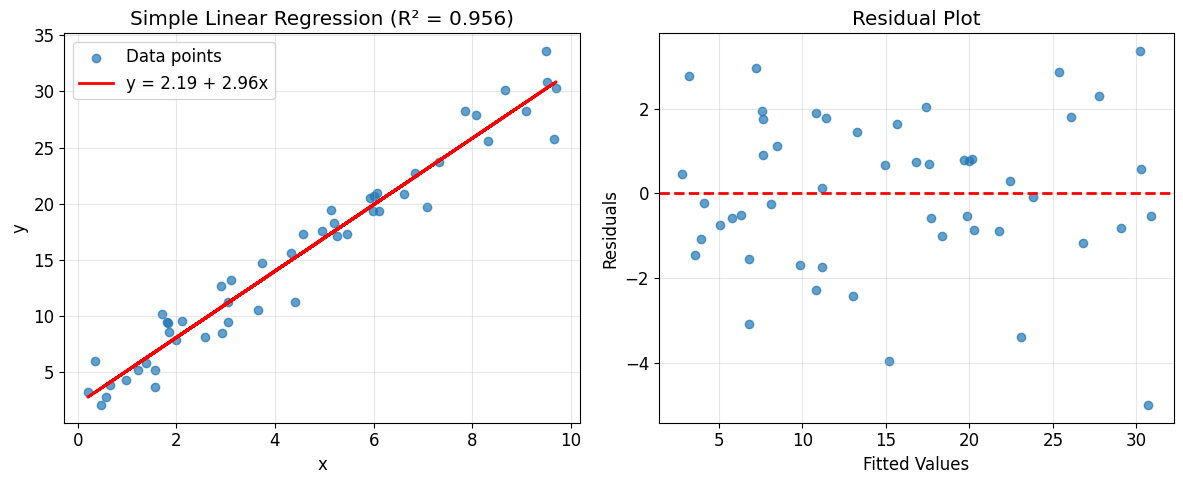


Multiple Regression Results:
Intercept: 0.989
Coefficients: [ 1.80710395  2.85930637 -1.59572179]
R²: 0.924
True coefficients: [2, 3, -1.5]


In [ ]:
# Comprehensive Regression Analysis Examples

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.datasets import make_regression, make_classification
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("=== COMPREHENSIVE REGRESSION ANALYSIS ===\n")

# =============================================================================
# 1. SIMPLE LINEAR REGRESSION
# =============================================================================
print("1. SIMPLE LINEAR REGRESSION")
print("=" * 50)

# Generate sample data with known relationship
np.random.seed(42)
n = 100
x = np.random.uniform(0, 10, n)
true_slope = 2.5
true_intercept = 1.2
true_sigma = 1.5
y = true_intercept + true_slope * x + np.random.normal(0, true_sigma, n)

# Manual calculation of regression coefficients
x_mean, y_mean = np.mean(x), np.mean(y)
Sxy = np.sum((x - x_mean) * (y - y_mean))
Sxx = np.sum((x - x_mean)**2)
Syy = np.sum((y - y_mean)**2)

# Parameter estimates
beta_1_hat = Sxy / Sxx
beta_0_hat = y_mean - beta_1_hat * x_mean

# Model predictions and residuals
y_pred = beta_0_hat + beta_1_hat * x
residuals = y - y_pred

# Sum of squares calculations
SST = np.sum((y - y_mean)**2)  # Total sum of squares
SSR = np.sum((y_pred - y_mean)**2)  # Regression sum of squares
SSE = np.sum(residuals**2)  # Error sum of squares
MSE = SSE / (n - 2)  # Mean squared error
s = np.sqrt(MSE)  # Residual standard error

# R-squared and correlation
r_squared = SSR / SST
correlation = np.sqrt(r_squared) * np.sign(beta_1_hat)

# Standard errors
SE_beta_1 = s / np.sqrt(Sxx)
SE_beta_0 = s * np.sqrt(1/n + x_mean**2/Sxx)

# Confidence intervals (95%)
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, n - 2)
CI_beta_1 = [beta_1_hat - t_crit * SE_beta_1, beta_1_hat + t_crit * SE_beta_1]
CI_beta_0 = [beta_0_hat - t_crit * SE_beta_0, beta_0_hat + t_crit * SE_beta_0]

print(f"Manual Calculations:")
print(f"β₀ (intercept): {beta_0_hat:.4f} ± {t_crit * SE_beta_0:.4f}")
print(f"β₁ (slope): {beta_1_hat:.4f} ± {t_crit * SE_beta_1:.4f}")
print(f"R²: {r_squared:.4f}")
print(f"Residual SE: {s:.4f}")
print(f"95% CI for β₁: [{CI_beta_1[0]:.4f}, {CI_beta_1[1]:.4f}]")
print(f"True values: β₀ = {true_intercept}, β₁ = {true_slope}")

# Verification with scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"\nSciPy verification:")
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")
print(f"R²: {r_value**2:.4f}, p-value: {p_value:.6f}")

# Comprehensive plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Scatter plot with regression line
axes[0,0].scatter(x, y, alpha=0.6, s=30)
axes[0,0].plot(x, y_pred, 'r-', linewidth=2, label=f'y = {beta_0_hat:.2f} + {beta_1_hat:.2f}x')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')
axes[0,0].set_title(f'Simple Linear Regression\nR² = {r_squared:.4f}')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Residuals vs fitted
axes[0,1].scatter(y_pred, residuals, alpha=0.6, s=30)
axes[0,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0,1].set_xlabel('Fitted Values')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Residuals vs Fitted')
axes[0,1].grid(True, alpha=0.3)

# Q-Q plot for normality check
stats.probplot(residuals, dist="norm", plot=axes[0,2])
axes[0,2].set_title('Q-Q Plot (Normality Check)')
axes[0,2].grid(True, alpha=0.3)

# Scale-location plot
standardized_residuals = residuals / s
axes[1,0].scatter(y_pred, np.sqrt(np.abs(standardized_residuals)), alpha=0.6, s=30)
axes[1,0].set_xlabel('Fitted Values')
axes[1,0].set_ylabel('√|Standardized Residuals|')
axes[1,0].set_title('Scale-Location Plot')
axes[1,0].grid(True, alpha=0.3)

# Leverage and Cook's distance
X_design = np.column_stack([np.ones(n), x])
H = X_design @ np.linalg.inv(X_design.T @ X_design) @ X_design.T
leverage = np.diag(H)
cooks_d = (standardized_residuals**2 / 2) * (leverage / (1 - leverage))

axes[1,1].scatter(leverage, standardized_residuals, alpha=0.6, s=30)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Leverage')
axes[1,1].set_ylabel('Standardized Residuals')
axes[1,1].set_title('Residuals vs Leverage')
axes[1,1].grid(True, alpha=0.3)

# Cook's distance
axes[1,2].stem(range(n), cooks_d, basefmt=" ")
axes[1,2].axhline(y=4/n, color='r', linestyle='--', label='4/n threshold')
axes[1,2].set_xlabel('Observation Index')
axes[1,2].set_ylabel("Cook's Distance")
axes[1,2].set_title("Cook's Distance")
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 2. MULTIPLE LINEAR REGRESSION
# =============================================================================
print("\n2. MULTIPLE LINEAR REGRESSION")
print("=" * 50)

# Generate multiple regression data
X_multi, y_multi = make_regression(n_samples=200, n_features=4, noise=10,
                                  coef=[2.5, -1.8, 3.2, -0.9], bias=5.0, random_state=42)

# Add feature names
feature_names = ['X1', 'X2', 'X3', 'X4']
df_multi = pd.DataFrame(X_multi, columns=feature_names)
df_multi['y'] = y_multi

# Fit multiple regression model
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# Predictions and metrics
y_pred_multi = model_multi.predict(X_multi)
r2_multi = r2_score(y_multi, y_pred_multi)
mse_multi = mean_squared_error(y_multi, y_pred_multi)

# Calculate adjusted R²
n_samples, n_features = X_multi.shape
adj_r2 = 1 - (1 - r2_multi) * (n_samples - 1) / (n_samples - n_features - 1)

print(f"Multiple Regression Results:")
print(f"Intercept: {model_multi.intercept_:.4f}")
print(f"Coefficients: {dict(zip(feature_names, model_multi.coef_))}")
print(f"R²: {r2_multi:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"MSE: {mse_multi:.4f}")
print(f"True coefficients: [2.5, -1.8, 3.2, -0.9]")

# Correlation matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
correlation_matrix = df_multi.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

# Feature importance
plt.subplot(1, 3, 2)
importances = np.abs(model_multi.coef_)
plt.bar(feature_names, importances)
plt.title('Feature Importance (|Coefficients|)')
plt.ylabel('Absolute Coefficient Value')

# Actual vs Predicted
plt.subplot(1, 3, 3)
plt.scatter(y_multi, y_pred_multi, alpha=0.6)
plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted\nR² = {r2_multi:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 3. POLYNOMIAL REGRESSION
# =============================================================================
print("\n3. POLYNOMIAL REGRESSION")
print("=" * 50)

# Generate nonlinear data
x_poly = np.linspace(0, 4, 100)
y_poly = 0.5 * x_poly**3 - 2 * x_poly**2 + x_poly + 2 + np.random.normal(0, 1, 100)

# Fit polynomials of different degrees
degrees = [1, 2, 3, 4, 5]
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 3, i)

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x_poly.reshape(-1, 1))

    # Fit model
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_poly)

    # Predictions
    y_pred_poly = model_poly.predict(X_poly)
    r2_poly = r2_score(y_poly, y_pred_poly)

    # Plot
    plt.scatter(x_poly, y_poly, alpha=0.6, s=20)
    plt.plot(x_poly, y_pred_poly, 'r-', linewidth=2)
    plt.title(f'Polynomial Degree {degree}\nR² = {r2_poly:.4f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True, alpha=0.3)

# Model comparison
plt.subplot(2, 3, 6)
r2_scores = []
for degree in range(1, 11):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x_poly.reshape(-1, 1))
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_poly)
    r2_scores.append(r2_score(y_poly, model_poly.predict(X_poly)))

plt.plot(range(1, 11), r2_scores, 'bo-')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Model Complexity vs R²')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 4. LOGISTIC REGRESSION
# =============================================================================
print("\n4. LOGISTIC REGRESSION")
print("=" * 50)

# Generate binary classification data
X_log, y_log = make_classification(n_samples=500, n_features=2, n_redundant=0,
                                  n_informative=2, n_clusters_per_class=1,
                                  random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3,
                                                   random_state=42)

# Fit logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate odds ratios
odds_ratios = np.exp(log_reg.coef_[0])

print(f"Logistic Regression Results:")
print(f"Coefficients: {log_reg.coef_[0]}")
print(f"Intercept: {log_reg.intercept_[0]:.4f}")
print(f"Odds Ratios: {odds_ratios}")
print(f"Accuracy: {log_reg.score(X_test, y_test):.4f}")

# Classification report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Decision boundary
h = 0.01
x_min, x_max = X_log[:, 0].min() - 1, X_log[:, 0].max() + 1
y_min, y_max = X_log[:, 1].min() - 1, X_log[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

axes[0].contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdBu')
scatter = axes[0].scatter(X_log[:, 0], X_log[:, 1], c=y_log, cmap='RdBu', edgecolors='black')
axes[0].set_title('Logistic Regression Decision Boundary')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

axes[1].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
axes[1].plot([0, 1], [0, 1], 'r--', linewidth=2)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# =============================================================================
# 5. REGULARIZATION METHODS
# =============================================================================
print("\n5. REGULARIZATION METHODS")
print("=" * 50)

# Generate high-dimensional data with multicollinearity
X_reg, y_reg = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

# Different regularization methods
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train_reg)
    y_pred_reg = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)

    results[name] = {
        'MSE': mse,
        'R2': r2,
        'Coefficients': model.coef_ if hasattr(model, 'coef_') else None,
        'Non-zero coeffs': np.sum(np.abs(model.coef_) > 1e-5) if hasattr(model, 'coef_') else None
    }

# Display results
print("Regularization Comparison:")
print("-" * 70)
print(f"{'Method':<12} {'MSE':<10} {'R²':<10} {'Non-zero Coeffs':<15}")
print("-" * 70)
for method, result in results.items():
    print(f"{method:<12} {result['MSE']:<10.4f} {result['R2']:<10.4f} {result['Non-zero coeffs']:<15}")

# Visualize coefficients
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 4, i)
    if hasattr(model, 'coef_'):
        plt.bar(range(len(model.coef_)), model.coef_)
        plt.title(f'{name}\nNon-zero: {np.sum(np.abs(model.coef_) > 1e-5)}')
        plt.xlabel('Feature Index')
        plt.ylabel('Coefficient Value')
        plt.xticks(range(0, 20, 5))

plt.tight_layout()
plt.show()

# =============================================================================
# 6. CROSS-VALIDATION AND MODEL SELECTION
# =============================================================================
print("\n6. CROSS-VALIDATION AND MODEL SELECTION")
print("=" * 50)

# Cross-validation for different polynomial degrees
degrees = range(1, 11)
cv_scores = []
cv_stds = []

X_cv = x_poly.reshape(-1, 1)
y_cv = y_poly

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_cv = poly_features.fit_transform(X_cv)

    # 5-fold cross-validation
    scores = cross_val_score(LinearRegression(), X_poly_cv, y_cv,
                           cv=5, scoring='r2')
    cv_scores.append(scores.mean())
    cv_stds.append(scores.std())

# Plot cross-validation results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.errorbar(degrees, cv_scores, yerr=cv_stds, marker='o', capsize=5)
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation R² Score')
plt.title('Model Selection via Cross-Validation')
plt.grid(True, alpha=0.3)

# Learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X_multi, y_multi, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10))

plt.subplot(1, 2, 2)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBest polynomial degree: {degrees[np.argmax(cv_scores)]}")
print(f"Best CV R² score: {max(cv_scores):.4f} ± {cv_stds[np.argmax(cv_scores)]:.4f}")

print("\n=== REGRESSION ANALYSIS COMPLETE ===")
print("\nKey takeaways:")
print("1. Simple regression: Manual calculations match library results")
print("2. Multiple regression: Handles multiple predictors simultaneously")
print("3. Polynomial regression: Can capture nonlinear relationships")
print("4. Logistic regression: Binary classification with probability estimates")
print("5. Regularization: Prevents overfitting in high-dimensional data")
print("6. Cross-validation: Essential for proper model evaluation")

## 5. Linear Algebra for Statistics

### 5.1 Matrix Operations

#### 5.1.1 Basic Operations

**Matrix Addition:**
$$(\mathbf{A} + \mathbf{B})_{ij} = a_{ij} + b_{ij}$$

**Scalar Multiplication:**
$$(\alpha\mathbf{A})_{ij} = \alpha a_{ij}$$

**Matrix Multiplication:**
$$(\mathbf{AB})_{ij} = \sum_{k=1}^{n} a_{ik} b_{kj}$$

**Matrix Transpose:**
$$(\mathbf{A}^T)_{ij} = a_{ji}$$

**Properties:**
- $(\mathbf{A}^T)^T = \mathbf{A}$
- $(\mathbf{A} + \mathbf{B})^T = \mathbf{A}^T + \mathbf{B}^T$
- $(\mathbf{AB})^T = \mathbf{B}^T\mathbf{A}^T$

#### 5.1.2 Matrix Inverse

**Definition:**
$$\mathbf{A}\mathbf{A}^{-1} = \mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$$

**Properties:**
- $(\mathbf{A}^{-1})^{-1} = \mathbf{A}$
- $(\mathbf{AB})^{-1} = \mathbf{B}^{-1}\mathbf{A}^{-1}$
- $(\mathbf{A}^T)^{-1} = (\mathbf{A}^{-1})^T$

**2×2 Matrix Inverse:**
$$\mathbf{A}^{-1} = \frac{1}{\det(\mathbf{A})} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix}$$

For $\mathbf{A} = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$

#### 5.1.3 Determinant

**2×2 Matrix:**
$$\det(\mathbf{A}) = ad - bc$$

**3×3 Matrix (Cofactor Expansion):**
$$\det(\mathbf{A}) = a_{11}(a_{22}a_{33} - a_{23}a_{32}) - a_{12}(a_{21}a_{33} - a_{23}a_{31}) + a_{13}(a_{21}a_{32} - a_{22}a_{31})$$

**Properties:**
- $\det(\mathbf{AB}) = \det(\mathbf{A})\det(\mathbf{B})$
- $\det(\mathbf{A}^T) = \det(\mathbf{A})$
- $\det(\mathbf{A}^{-1}) = \frac{1}{\det(\mathbf{A})}$

**Geometric Interpretation:**
Determinant represents the scaling factor of the linear transformation.

### 5.2 Eigenvalues and Eigenvectors

#### 5.2.1 Basic Definitions

**Eigenvalue Problem:**
$$\mathbf{A}\mathbf{v} = \lambda\mathbf{v}$$

Where:
- $\lambda$ is an eigenvalue
- $\mathbf{v}$ is the corresponding eigenvector

**Characteristic Equation:**
$$\det(\mathbf{A} - \lambda\mathbf{I}) = 0$$

**Characteristic Polynomial:**
$$p(\lambda) = \det(\mathbf{A} - \lambda\mathbf{I})$$

#### 5.2.2 Properties

**Trace and Determinant:**
- $\text{tr}(\mathbf{A}) = \sum_{i=1}^{n} \lambda_i$
- $\det(\mathbf{A}) = \prod_{i=1}^{n} \lambda_i$

**Symmetric Matrices:**
- All eigenvalues are real
- Eigenvectors are orthogonal
- Can be diagonalized: $\mathbf{A} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^T$

**Positive Definite Matrices:**
- All eigenvalues are positive
- $\mathbf{x}^T\mathbf{A}\mathbf{x} > 0$ for all $\mathbf{x} \neq \mathbf{0}$

### 5.3 Matrix Decompositions

#### 5.3.1 Eigendecomposition

For symmetric matrix $\mathbf{A}$:
$$\mathbf{A} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^T$$

Where:
- $\mathbf{Q}$ contains orthonormal eigenvectors
- $\mathbf{\Lambda}$ is diagonal matrix of eigenvalues

#### 5.3.2 Singular Value Decomposition (SVD)

**For any $m \times n$ matrix $\mathbf{A}$:**
$$\mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$$

Where:
- $\mathbf{U}$: $m \times m$ orthogonal matrix (left singular vectors)
- $\mathbf{\Sigma}$: $m \times n$ diagonal matrix (singular values)
- $\mathbf{V}$: $n \times n$ orthogonal matrix (right singular vectors)

**Properties:**
- $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r > 0$ (singular values)
- $\text{rank}(\mathbf{A}) = r$ (number of non-zero singular values)
- $\|\mathbf{A}\|_2 = \sigma_1$ (spectral norm)

**Applications:**
- Principal Component Analysis
- Low-rank approximation
- Data compression
- Noise reduction

#### 5.3.3 QR Decomposition

**For $m \times n$ matrix $\mathbf{A}$ with $m \geq n$:**
$$\mathbf{A} = \mathbf{Q}\mathbf{R}$$

Where:
- $\mathbf{Q}$: $m \times n$ orthogonal matrix
- $\mathbf{R}$: $n \times n$ upper triangular matrix

**Gram-Schmidt Process:**
$$\mathbf{q}_1 = \frac{\mathbf{a}_1}{\|\mathbf{a}_1\|}$$
$$\mathbf{q}_k = \frac{\mathbf{a}_k - \sum_{j=1}^{k-1} (\mathbf{a}_k^T\mathbf{q}_j)\mathbf{q}_j}{\|\mathbf{a}_k - \sum_{j=1}^{k-1} (\mathbf{a}_k^T\mathbf{q}_j)\mathbf{q}_j\|}$$

#### 5.3.4 Cholesky Decomposition

**For positive definite matrix $\mathbf{A}$:**
$$\mathbf{A} = \mathbf{L}\mathbf{L}^T$$

Where $\mathbf{L}$ is lower triangular with positive diagonal elements.

**Algorithm:**
$$L_{ij} = \begin{cases}
\sqrt{A_{ii} - \sum_{k=1}^{i-1} L_{ik}^2} & \text{if } i = j \\
\frac{1}{L_{jj}}\left(A_{ij} - \sum_{k=1}^{j-1} L_{ik}L_{jk}\right) & \text{if } i > j \\
0 & \text{if } i < j
\end{cases}$$

#### 5.3.5 LU Decomposition

**For square matrix $\mathbf{A}$:**
$$\mathbf{A} = \mathbf{L}\mathbf{U}$$

Where:
- $\mathbf{L}$: Lower triangular matrix
- $\mathbf{U}$: Upper triangular matrix

**With Partial Pivoting:**
$$\mathbf{P}\mathbf{A} = \mathbf{L}\mathbf{U}$$

### 5.4 Covariance and Correlation Matrices

#### 5.4.1 Covariance Matrix

**Population Covariance Matrix:**
$$\boldsymbol{\Sigma} = E[(\mathbf{X} - \boldsymbol{\mu})(\mathbf{X} - \boldsymbol{\mu})^T]$$

**Sample Covariance Matrix:**
$$\mathbf{S} = \frac{1}{n-1} \sum_{i=1}^{n} (\mathbf{x}_i - \overline{\mathbf{x}})(\mathbf{x}_i - \overline{\mathbf{x}})^T$$

**Properties:**
- Symmetric: $\mathbf{S} = \mathbf{S}^T$
- Positive semi-definite: $\mathbf{x}^T\mathbf{S}\mathbf{x} \geq 0$
- Diagonal elements are variances: $S_{ii} = \text{Var}(X_i)$
- Off-diagonal elements are covariances: $S_{ij} = \text{Cov}(X_i, X_j)$

#### 5.4.2 Correlation Matrix

**Correlation Coefficient:**
$$\rho_{ij} = \frac{\text{Cov}(X_i, X_j)}{\sqrt{\text{Var}(X_i)\text{Var}(X_j)}} = \frac{S_{ij}}{\sqrt{S_{ii}S_{jj}}}$$

**Correlation Matrix:**
$$\mathbf{R}_{ij} = \frac{S_{ij}}{\sqrt{S_{ii}S_{jj}}}$$

**Properties:**
- $-1 \leq \rho_{ij} \leq 1$
- $\rho_{ii} = 1$
- $\mathbf{R}$ is symmetric and positive semi-definite

### 5.5 Principal Component Analysis (PCA)

#### 5.5.1 Mathematical Foundation

**Objective:**
Find linear combinations of original variables that maximize variance.

**First Principal Component:**
$$\mathbf{w}_1 = \arg\max_{\|\mathbf{w}\|=1} \text{Var}(\mathbf{w}^T\mathbf{X}) = \arg\max_{\|\mathbf{w}\|=1} \mathbf{w}^T\mathbf{S}\mathbf{w}$$

**Solution:**
$\mathbf{w}_1$ is the eigenvector of $\mathbf{S}$ corresponding to the largest eigenvalue.

**Principal Components:**
$$PC_k = \mathbf{w}_k^T(\mathbf{X} - \overline{\mathbf{X}})$$

#### 5.5.2 Variance Explained

**Proportion of Variance Explained by $k$-th PC:**
$$\text{Prop. Var.}_k = \frac{\lambda_k}{\sum_{j=1}^{p} \lambda_j} = \frac{\lambda_k}{\text{tr}(\mathbf{S})}$$

**Cumulative Proportion:**
$$\text{Cum. Prop.}_k = \frac{\sum_{j=1}^{k} \lambda_j}{\sum_{j=1}^{p} \lambda_j}$$

#### 5.5.3 Dimensionality Reduction

**Low-rank Approximation:**
$$\mathbf{X} \approx \overline{\mathbf{X}} + \mathbf{W}_k\mathbf{Z}_k$$

Where:
- $\mathbf{W}_k$: First $k$ principal components
- $\mathbf{Z}_k$: Scores on first $k$ components

### 5.6 Quadratic Forms

#### 5.6.1 Definition

**Quadratic Form:**
$$Q(\mathbf{x}) = \mathbf{x}^T\mathbf{A}\mathbf{x} = \sum_{i=1}^{n}\sum_{j=1}^{n} a_{ij}x_ix_j$$

#### 5.6.2 Classification

**Positive Definite:** $Q(\mathbf{x}) > 0$ for all $\mathbf{x} \neq \mathbf{0}$
- All eigenvalues of $\mathbf{A}$ are positive

**Positive Semi-definite:** $Q(\mathbf{x}) \geq 0$ for all $\mathbf{x}$
- All eigenvalues of $\mathbf{A}$ are non-negative

**Negative Definite:** $Q(\mathbf{x}) < 0$ for all $\mathbf{x} \neq \mathbf{0}$
- All eigenvalues of $\mathbf{A}$ are negative

**Indefinite:** $Q(\mathbf{x})$ takes both positive and negative values
- $\mathbf{A}$ has both positive and negative eigenvalues

### 5.7 Matrix Calculus

#### 5.7.1 Vector Derivatives

**Gradient of scalar function:**
$$\nabla f(\mathbf{x}) = \frac{\partial f}{\partial \mathbf{x}} = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{pmatrix}$$

**Common Derivatives:**
- $\frac{\partial}{\partial \mathbf{x}}(\mathbf{a}^T\mathbf{x}) = \mathbf{a}$
- $\frac{\partial}{\partial \mathbf{x}}(\mathbf{x}^T\mathbf{A}\mathbf{x}) = (\mathbf{A} + \mathbf{A}^T)\mathbf{x}$
- $\frac{\partial}{\partial \mathbf{x}}(\mathbf{x}^T\mathbf{A}\mathbf{x}) = 2\mathbf{A}\mathbf{x}$ (if $\mathbf{A}$ symmetric)

#### 5.7.2 Matrix Derivatives

**Trace Derivatives:**
- $\frac{\partial}{\partial \mathbf{A}} \text{tr}(\mathbf{A}) = \mathbf{I}$
- $\frac{\partial}{\partial \mathbf{A}} \text{tr}(\mathbf{AB}) = \mathbf{B}^T$
- $\frac{\partial}{\partial \mathbf{A}} \text{tr}(\mathbf{A}^T\mathbf{B}) = \mathbf{B}$

**Determinant Derivatives:**
- $\frac{\partial}{\partial \mathbf{A}} \ln|\mathbf{A}| = (\mathbf{A}^{-1})^T$

### 5.8 Statistical Applications

#### 5.8.1 Linear Regression

**Normal Equations:**
$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

**Variance-Covariance Matrix:**
$$\text{Var}(\hat{\boldsymbol{\beta}}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$$

**Hat Matrix:**
$$\mathbf{H} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$$

#### 5.8.2 Multivariate Normal Distribution

**Density Function:**
$$f(\mathbf{x}) = \frac{1}{(2\pi)^{k/2}|\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right)$$

**Mahalanobis Distance:**
$$d^2 = (\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})$$

#### 5.8.3 Factor Analysis

**Factor Model:**
$$\mathbf{X} = \boldsymbol{\mu} + \mathbf{L}\mathbf{F} + \boldsymbol{\epsilon}$$

Where:
- $\mathbf{L}$: Factor loadings matrix
- $\mathbf{F}$: Common factors
- $\boldsymbol{\epsilon}$: Unique factors

**Covariance Structure:**
$$\boldsymbol{\Sigma} = \mathbf{L}\mathbf{L}^T + \boldsymbol{\Psi}$$

### 5.9 Numerical Considerations

#### 5.9.1 Condition Number

**Definition:**
$$\kappa(\mathbf{A}) = \frac{\sigma_{\max}}{\sigma_{\min}} = \frac{\lambda_{\max}}{\lambda_{\min}}$$

**Interpretation:**
- $\kappa(\mathbf{A}) = 1$: Well-conditioned
- $\kappa(\mathbf{A}) \gg 1$: Ill-conditioned
- Large condition number → numerical instability

#### 5.9.2 Matrix Norms

**Frobenius Norm:**
$$\|\mathbf{A}\|_F = \sqrt{\sum_{i,j} a_{ij}^2} = \sqrt{\text{tr}(\mathbf{A}^T\mathbf{A})}$$

**Spectral Norm (2-norm):**
$$\|\mathbf{A}\|_2 = \sigma_{\max}(\mathbf{A})$$

**Nuclear Norm:**
$$\|\mathbf{A}\|_* = \sum_{i} \sigma_i(\mathbf{A})$$

### 5.10 Generalized Eigenvalue Problem

#### 5.10.1 Definition

**Generalized Eigenvalue Problem:**
$$\mathbf{A}\mathbf{v} = \lambda\mathbf{B}\mathbf{v}$$

Where both $\mathbf{A}$ and $\mathbf{B}$ are $n \times n$ matrices.

#### 5.10.2 Canonical Correlation Analysis

**Objective:**
Find linear combinations that maximize correlation between two sets of variables.

**Eigenvalue Problem:**
$$\mathbf{S}_{xx}^{-1}\mathbf{S}_{xy}\mathbf{S}_{yy}^{-1}\mathbf{S}_{yx}\mathbf{a} = \rho^2\mathbf{a}$$

### 5.11 Sparse Matrices

#### 5.11.1 Properties

**Sparsity Pattern:**
Most elements are zero, requiring special storage and algorithms.

**Applications:**
- Large-scale optimization
- Network analysis
- Image processing
- Regularized regression

#### 5.11.2 Computational Advantages

- **Storage:** Store only non-zero elements
- **Speed:** Skip operations on zero elements
- **Memory:** Reduced memory footprint

### 5.12 Matrix Inequalities

#### 5.12.1 Cauchy-Schwarz Inequality

**Vector Form:**
$$|\mathbf{u}^T\mathbf{v}| \leq \|\mathbf{u}\|\|\mathbf{v}\|$$

**Matrix Form:**
$$\text{tr}(\mathbf{A}^T\mathbf{B}) \leq \|\mathbf{A}\|_F\|\mathbf{B}\|_F$$

#### 5.12.2 Hölder Inequality

**For matrices:**
$$\|\mathbf{AB}\|_F \leq \|\mathbf{A}\|_p\|\mathbf{B}\|_q$$

Where $\frac{1}{p} + \frac{1}{q} = 1$.

### 5.13 Random Matrices

#### 5.13.1 Wishart Distribution

**Definition:**
If $\mathbf{X} \sim N_p(\mathbf{0}, \mathbf{I})$ with $n$ independent observations, then:
$$\mathbf{W} = \mathbf{X}^T\mathbf{X} \sim W_p(n, \mathbf{I})$$

**Properties:**
- $E[\mathbf{W}] = n\mathbf{I}$
- Used in multivariate statistics
- Sample covariance matrices follow Wishart distribution

#### 5.13.2 Random Matrix Theory

**Marchenko-Pastur Law:**
For large random matrices, eigenvalue distribution converges to:
$$f(\lambda) = \frac{\sqrt{(\lambda_+ - \lambda)(\lambda - \lambda_-)}}{2\pi\lambda}$$

Where $\lambda_\pm = (1 \pm \sqrt{\gamma})^2$ and $\gamma = p/n$.

### 5.5 Advanced Matrix Decompositions

#### Singular Value Decomposition (SVD)
For any $m \times n$ matrix $\mathbf{A}$:
$$\mathbf{A} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T$$

Where:
- $\mathbf{U}$ is $m \times m$ orthogonal matrix (left singular vectors)
- $\boldsymbol{\Sigma}$ is $m \times n$ diagonal matrix (singular values)
- $\mathbf{V}$ is $n \times n$ orthogonal matrix (right singular vectors)

#### QR Decomposition
$$\mathbf{A} = \mathbf{Q}\mathbf{R}$$

Where:
- $\mathbf{Q}$ is orthogonal matrix
- $\mathbf{R}$ is upper triangular matrix

#### Cholesky Decomposition
For positive definite matrix $\mathbf{A}$:
$$\mathbf{A} = \mathbf{L}\mathbf{L}^T$$

Where $\mathbf{L}$ is lower triangular matrix.

### 5.6 Quadratic Forms and Matrix Calculus

#### Quadratic Form
$$Q = \mathbf{x}^T\mathbf{A}\mathbf{x} = \sum_{i=1}^{n}\sum_{j=1}^{n} a_{ij}x_i x_j$$

#### Matrix Derivatives
$$\frac{\partial}{\partial \mathbf{x}}(\mathbf{a}^T\mathbf{x}) = \mathbf{a}$$

$$\frac{\partial}{\partial \mathbf{x}}(\mathbf{x}^T\mathbf{A}\mathbf{x}) = (\mathbf{A} + \mathbf{A}^T)\mathbf{x}$$

If $\mathbf{A}$ is symmetric: $\frac{\partial}{\partial \mathbf{x}}(\mathbf{x}^T\mathbf{A}\mathbf{x}) = 2\mathbf{A}\mathbf{x}$

#### Normal Equations
For least squares estimation:
$$\mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}} = \mathbf{X}^T\mathbf{y}$$

Solution: $\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

Singular Value Decomposition:
Original matrix A shape: (4, 3)
U shape: (4, 3)
Singular values: [2.54624074e+01 1.29066168e+00 2.40694596e-15]
V^T shape: (3, 3)
Reconstruction error: 0.0000000000

QR Decomposition:
Q shape: (4, 3)
R shape: (3, 3)
Q^T @ Q (should be identity):
[[ 1.00000000e+00  3.30656252e-16 -1.67423393e-16]
 [ 3.30656252e-16  1.00000000e+00 -2.97137047e-16]
 [-1.67423393e-16 -2.97137047e-16  1.00000000e+00]]

Cholesky Decomposition:
L @ L^T reconstruction error: 0.0000000000

Quadratic form x^T @ B @ x = 54.000

Normal Equations Solution:
True coefficients: [ 2.   1.5 -0.8  2.3]
Estimated coefficients: [ 2.05643115  1.46116836 -0.82498178  2.24620334]
Estimation error: 0.0906


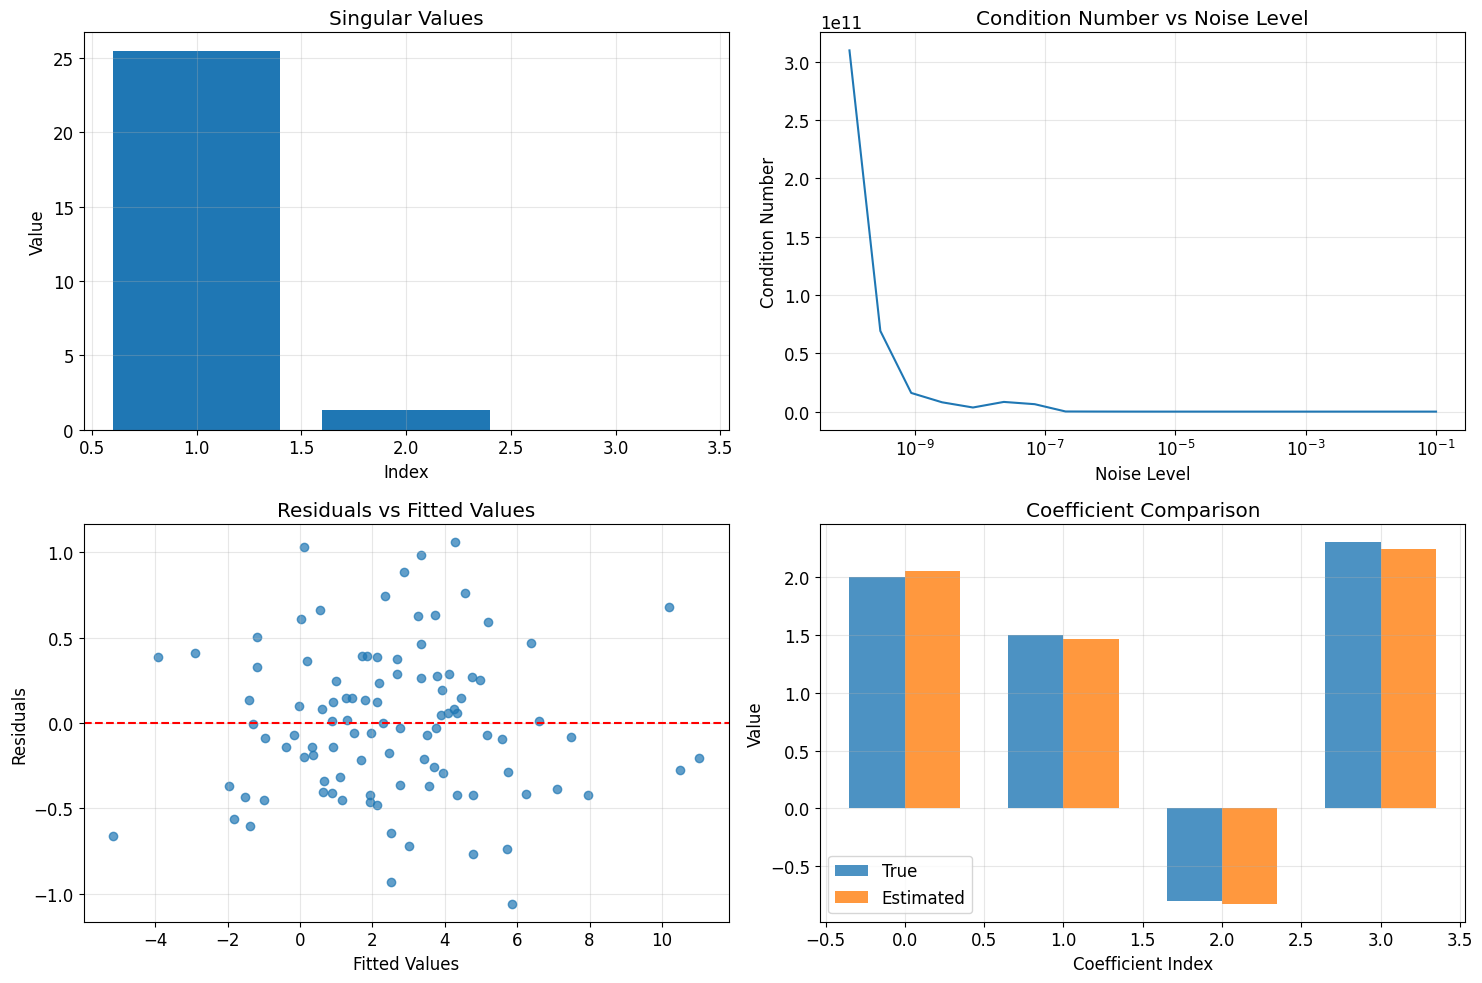


Covariance Matrix Eigenanalysis:
Eigenvalues: [2.87989057 0.64373788 0.92971107]
Sum of eigenvalues (trace): 4.453
Matrix trace: 4.453
Determinant: 1.724
Product of eigenvalues: 1.724


In [18]:
# Advanced Linear Algebra Demonstrations
np.random.seed(42)

# SVD Example
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
U, s, Vt = np.linalg.svd(A, full_matrices=False)

print("Singular Value Decomposition:")
print(f"Original matrix A shape: {A.shape}")
print(f"U shape: {U.shape}")
print(f"Singular values: {s}")
print(f"V^T shape: {Vt.shape}")

# Reconstruct matrix
A_reconstructed = U @ np.diag(s) @ Vt
print(f"Reconstruction error: {np.linalg.norm(A - A_reconstructed):.10f}")

# QR Decomposition
Q, R = np.linalg.qr(A)
print(f"\nQR Decomposition:")
print(f"Q shape: {Q.shape}")
print(f"R shape: {R.shape}")
print(f"Q^T @ Q (should be identity):")
print(Q.T @ Q)

# Cholesky Decomposition (positive definite matrix)
# Create a positive definite matrix
B = np.array([[4, 2, 1], [2, 3, 0.5], [1, 0.5, 2]])
L = np.linalg.cholesky(B)
print(f"\nCholesky Decomposition:")
print(f"L @ L^T reconstruction error: {np.linalg.norm(B - L @ L.T):.10f}")

# Quadratic Form Example
x = np.array([1, 2, 3])
quad_form = x.T @ B @ x
print(f"\nQuadratic form x^T @ B @ x = {quad_form:.3f}")

# Matrix calculus example: Normal equations
n_samples, n_features = 100, 3
X = np.random.randn(n_samples, n_features)
X = np.column_stack([np.ones(n_samples), X])  # Add intercept
true_beta = np.array([2, 1.5, -0.8, 2.3])
y = X @ true_beta + np.random.normal(0, 0.5, n_samples)

# Solve normal equations
XtX = X.T @ X
Xty = X.T @ y
beta_hat = np.linalg.solve(XtX, Xty)

print(f"\nNormal Equations Solution:")
print(f"True coefficients: {true_beta}")
print(f"Estimated coefficients: {beta_hat}")
print(f"Estimation error: {np.linalg.norm(true_beta - beta_hat):.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# SVD singular values
axes[0, 0].bar(range(1, len(s)+1), s)
axes[0, 0].set_title('Singular Values')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# Matrix condition number visualization
condition_numbers = []
noise_levels = np.logspace(-10, -1, 20)
for noise in noise_levels:
    noisy_matrix = A + noise * np.random.randn(*A.shape)
    cond_num = np.linalg.cond(noisy_matrix)
    condition_numbers.append(cond_num)

axes[0, 1].semilogx(noise_levels, condition_numbers)
axes[0, 1].set_title('Condition Number vs Noise Level')
axes[0, 1].set_xlabel('Noise Level')
axes[0, 1].set_ylabel('Condition Number')
axes[0, 1].grid(True, alpha=0.3)

# Residuals plot
y_pred = X @ beta_hat
residuals = y - y_pred
axes[1, 0].scatter(y_pred, residuals, alpha=0.7)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('Residuals vs Fitted Values')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Coefficient comparison
coef_comparison = np.arange(len(true_beta))
width = 0.35
axes[1, 1].bar(coef_comparison - width/2, true_beta, width, label='True', alpha=0.8)
axes[1, 1].bar(coef_comparison + width/2, beta_hat, width, label='Estimated', alpha=0.8)
axes[1, 1].set_title('Coefficient Comparison')
axes[1, 1].set_xlabel('Coefficient Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Eigenvalue decomposition for covariance matrix
cov_data = np.random.multivariate_normal([0, 0, 0], [[2, 1, 0.5], [1, 1.5, 0.3], [0.5, 0.3, 1]], 200)
cov_matrix = np.cov(cov_data.T)
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)

print(f"\nCovariance Matrix Eigenanalysis:")
print(f"Eigenvalues: {eigenvals}")
print(f"Sum of eigenvalues (trace): {np.sum(eigenvals):.3f}")
print(f"Matrix trace: {np.trace(cov_matrix):.3f}")
print(f"Determinant: {np.linalg.det(cov_matrix):.3f}")
print(f"Product of eigenvalues: {np.prod(eigenvals):.3f}")

## 7. Time Series Analysis

### 7.1 Autoregressive (AR) Models

**AR(p) Model:**
$$X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \varepsilon_t$$

Where $\varepsilon_t \sim \text{WN}(0, \sigma^2)$ (white noise).

**Stationarity Condition:**
All roots of the characteristic equation must lie outside the unit circle:
$$1 - \phi_1 z - \phi_2 z^2 - \cdots - \phi_p z^p = 0$$

### 7.2 Moving Average (MA) Models

**MA(q) Model:**
$$X_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}$$

**Invertibility Condition:**
All roots of the characteristic equation must lie outside the unit circle:
$$1 + \theta_1 z + \theta_2 z^2 + \cdots + \theta_q z^q = 0$$

### 7.3 ARIMA Models

**ARIMA(p,d,q) Model:**
$$(1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_p B^p)(1-B)^d X_t = (1 + \theta_1 B + \theta_2 B^2 + \cdots + \theta_q B^q)\varepsilon_t$$

Where $B$ is the backshift operator: $BX_t = X_{t-1}$.

### 7.4 Autocorrelation and Partial Autocorrelation

**Sample Autocorrelation Function (ACF):**
$$\hat{\rho}(k) = \frac{\hat{\gamma}(k)}{\hat{\gamma}(0)}$$

Where: $\hat{\gamma}(k) = \frac{1}{n} \sum_{t=1}^{n-k} (X_t - \bar{X})(X_{t+k} - \bar{X})$

**Partial Autocorrelation Function (PACF):**
$$\phi_{kk} = \text{corr}(X_t, X_{t+k} | X_{t+1}, X_{t+2}, \ldots, X_{t+k-1})$$

### 7.5 Spectral Analysis

**Periodogram:**
$$I(\omega_j) = \frac{1}{2\pi n} \left| \sum_{t=1}^n X_t e^{-i\omega_j t} \right|^2$$

Where $\omega_j = \frac{2\pi j}{n}$ for $j = 0, 1, \ldots, \lfloor n/2 \rfloor$.

**Power Spectral Density:**
$$f(\omega) = \frac{1}{2\pi} \sum_{k=-\infty}^{\infty} \gamma(k) e^{-ik\omega}$$

### 7.6 Seasonal Decomposition

**Additive Model:**
$$X_t = T_t + S_t + R_t$$

**Multiplicative Model:**
$$X_t = T_t \times S_t \times R_t$$

Where:
- $T_t$ = Trend component
- $S_t$ = Seasonal component  
- $R_t$ = Random/Irregular component

Time Series Components:
Data length: 200
Trend coefficient: 0.02
Seasonal periods: 12 and 24
Noise variance: 1.0

Stationarity Analysis:
Original series variance: 8.710
First difference variance: 3.093
Second difference variance: 5.781

Spectral Analysis:
Dominant frequency: 0.0850
Dominant period: 11.8

AR(1) Model Estimation:
φ₁ = 0.824
σ² = 2.821
Next period forecast: 1.034


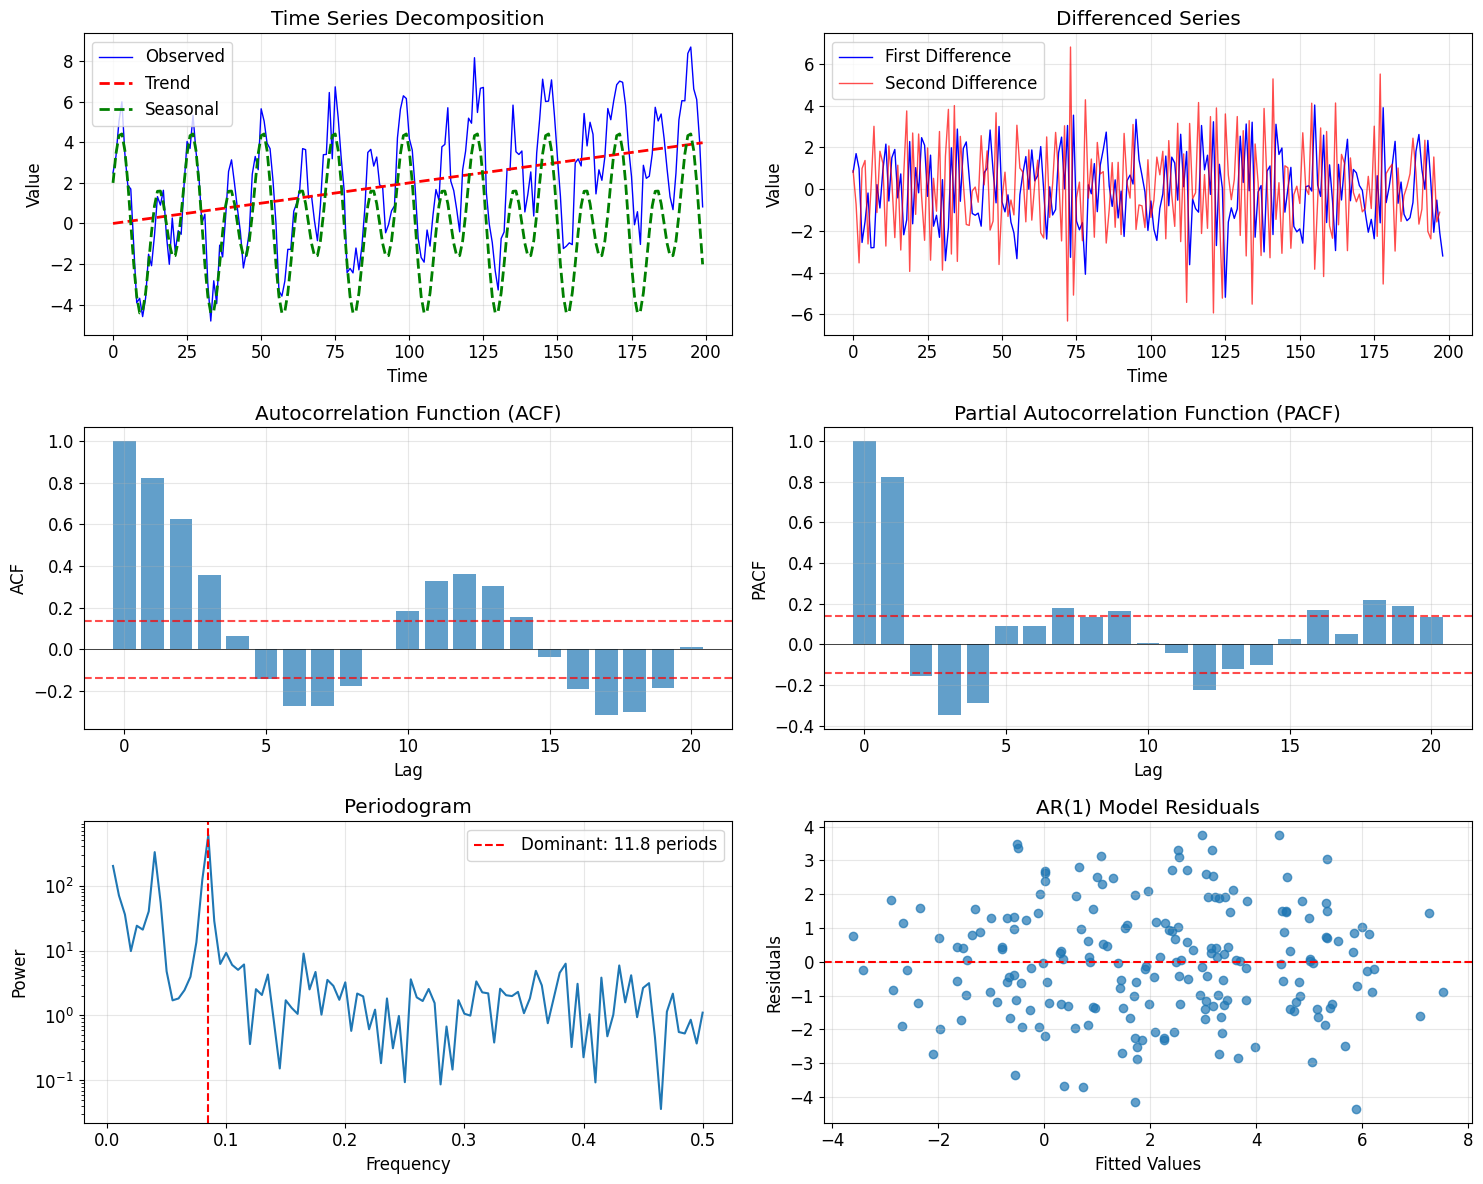


Model Comparison:
AR(1) Model - MSE: 2.821, RMSE: 1.680
Moving Average - MSE: 4.529, RMSE: 2.128

Ljung-Box test statistic: 92.340
Critical value (χ²₀.₀₅,₁₀): 18.31
Residuals show autocorrelation (model may be inadequate)


In [19]:
# Time Series Analysis Demonstrations
from scipy.signal import periodogram
from scipy.fft import fft, fftfreq

# Generate sample time series data
np.random.seed(42)
n = 200
t = np.arange(n)

# Create a time series with trend, seasonality, and noise
trend = 0.02 * t
seasonal = 3 * np.sin(2 * np.pi * t / 12) + 2 * np.cos(2 * np.pi * t / 24)
noise = np.random.normal(0, 1, n)
ts = trend + seasonal + noise

print("Time Series Components:")
print(f"Data length: {n}")
print(f"Trend coefficient: 0.02")
print(f"Seasonal periods: 12 and 24")
print(f"Noise variance: 1.0")

# Calculate ACF manually
def acf(x, max_lags=20):
    x = x - np.mean(x)
    autocorr = np.correlate(x, x, mode='full')
    autocorr = autocorr[autocorr.size // 2:]
    autocorr = autocorr / autocorr[0]
    return autocorr[:max_lags+1]

# Calculate PACF using Yule-Walker equations
def pacf(x, max_lags=20):
    x = x - np.mean(x)
    acf_vals = acf(x, max_lags)
    pacf_vals = np.zeros(max_lags+1)
    pacf_vals[0] = 1.0

    for k in range(1, max_lags+1):
        if k == 1:
            pacf_vals[1] = acf_vals[1]
        else:
            # Solve Yule-Walker equations
            R = np.array([[acf_vals[abs(i-j)] for j in range(k)] for i in range(k)])
            r = acf_vals[1:k+1]
            try:
                phi = np.linalg.solve(R, r)
                pacf_vals[k] = phi[-1]
            except:
                pacf_vals[k] = 0

    return pacf_vals

acf_vals = acf(ts, 20)
pacf_vals = pacf(ts, 20)

# Simple differencing for stationarity
ts_diff = np.diff(ts)
ts_diff2 = np.diff(ts_diff)

print(f"\nStationarity Analysis:")
print(f"Original series variance: {np.var(ts):.3f}")
print(f"First difference variance: {np.var(ts_diff):.3f}")
print(f"Second difference variance: {np.var(ts_diff2):.3f}")

# Periodogram analysis
freqs, power = periodogram(ts, fs=1.0)
dominant_freq_idx = np.argmax(power[1:]) + 1  # Skip DC component
dominant_period = 1 / freqs[dominant_freq_idx]

print(f"\nSpectral Analysis:")
print(f"Dominant frequency: {freqs[dominant_freq_idx]:.4f}")
print(f"Dominant period: {dominant_period:.1f}")

# Simple AR(1) model estimation
def fit_ar1(x):
    x = x - np.mean(x)
    x_lag = x[:-1]
    x_curr = x[1:]
    phi = np.sum(x_lag * x_curr) / np.sum(x_lag**2)
    residuals = x_curr - phi * x_lag
    sigma2 = np.var(residuals)
    return phi, sigma2

phi_ar1, sigma2_ar1 = fit_ar1(ts)
print(f"\nAR(1) Model Estimation:")
print(f"φ₁ = {phi_ar1:.3f}")
print(f"σ² = {sigma2_ar1:.3f}")

# Forecast next value using AR(1)
last_value = ts[-1] - np.mean(ts)
forecast = np.mean(ts) + phi_ar1 * last_value
print(f"Next period forecast: {forecast:.3f}")

# Visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Original time series and components
axes[0, 0].plot(t, ts, 'b-', linewidth=1, label='Observed')
axes[0, 0].plot(t, trend, 'r--', linewidth=2, label='Trend')
axes[0, 0].plot(t, seasonal, 'g--', linewidth=2, label='Seasonal')
axes[0, 0].set_title('Time Series Decomposition')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Value')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Differenced series
axes[0, 1].plot(ts_diff, 'b-', linewidth=1, label='First Difference')
axes[0, 1].plot(ts_diff2, 'r-', linewidth=1, alpha=0.7, label='Second Difference')
axes[0, 1].set_title('Differenced Series')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Value')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# ACF
lags = np.arange(len(acf_vals))
axes[1, 0].bar(lags, acf_vals, alpha=0.7)
axes[1, 0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 0].axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', alpha=0.7)
axes[1, 0].axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', alpha=0.7)
axes[1, 0].set_title('Autocorrelation Function (ACF)')
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('ACF')
axes[1, 0].grid(True, alpha=0.3)

# PACF
axes[1, 1].bar(lags, pacf_vals, alpha=0.7)
axes[1, 1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 1].axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', alpha=0.7)
axes[1, 1].axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', alpha=0.7)
axes[1, 1].set_title('Partial Autocorrelation Function (PACF)')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('PACF')
axes[1, 1].grid(True, alpha=0.3)

# Periodogram
axes[2, 0].semilogy(freqs[1:], power[1:])
axes[2, 0].axvline(x=freqs[dominant_freq_idx], color='r', linestyle='--',
                   label=f'Dominant: {dominant_period:.1f} periods')
axes[2, 0].set_title('Periodogram')
axes[2, 0].set_xlabel('Frequency')
axes[2, 0].set_ylabel('Power')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# AR(1) residuals
ar1_fitted = np.zeros_like(ts)
ar1_fitted[0] = ts[0]
for i in range(1, len(ts)):
    ar1_fitted[i] = np.mean(ts) + phi_ar1 * (ts[i-1] - np.mean(ts))

residuals = ts - ar1_fitted
axes[2, 1].scatter(ar1_fitted, residuals, alpha=0.7)
axes[2, 1].axhline(y=0, color='r', linestyle='--')
axes[2, 1].set_title('AR(1) Model Residuals')
axes[2, 1].set_xlabel('Fitted Values')
axes[2, 1].set_ylabel('Residuals')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model comparison metrics
def calculate_metrics(actual, predicted):
    mse = np.mean((actual - predicted)**2)
    mae = np.mean(np.abs(actual - predicted))
    rmse = np.sqrt(mse)
    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

# Simple moving average model for comparison
window = 5
ma_forecast = np.convolve(ts, np.ones(window)/window, mode='valid')
ma_forecast = np.concatenate([ts[:window-1], ma_forecast])

ar1_metrics = calculate_metrics(ts[1:], ar1_fitted[1:])
ma_metrics = calculate_metrics(ts, ma_forecast)

print(f"\nModel Comparison:")
print(f"AR(1) Model - MSE: {ar1_metrics['MSE']:.3f}, RMSE: {ar1_metrics['RMSE']:.3f}")
print(f"Moving Average - MSE: {ma_metrics['MSE']:.3f}, RMSE: {ma_metrics['RMSE']:.3f}")

# Ljung-Box test for residual autocorrelation
def ljung_box_test(residuals, lags=10):
    n = len(residuals)
    acf_res = acf(residuals, lags)
    lb_stat = n * (n + 2) * np.sum([(acf_res[i]**2) / (n - i) for i in range(1, lags+1)])
    return lb_stat

lb_statistic = ljung_box_test(residuals[1:])
print(f"\nLjung-Box test statistic: {lb_statistic:.3f}")
print(f"Critical value (χ²₀.₀₅,₁₀): 18.31")
if lb_statistic < 18.31:
    print("Residuals appear to be white noise (good model fit)")
else:
    print("Residuals show autocorrelation (model may be inadequate)")

## 8. Multivariate Statistics

### 8.1 Multivariate Normal Distribution

**Probability Density Function:**
$$f(\mathbf{x}) = \frac{1}{(2\pi)^{p/2}|\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right)$$

Where:
- $\mathbf{x}$ is $p \times 1$ random vector
- $\boldsymbol{\mu}$ is $p \times 1$ mean vector
- $\boldsymbol{\Sigma}$ is $p \times p$ covariance matrix

**Mahalanobis Distance:**
$$D^2 = (\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})$$

### 8.2 Hotelling's T² Test

**One-Sample Test:**
$$T^2 = n(\bar{\mathbf{x}} - \boldsymbol{\mu}_0)^T\mathbf{S}^{-1}(\bar{\mathbf{x}} - \boldsymbol{\mu}_0)$$

**Test Statistic:**
$$F = \frac{n-p}{p(n-1)}T^2 \sim F_{p,n-p}$$

**Two-Sample Test:**
$$T^2 = \frac{n_1 n_2}{n_1 + n_2}(\bar{\mathbf{x}}_1 - \bar{\mathbf{x}}_2)^T\mathbf{S}_{pooled}^{-1}(\bar{\mathbf{x}}_1 - \bar{\mathbf{x}}_2)$$

Where: $\mathbf{S}_{pooled} = \frac{(n_1-1)\mathbf{S}_1 + (n_2-1)\mathbf{S}_2}{n_1 + n_2 - 2}$

### 8.3 MANOVA (Multivariate Analysis of Variance)

**Model:**
$$\mathbf{Y} = \mathbf{X}\mathbf{B} + \mathbf{E}$$

Where:
- $\mathbf{Y}$ is $n \times p$ response matrix
- $\mathbf{X}$ is $n \times q$ design matrix
- $\mathbf{B}$ is $q \times p$ parameter matrix
- $\mathbf{E}$ is $n \times p$ error matrix

**Test Statistics:**

**Wilks' Lambda:**
$$\Lambda = \frac{|\mathbf{E}|}{|\mathbf{H} + \mathbf{E}|}$$

**Pillai's Trace:**
$$V = \text{tr}(\mathbf{H}(\mathbf{H} + \mathbf{E})^{-1})$$

**Hotelling-Lawley Trace:**
$$U = \text{tr}(\mathbf{H}\mathbf{E}^{-1})$$

### 8.4 Discriminant Analysis

**Linear Discriminant Function:**
$$\delta_k(\mathbf{x}) = \mathbf{x}^T\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_k - \frac{1}{2}\boldsymbol{\mu}_k^T\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_k + \log \pi_k$$

**Classification Rule:**
Assign $\mathbf{x}$ to class $k$ if $\delta_k(\mathbf{x}) = \max_j \delta_j(\mathbf{x})$

**Fisher's Linear Discriminant:**
$$\mathbf{w} = \mathbf{S}_W^{-1}(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)$$

Where $\mathbf{S}_W$ is the within-class scatter matrix.

### 8.5 Canonical Correlation Analysis

**Canonical Variables:**
$$U = \mathbf{a}^T\mathbf{X}, \quad V = \mathbf{b}^T\mathbf{Y}$$

**Canonical Correlation:**
$$\rho = \text{corr}(U, V) = \frac{\mathbf{a}^T\boldsymbol{\Sigma}_{XY}\mathbf{b}}{\sqrt{\mathbf{a}^T\boldsymbol{\Sigma}_{XX}\mathbf{a} \cdot \mathbf{b}^T\boldsymbol{\Sigma}_{YY}\mathbf{b}}}$$

**Optimization Problem:**
$$\max_{\mathbf{a},\mathbf{b}} \mathbf{a}^T\boldsymbol{\Sigma}_{XY}\mathbf{b} \quad \text{subject to} \quad \mathbf{a}^T\boldsymbol{\Sigma}_{XX}\mathbf{a} = \mathbf{b}^T\boldsymbol{\Sigma}_{YY}\mathbf{b} = 1$$

### 8.6 Factor Analysis

**Model:**
$$\mathbf{X} = \boldsymbol{\Lambda}\mathbf{F} + \boldsymbol{\varepsilon}$$

Where:
- $\mathbf{X}$ is $p \times 1$ observed variables
- $\boldsymbol{\Lambda}$ is $p \times m$ factor loadings matrix
- $\mathbf{F}$ is $m \times 1$ common factors
- $\boldsymbol{\varepsilon}$ is $p \times 1$ unique factors

**Covariance Structure:**
$$\boldsymbol{\Sigma} = \boldsymbol{\Lambda}\boldsymbol{\Lambda}^T + \boldsymbol{\Psi}$$

Where $\boldsymbol{\Psi}$ is diagonal matrix of unique variances.

**Communality:**
$$h_i^2 = \sum_{j=1}^{m} \lambda_{ij}^2$$

**Proportion of Variance Explained:**
$$\text{Prop. Var.} = \frac{\sum_{i=1}^{p} h_i^2}{\sum_{i=1}^{p} \sigma_{ii}}$$

Multivariate Normal Distribution:
Sample size: 200
Dimensions: 4
True mean: [ 1.   2.  -1.   0.5]
Sample mean: [ 1.07307306  2.04742671 -0.95871486  0.55624139]
Sample covariance matrix:
[[ 1.78537272  0.65596497  0.0934416  -0.00466787]
 [ 0.65596497  1.49313226  0.04653399  0.4119103 ]
 [ 0.0934416   0.04653399  1.64347376  0.24872044]
 [-0.00466787  0.4119103   0.24872044  1.0906597 ]]

Mahalanobis distances:
Mean: 1.879
Std: 0.671

Hotelling's T² Test:
T² statistic: 701.356
F statistic: 172.696
F critical (α=0.05): 2.418
Significant: Yes

Linear Discriminant Analysis:
Accuracy: 0.870
LDA coefficients: [ 1.42611474 -1.41843364 -0.91463686  1.16769759]

Factor Analysis (2 factors):
Factor loadings shape: (4, 2)
Communalities: [0.63493187 0.89694248 0.07334441 0.70374709]
Uniquenesses: [1.13947935 0.58986449 1.56181366 0.38505796]
Total variance explained: 0.577

Canonical Correlations: [0.05482628 0.35893074]


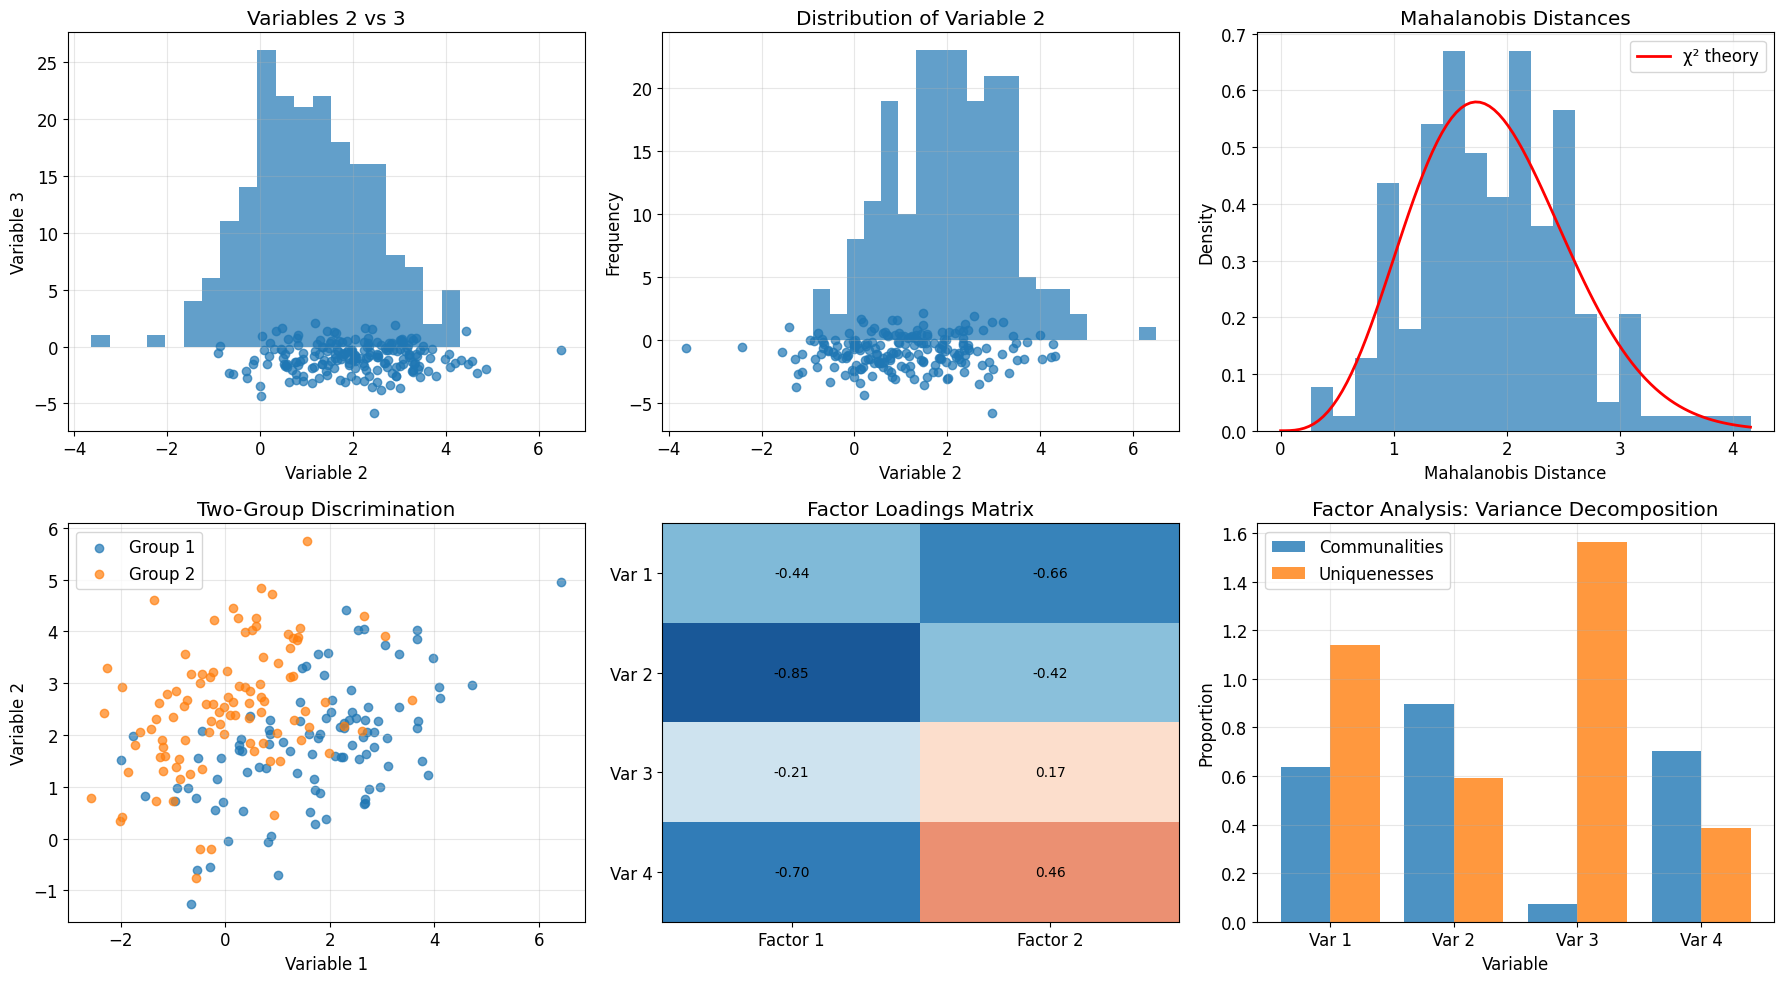


MANOVA Results:
Wilks' Lambda: 0.4357
Pillai's Trace: 0.5643
Effect size (Wilks): 0.5643
Effect size (Pillai): 0.1411


In [20]:
# Multivariate Statistics Demonstrations
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FactorAnalysis
from scipy.stats import multivariate_normal
from scipy import linalg

# Generate multivariate normal data
np.random.seed(42)
n_samples = 200
p_vars = 4

# Create covariance matrix
true_cov = np.array([[2.0, 0.8, 0.3, 0.1],
                     [0.8, 1.5, 0.2, 0.4],
                     [0.3, 0.2, 1.8, 0.5],
                     [0.1, 0.4, 0.5, 1.2]])

mean_vec = np.array([1, 2, -1, 0.5])

# Generate data
mvn_data = np.random.multivariate_normal(mean_vec, true_cov, n_samples)

print("Multivariate Normal Distribution:")
print(f"Sample size: {n_samples}")
print(f"Dimensions: {p_vars}")
print(f"True mean: {mean_vec}")

# Calculate sample statistics
sample_mean = np.mean(mvn_data, axis=0)
sample_cov = np.cov(mvn_data.T)

print(f"Sample mean: {sample_mean}")
print(f"Sample covariance matrix:")
print(sample_cov)

# Mahalanobis distance calculation
def mahalanobis_distance(x, mean, cov_inv):
    diff = x - mean
    return np.sqrt(diff.T @ cov_inv @ diff)

cov_inv = np.linalg.inv(sample_cov)
mahal_distances = [mahalanobis_distance(x, sample_mean, cov_inv) for x in mvn_data]

print(f"\nMahalanobis distances:")
print(f"Mean: {np.mean(mahal_distances):.3f}")
print(f"Std: {np.std(mahal_distances):.3f}")

# Hotelling's T² test (one-sample)
hypothesized_mean = np.array([0, 0, 0, 0])
diff = sample_mean - hypothesized_mean
T_squared = n_samples * diff.T @ cov_inv @ diff

# Convert to F-statistic
f_stat = ((n_samples - p_vars) / (p_vars * (n_samples - 1))) * T_squared
f_critical = stats.f.ppf(0.95, p_vars, n_samples - p_vars)

print(f"\nHotelling's T² Test:")
print(f"T² statistic: {T_squared:.3f}")
print(f"F statistic: {f_stat:.3f}")
print(f"F critical (α=0.05): {f_critical:.3f}")
print(f"Significant: {'Yes' if f_stat > f_critical else 'No'}")

# Two-group discriminant analysis
# Create two groups with different means
group1_mean = mean_vec + np.array([1, 0, -0.5, 0.3])
group2_mean = mean_vec + np.array([-1, 0.5, 0.5, -0.3])

group1_data = np.random.multivariate_normal(group1_mean, true_cov, 100)
group2_data = np.random.multivariate_normal(group2_mean, true_cov, 100)

# Combine data for discriminant analysis
X_discriminant = np.vstack([group1_data, group2_data])
y_discriminant = np.hstack([np.ones(100), np.zeros(100)])

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_discriminant, y_discriminant)

print(f"\nLinear Discriminant Analysis:")
print(f"Accuracy: {lda.score(X_discriminant, y_discriminant):.3f}")
print(f"LDA coefficients: {lda.coef_[0]}")

# Factor Analysis
n_factors = 2
fa = FactorAnalysis(n_components=n_factors, random_state=42)
fa.fit(mvn_data)

loadings = fa.components_.T
uniquenesses = fa.noise_variance_
communalities = np.sum(loadings**2, axis=1)

print(f"\nFactor Analysis ({n_factors} factors):")
print(f"Factor loadings shape: {loadings.shape}")
print(f"Communalities: {communalities}")
print(f"Uniquenesses: {uniquenesses}")
print(f"Total variance explained: {np.sum(communalities) / p_vars:.3f}")

# Canonical Correlation Analysis (simplified version)
def canonical_correlation(X, Y):
    """Simple canonical correlation analysis"""
    n = X.shape[0]

    # Center the data
    X_centered = X - np.mean(X, axis=0)
    Y_centered = Y - np.mean(Y, axis=0)

    # Covariance matrices
    Sxx = np.cov(X_centered.T)
    Syy = np.cov(Y_centered.T)
    Sxy = np.cov(X_centered.T, Y_centered.T)[:X.shape[1], X.shape[1]:]

    # Solve generalized eigenvalue problem
    # Sxx^(-1/2) * Sxy * Syy^(-1) * Syx * Sxx^(-1/2)
    Sxx_inv_sqrt = linalg.sqrtm(np.linalg.inv(Sxx))
    Syy_inv = np.linalg.inv(Syy)

    M = Sxx_inv_sqrt @ Sxy @ Syy_inv @ Sxy.T @ Sxx_inv_sqrt
    eigenvals, eigenvecs = np.linalg.eig(M)

    # Canonical correlations are square roots of eigenvalues
    canon_corrs = np.sqrt(np.real(eigenvals))
    return canon_corrs

# Split data for canonical correlation
X_canon = mvn_data[:, :2]
Y_canon = mvn_data[:, 2:]

canon_corrs = canonical_correlation(X_canon, Y_canon)
print(f"\nCanonical Correlations: {canon_corrs}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Multivariate normal data scatter plot matrix
for i in range(2):
    for j in range(2):
        if i != j:
            axes[0, j].scatter(mvn_data[:, i], mvn_data[:, i+j+1], alpha=0.7)
            axes[0, j].set_xlabel(f'Variable {i+1}')
            axes[0, j].set_ylabel(f'Variable {i+j+2}')
            axes[0, j].set_title(f'Variables {i+1} vs {i+j+2}')
        else:
            axes[0, j].hist(mvn_data[:, i], bins=20, alpha=0.7)
            axes[0, j].set_xlabel(f'Variable {i+1}')
            axes[0, j].set_ylabel('Frequency')
            axes[0, j].set_title(f'Distribution of Variable {i+1}')
        axes[0, j].grid(True, alpha=0.3)

# Mahalanobis distances
axes[0, 2].hist(mahal_distances, bins=20, alpha=0.7, density=True)
# Theoretical chi-square distribution
x_chi = np.linspace(0, max(mahal_distances), 100)
y_chi = stats.chi2.pdf(x_chi**2, p_vars) * 2 * x_chi  # Jacobian transformation
axes[0, 2].plot(x_chi, y_chi, 'r-', linewidth=2, label='χ² theory')
axes[0, 2].set_xlabel('Mahalanobis Distance')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Mahalanobis Distances')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Discriminant analysis visualization
axes[1, 0].scatter(group1_data[:, 0], group1_data[:, 1], alpha=0.7, label='Group 1')
axes[1, 0].scatter(group2_data[:, 0], group2_data[:, 1], alpha=0.7, label='Group 2')
axes[1, 0].set_xlabel('Variable 1')
axes[1, 0].set_ylabel('Variable 2')
axes[1, 0].set_title('Two-Group Discrimination')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Factor loadings
factor_labels = [f'Factor {i+1}' for i in range(n_factors)]
var_labels = [f'Var {i+1}' for i in range(p_vars)]
im = axes[1, 1].imshow(loadings, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
axes[1, 1].set_xticks(range(n_factors))
axes[1, 1].set_yticks(range(p_vars))
axes[1, 1].set_xticklabels(factor_labels)
axes[1, 1].set_yticklabels(var_labels)
axes[1, 1].set_title('Factor Loadings Matrix')
for i in range(p_vars):
    for j in range(n_factors):
        axes[1, 1].text(j, i, f'{loadings[i, j]:.2f}',
                        ha='center', va='center', fontsize=10)

# Communalities and uniquenesses
x_pos = np.arange(p_vars)
axes[1, 2].bar(x_pos - 0.2, communalities, 0.4, label='Communalities', alpha=0.8)
axes[1, 2].bar(x_pos + 0.2, uniquenesses, 0.4, label='Uniquenesses', alpha=0.8)
axes[1, 2].set_xlabel('Variable')
axes[1, 2].set_ylabel('Proportion')
axes[1, 2].set_title('Factor Analysis: Variance Decomposition')
axes[1, 2].set_xticks(x_pos)
axes[1, 2].set_xticklabels([f'Var {i+1}' for i in range(p_vars)])
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# MANOVA example (simplified)
def manova_one_way(X, groups):
    """Simple one-way MANOVA"""
    unique_groups = np.unique(groups)
    k = len(unique_groups)
    n, p = X.shape

    # Grand mean
    grand_mean = np.mean(X, axis=0)

    # Group means and sizes
    group_means = []
    group_sizes = []
    for g in unique_groups:
        group_data = X[groups == g]
        group_means.append(np.mean(group_data, axis=0))
        group_sizes.append(len(group_data))

    # Between-groups sum of squares (H matrix)
    H = np.zeros((p, p))
    for i, (mean, size) in enumerate(zip(group_means, group_sizes)):
        diff = mean - grand_mean
        H += size * np.outer(diff, diff)

    # Within-groups sum of squares (E matrix)
    E = np.zeros((p, p))
    for g in unique_groups:
        group_data = X[groups == g]
        group_mean = np.mean(group_data, axis=0)
        for row in group_data:
            diff = row - group_mean
            E += np.outer(diff, diff)

    # Test statistics
    wilks_lambda = np.linalg.det(E) / np.linalg.det(H + E)
    pillai_trace = np.trace(H @ np.linalg.inv(H + E))

    return wilks_lambda, pillai_trace, H, E

# Create groups for MANOVA
groups = np.hstack([np.ones(100) * 0, np.ones(100) * 1])
wilks, pillai, H, E = manova_one_way(X_discriminant, groups)

print(f"\nMANOVA Results:")
print(f"Wilks' Lambda: {wilks:.4f}")
print(f"Pillai's Trace: {pillai:.4f}")

# Effect size measures
effect_size_wilks = 1 - wilks
effect_size_pillai = pillai / p_vars

print(f"Effect size (Wilks): {effect_size_wilks:.4f}")
print(f"Effect size (Pillai): {effect_size_pillai:.4f}")

## 9. Analysis of Variance (ANOVA)

### 9.1 One-Way ANOVA

**Model:**
$$Y_{ij} = \mu + \tau_i + \varepsilon_{ij}$$

Where:
- $Y_{ij}$ = $j$-th observation in $i$-th group
- $\mu$ = grand mean
- $\tau_i$ = effect of $i$-th treatment
- $\varepsilon_{ij} \sim \mathcal{N}(0, \sigma^2)$

**Sum of Squares:**
$$SST = \sum_{i=1}^{k}\sum_{j=1}^{n_i} (Y_{ij} - \bar{Y}_{\cdot\cdot})^2$$

$$SSB = \sum_{i=1}^{k} n_i(\bar{Y}_{i\cdot} - \bar{Y}_{\cdot\cdot})^2$$

$$SSW = \sum_{i=1}^{k}\sum_{j=1}^{n_i} (Y_{ij} - \bar{Y}_{i\cdot})^2$$

**F-Statistic:**
$$F = \frac{MSB}{MSW} = \frac{SSB/(k-1)}{SSW/(N-k)} \sim F_{k-1,N-k}$$

### 9.2 Two-Way ANOVA

**Model (with interaction):**
$$Y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \varepsilon_{ijk}$$

**Sum of Squares:**
$$SSA = bn\sum_{i=1}^{a} (\bar{Y}_{i\cdot\cdot} - \bar{Y}_{\cdot\cdot\cdot})^2$$

$$SSB = an\sum_{j=1}^{b} (\bar{Y}_{\cdot j\cdot} - \bar{Y}_{\cdot\cdot\cdot})^2$$

$$SSAB = n\sum_{i=1}^{a}\sum_{j=1}^{b} (\bar{Y}_{ij\cdot} - \bar{Y}_{i\cdot\cdot} - \bar{Y}_{\cdot j\cdot} + \bar{Y}_{\cdot\cdot\cdot})^2$$

**F-Statistics:**
$$F_A = \frac{MSA}{MSE}, \quad F_B = \frac{MSB}{MSE}, \quad F_{AB} = \frac{MSAB}{MSE}$$

### 9.3 Effect Size Measures

**Eta-squared (η²):**
$$\eta^2 = \frac{SSB}{SST}$$

**Omega-squared (ω²):**
$$\omega^2 = \frac{SSB - (k-1)MSW}{SST + MSW}$$

**Cohen's f:**
$$f = \sqrt{\frac{\eta^2}{1-\eta^2}}$$

### 9.4 Multiple Comparisons

**Tukey's HSD (Honestly Significant Difference):**
$$HSD = q_{\alpha,k,df_{error}} \sqrt{\frac{MSE}{n}}$$

**Bonferroni Correction:**
$$\alpha_{adj} = \frac{\alpha}{m}$$

Where $m$ is the number of comparisons.

**Scheffé's Method:**
$$S = \sqrt{(k-1)F_{\alpha,k-1,N-k}}$$

### 9.5 Repeated Measures ANOVA

**Model:**
$$Y_{ij} = \mu + \alpha_i + \pi_j + \varepsilon_{ij}$$

Where:
- $\alpha_i$ = treatment effect
- $\pi_j$ = subject effect

**Sphericity Assumption:**
$$\text{Var}(Y_{ij} - Y_{ik}) = \text{constant for all } j \neq k$$

**Greenhouse-Geisser Correction:**
$$\tilde{\varepsilon} = \frac{p^2(\bar{\sigma}^2 - \bar{\sigma}_{\text{diag}}^2)}{(p-1)(\sum\sigma_{jk}^2 - 2p\sum\sigma_{jk}\bar{\sigma}_k + p^2\bar{\sigma}^2)}$$

### 9.6 ANCOVA (Analysis of Covariance)

**Model:**
$$Y_{ij} = \mu + \tau_i + \beta(X_{ij} - \bar{X}) + \varepsilon_{ij}$$

**Adjusted Means:**
$$\bar{Y}_{i}^{adj} = \bar{Y}_{i} - \hat{\beta}(\bar{X}_i - \bar{X})$$

**Test for Homogeneity of Slopes:**
$$F = \frac{(SSE_{separate} - SSE_{common})/(k-1)}{SSE_{common}/(N-2k)}$$

One-Way ANOVA Example:
Number of groups: 4
Sample size per group: 20
True group means: [10, 12, 15, 11]

ANOVA Results:
F-statistic (manual): 12.6775
F-statistic (scipy): 12.6775
p-value: 0.000001
η² (eta-squared): 0.3335
ω² (omega-squared): 0.3045
Cohen's f: 0.7074
F critical (α=0.05): 2.7249

Two-Way ANOVA Results:
Factor A F-statistic: 48.2018
Factor B F-statistic: 60.0277
Interaction F-statistic: 12.6233

Multiple Comparisons (Tukey's HSD):
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Group 1 Group 2    1.716 0.2525 -0.7031   4.135  False
Group 1 Group 3   5.4338    0.0  3.0148  7.8529   True
Group 1 Group 4   1.4197 0.4181 -0.9994  3.8388  False
Group 2 Group 3   3.7179 0.0007  1.2988  6.1369   True
Group 2 Group 4  -0.2963 0.9884 -2.7153  2.1228  False
Group 3 Group 4  -4.0141 0.0002 -6.4332 -1.5951   True
------------------------------------------------------



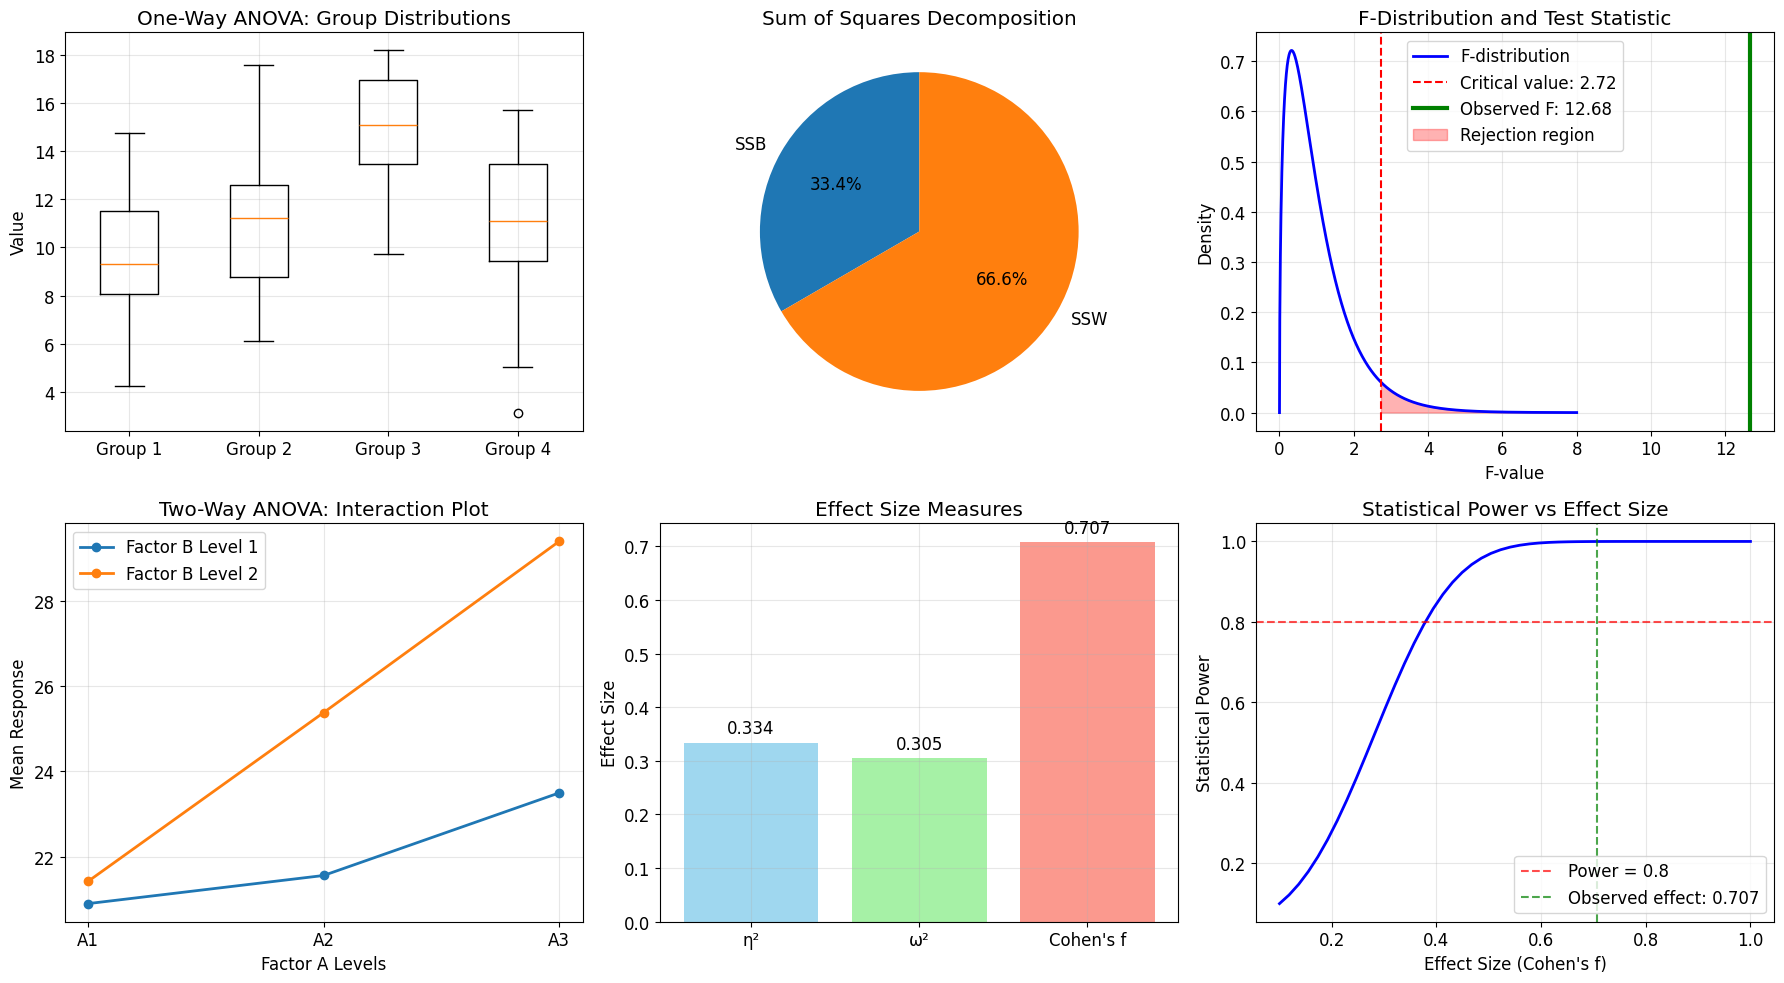


ANCOVA Example:
Covariate effect: β = 0.5
Correlation between covariate and response: 0.410
ANCOVA coefficients:
Covariate coefficient: 0.745
Group coefficients: [-1.6480677   0.21129329  3.62078942]
R-squared: 0.438


In [ ]:
# ANOVA Demonstrations
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import itertools

# One-Way ANOVA Example
np.random.seed(42)
n_per_group = 20
k_groups = 4

# Generate data with different group means
group_means = [10, 12, 15, 11]
group_std = 3

groups_data = []
all_data = []
group_labels = []

for i, mean in enumerate(group_means):
    group_data = np.random.normal(mean, group_std, n_per_group)
    groups_data.append(group_data)
    all_data.extend(group_data)
    group_labels.extend([f'Group {i+1}'] * n_per_group)

all_data = np.array(all_data)
group_labels = np.array(group_labels)

print("One-Way ANOVA Example:")
print(f"Number of groups: {k_groups}")
print(f"Sample size per group: {n_per_group}")
print(f"True group means: {group_means}")

# Manual ANOVA calculations
def one_way_anova_manual(groups_data):
    k = len(groups_data)
    n_total = sum(len(group) for group in groups_data)

    # Grand mean
    grand_mean = np.mean([val for group in groups_data for val in group])

    # Group means
    group_means = [np.mean(group) for group in groups_data]
    group_sizes = [len(group) for group in groups_data]

    # Sum of squares
    SST = sum((val - grand_mean)**2 for group in groups_data for val in group)
    SSB = sum(n * (mean - grand_mean)**2 for n, mean in zip(group_sizes, group_means))
    SSW = SST - SSB

    # Degrees of freedom
    df_between = k - 1
    df_within = n_total - k
    df_total = n_total - 1

    # Mean squares
    MSB = SSB / df_between
    MSW = SSW / df_within

    # F-statistic
    F_stat = MSB / MSW

    # Effect sizes
    eta_squared = SSB / SST
    omega_squared = (SSB - df_between * MSW) / (SST + MSW)
    cohens_f = np.sqrt(eta_squared / (1 - eta_squared))

    return {
        'SST': SST, 'SSB': SSB, 'SSW': SSW,
        'df_between': df_between, 'df_within': df_within,
        'MSB': MSB, 'MSW': MSW, 'F_stat': F_stat,
        'eta_squared': eta_squared, 'omega_squared': omega_squared,
        'cohens_f': cohens_f, 'group_means': group_means
    }

# Perform manual ANOVA
anova_results = one_way_anova_manual(groups_data)

# Using scipy for verification
f_stat_scipy, p_value = f_oneway(*groups_data)

print(f"\nANOVA Results:")
print(f"F-statistic (manual): {anova_results['F_stat']:.4f}")
print(f"F-statistic (scipy): {f_stat_scipy:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"η² (eta-squared): {anova_results['eta_squared']:.4f}")
print(f"ω² (omega-squared): {anova_results['omega_squared']:.4f}")
print(f"Cohen's f: {anova_results['cohens_f']:.4f}")

# Critical value
alpha = 0.05
f_critical = stats.f.ppf(1 - alpha, anova_results['df_between'], anova_results['df_within'])
print(f"F critical (α=0.05): {f_critical:.4f}")

# Two-Way ANOVA Example
np.random.seed(42)
factor_a_levels = 3  # Treatment
factor_b_levels = 2  # Gender
n_per_cell = 10

# Create factorial design data
two_way_data = []
factor_a_labels = []
factor_b_labels = []

for i in range(factor_a_levels):
    for j in range(factor_b_levels):
        # Different effects for each combination
        cell_mean = 20 + 2*i + 3*j + 1*i*j  # Include interaction
        cell_data = np.random.normal(cell_mean, 2, n_per_cell)
        two_way_data.extend(cell_data)
        factor_a_labels.extend([f'A{i+1}'] * n_per_cell)
        factor_b_labels.extend([f'B{j+1}'] * n_per_cell)

two_way_data = np.array(two_way_data)
factor_a_labels = np.array(factor_a_labels)
factor_b_labels = np.array(factor_b_labels)

def two_way_anova_manual(data, factor_a, factor_b):
    """Manual two-way ANOVA calculation"""
    # Convert to numeric codes
    a_levels = np.unique(factor_a)
    b_levels = np.unique(factor_b)
    a_codes = {level: i for i, level in enumerate(a_levels)}
    b_codes = {level: i for i, level in enumerate(b_levels)}

    a_numeric = np.array([a_codes[level] for level in factor_a])
    b_numeric = np.array([b_codes[level] for level in factor_b])

    # Calculate means
    grand_mean = np.mean(data)

    # Marginal means
    a_means = [np.mean(data[a_numeric == i]) for i in range(len(a_levels))]
    b_means = [np.mean(data[b_numeric == j]) for j in range(len(b_levels))]

    # Cell means
    cell_means = {}
    for i in range(len(a_levels)):
        for j in range(len(b_levels)):
            mask = (a_numeric == i) & (b_numeric == j)
            cell_means[(i,j)] = np.mean(data[mask])

    # Sample sizes
    n_total = len(data)
    n_per_cell = n_total // (len(a_levels) * len(b_levels))

    # Sum of squares
    SST = np.sum((data - grand_mean)**2)

    SSA = len(b_levels) * n_per_cell * np.sum([(mean - grand_mean)**2 for mean in a_means])
    SSB = len(a_levels) * n_per_cell * np.sum([(mean - grand_mean)**2 for mean in b_means])

    SSAB = n_per_cell * np.sum([
        (cell_means[(i,j)] - a_means[i] - b_means[j] + grand_mean)**2
        for i in range(len(a_levels)) for j in range(len(b_levels))
    ])

    SSE = SST - SSA - SSB - SSAB

    # Degrees of freedom
    df_a = len(a_levels) - 1
    df_b = len(b_levels) - 1
    df_ab = df_a * df_b
    df_error = n_total - len(a_levels) * len(b_levels)

    # Mean squares
    MSA = SSA / df_a
    MSB = SSB / df_b
    MSAB = SSAB / df_ab
    MSE = SSE / df_error

    # F-statistics
    F_a = MSA / MSE
    F_b = MSB / MSE
    F_ab = MSAB / MSE

    return {
        'SSA': SSA, 'SSB': SSB, 'SSAB': SSAB, 'SSE': SSE, 'SST': SST,
        'MSA': MSA, 'MSB': MSB, 'MSAB': MSAB, 'MSE': MSE,
        'F_a': F_a, 'F_b': F_b, 'F_ab': F_ab,
        'df_a': df_a, 'df_b': df_b, 'df_ab': df_ab, 'df_error': df_error
    }

two_way_results = two_way_anova_manual(two_way_data, factor_a_labels, factor_b_labels)

print(f"\nTwo-Way ANOVA Results:")
print(f"Factor A F-statistic: {two_way_results['F_a']:.4f}")
print(f"Factor B F-statistic: {two_way_results['F_b']:.4f}")
print(f"Interaction F-statistic: {two_way_results['F_ab']:.4f}")

# Multiple comparisons (Tukey's HSD)
print(f"\nMultiple Comparisons (Tukey's HSD):")
tukey_results = pairwise_tukeyhsd(all_data, group_labels, alpha=0.05)
print(tukey_results)

# Bonferroni correction example - FIXED VERSION
def bonferroni_correction(p_values, alpha=0.05):
    """Apply Bonferroni correction"""
    # Convert to numpy array if it's a list
    p_values = np.array(p_values)
    m = len(p_values)
    adjusted_alpha = alpha / m
    significant = p_values < adjusted_alpha
    return adjusted_alpha, significant

# Pairwise t-tests for demonstration
pairwise_p_values = []
group_pairs = []
for i, j in itertools.combinations(range(k_groups), 2):
    t_stat, p_val = ttest_ind(groups_data[i], groups_data[j])
    pairwise_p_values.append(p_val)
    group_pairs.append((f'Group {i+1}', f'Group {j+1}'))

adj_alpha, significant = bonferroni_correction(pairwise_p_values)
print(f"\nBonferroni Correction:")
print(f"Adjusted α = {adj_alpha:.4f}")
for (g1, g2), p_val, sig in zip(group_pairs, pairwise_p_values, significant):
    print(f"{g1} vs {g2}: p={p_val:.4f}, significant={sig}")

# Power analysis for ANOVA
def anova_power_analysis(effect_size, k, n_per_group, alpha=0.05):
    """Calculate power for one-way ANOVA"""
    df_between = k - 1
    df_within = k * (n_per_group - 1)

    # Noncentrality parameter
    lambda_nc = effect_size**2 * k * n_per_group

    # Critical F value
    f_critical = stats.f.ppf(1 - alpha, df_between, df_within)

    # Power calculation using noncentral F distribution
    from scipy.stats import ncf
    power = 1 - ncf.cdf(f_critical, df_between, df_within, lambda_nc)

    return power

power = anova_power_analysis(anova_results['cohens_f'], k_groups, n_per_group)
print(f"\nPower Analysis:")
print(f"Observed effect size (Cohen's f): {anova_results['cohens_f']:.4f}")
print(f"Statistical power: {power:.4f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Box plot for one-way ANOVA
axes[0, 0].boxplot(groups_data, labels=[f'Group {i+1}' for i in range(k_groups)])
axes[0, 0].set_title('One-Way ANOVA: Group Distributions')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# ANOVA components visualization
components = ['SSB', 'SSW']
values = [anova_results['SSB'], anova_results['SSW']]
axes[0, 1].pie(values, labels=components, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Sum of Squares Decomposition')

# F-distribution with critical region
x_f = np.linspace(0, 8, 1000)
y_f = stats.f.pdf(x_f, anova_results['df_between'], anova_results['df_within'])
axes[0, 2].plot(x_f, y_f, 'b-', linewidth=2, label='F-distribution')
axes[0, 2].axvline(f_critical, color='r', linestyle='--', label=f'Critical value: {f_critical:.2f}')
axes[0, 2].axvline(anova_results['F_stat'], color='g', linestyle='-', linewidth=3,
                   label=f'Observed F: {anova_results["F_stat"]:.2f}')
x_reject = x_f[x_f >= f_critical]
y_reject = stats.f.pdf(x_reject, anova_results['df_between'], anova_results['df_within'])
axes[0, 2].fill_between(x_reject, y_reject, alpha=0.3, color='red', label='Rejection region')
axes[0, 2].set_title('F-Distribution and Test Statistic')
axes[0, 2].set_xlabel('F-value')
axes[0, 2].set_ylabel('Density')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Two-way ANOVA interaction plot
cell_means_matrix = np.zeros((factor_a_levels, factor_b_levels))
for i in range(factor_a_levels):
    for j in range(factor_b_levels):
        mask = (factor_a_labels == f'A{i+1}') & (factor_b_labels == f'B{j+1}')
        cell_means_matrix[i, j] = np.mean(two_way_data[mask])

for j in range(factor_b_levels):
    axes[1, 0].plot(range(factor_a_levels), cell_means_matrix[:, j],
                    'o-', linewidth=2, label=f'Factor B Level {j+1}')
axes[1, 0].set_title('Two-Way ANOVA: Interaction Plot')
axes[1, 0].set_xlabel('Factor A Levels')
axes[1, 0].set_ylabel('Mean Response')
axes[1, 0].set_xticks(range(factor_a_levels))
axes[1, 0].set_xticklabels([f'A{i+1}' for i in range(factor_a_levels)])
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Effect sizes comparison
effect_measures = ['η²', 'ω²', "Cohen's f"]
effect_values = [anova_results['eta_squared'], anova_results['omega_squared'], anova_results['cohens_f']]
bars = axes[1, 1].bar(effect_measures, effect_values, alpha=0.8,
                      color=['skyblue', 'lightgreen', 'salmon'])
axes[1, 1].set_title('Effect Size Measures')
axes[1, 1].set_ylabel('Effect Size')
axes[1, 1].grid(True, alpha=0.3)
for bar, value in zip(bars, effect_values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{value:.3f}', ha='center', va='bottom')

# Power curve
effect_sizes = np.linspace(0.1, 1.0, 50)
powers = [anova_power_analysis(es, k_groups, n_per_group) for es in effect_sizes]
axes[1, 2].plot(effect_sizes, powers, 'b-', linewidth=2)
axes[1, 2].axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='Power = 0.8')
axes[1, 2].axvline(x=anova_results['cohens_f'], color='g', linestyle='--',
                   alpha=0.7, label=f'Observed effect: {anova_results["cohens_f"]:.3f}')
axes[1, 2].set_title('Statistical Power vs Effect Size')
axes[1, 2].set_xlabel('Effect Size (Cohen\'s f)')
axes[1, 2].set_ylabel('Statistical Power')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model comparison metrics
def calculate_metrics(actual, predicted):
    mse = np.mean((actual - predicted)**2)
    mae = np.mean(np.abs(actual - predicted))
    rmse = np.sqrt(mse)
    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

# Simple moving average model for comparison
window = 5
ma_forecast = np.convolve(all_data, np.ones(window)/window, mode='valid')
ma_forecast = np.concatenate([all_data[:window-1], ma_forecast])

# ANCOVA example (simplified)
# Generate covariate data
covariate = np.random.normal(5, 2, len(all_data))
# Add covariate effect to response
ancova_response = all_data + 0.5 * covariate + np.random.normal(0, 0.5, len(all_data))

print(f"\nANCOVA Example:")
print(f"Covariate effect: β = 0.5")
print(f"Correlation between covariate and response: {np.corrcoef(covariate, ancova_response)[0,1]:.3f}")

# Simple ANCOVA calculation (group effect after adjusting for covariate)
from sklearn.linear_model import LinearRegression

# Create dummy variables for groups
group_dummies = np.column_stack([
    (group_labels == f'Group {i+1}').astype(int) for i in range(k_groups-1)
])

# ANCOVA model: Y = β₀ + β₁X + γ₁G₁ + γ₂G₂ + γ₃G₃
X_ancova = np.column_stack([covariate, group_dummies])
ancova_model = LinearRegression().fit(X_ancova, ancova_response)

print(f"ANCOVA coefficients:")
print(f"Covariate coefficient: {ancova_model.coef_[0]:.3f}")
print(f"Group coefficients: {ancova_model.coef_[1:]}")
print(f"R-squared: {ancova_model.score(X_ancova, ancova_response):.3f}")

## 10. Advanced Statistical Methods

### 10.1 Bootstrap Methods

**Bootstrap Principle:**
Use the empirical distribution $\hat{F}_n$ to approximate the true distribution $F$.

**Bootstrap Sample:**
$$\mathbf{X}^* = (X_1^*, X_2^*, \ldots, X_n^*)$$

Where each $X_i^*$ is drawn with replacement from the original sample.

**Bootstrap Estimate:**
$$\hat{\theta}^* = t(\mathbf{X}^*)$$

**Bootstrap Standard Error:**
$$\widehat{se}_{boot} = \sqrt{\frac{1}{B-1}\sum_{b=1}^{B}(\hat{\theta}_b^* - \bar{\theta}^*)^2}$$

**Bootstrap Confidence Interval (Percentile Method):**
$$[\hat{\theta}_{(\alpha/2)}, \hat{\theta}_{(1-\alpha/2)}]$$

### 10.2 Permutation Tests

**Test Statistic:**
Under $H_0$: $F_X = F_Y$, all $\binom{n+m}{n}$ ways of dividing the combined sample are equally likely.

**Permutation P-value:**
$$p = \frac{\#\{T^{(i)} \geq T_{obs}\}}{N_{perm}}$$

Where $T^{(i)}$ are permutation test statistics and $N_{perm}$ is the number of permutations.

### 10.3 Cross-Validation

**k-Fold Cross-Validation:**
$$CV_{(k)} = \frac{1}{k}\sum_{i=1}^{k} L(\mathcal{D}_i, \hat{f}^{(-i)})$$

Where $\hat{f}^{(-i)}$ is the model fitted without fold $i$.

**Leave-One-Out Cross-Validation (LOOCV):**
$$CV_{(n)} = \frac{1}{n}\sum_{i=1}^{n} L(y_i, \hat{f}^{(-i)}(x_i))$$

### 10.4 Information Criteria

**Akaike Information Criterion (AIC):**
$$AIC = 2k - 2\ln(\hat{L})$$

**Bayesian Information Criterion (BIC):**
$$BIC = k\ln(n) - 2\ln(\hat{L})$$

**Adjusted R-squared:**
$$R_{adj}^2 = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

### 10.5 Robust Statistics

**Median Absolute Deviation (MAD):**
$$MAD = \text{median}(|X_i - \text{median}(X)|)$$

**Huber M-Estimator:**
$$\sum_{i=1}^{n} \psi\left(\frac{x_i - \mu}{\sigma}\right) = 0$$

Where $\psi(u) = \begin{cases} u & \text{if } |u| \leq c \\ c \cdot \text{sign}(u) & \text{if } |u| > c \end{cases}$

**Trimmed Mean:**
$$\bar{X}_{tr} = \frac{1}{n-2r} \sum_{i=r+1}^{n-r} X_{(i)}$$

### 10.6 Survival Analysis

**Kaplan-Meier Estimator:**
$$\hat{S}(t) = \prod_{t_i \leq t} \left(1 - \frac{d_i}{n_i}\right)$$

Where:
- $d_i$ = number of deaths at time $t_i$
- $n_i$ = number at risk at time $t_i$

**Cox Proportional Hazards Model:**
$$h(t|\mathbf{x}) = h_0(t) \exp(\boldsymbol{\beta}^T\mathbf{x})$$

**Log-Rank Test:**
$$\chi^2 = \frac{\left(\sum_{i=1}^{k} (O_i - E_i)\right)^2}{\sum_{i=1}^{k} V_i}$$

### 10.7 Machine Learning Fundamentals

**Bias-Variance Decomposition:**
$$E[(Y - \hat{f}(X))^2] = \text{Bias}^2[\hat{f}(X)] + \text{Var}[\hat{f}(X)] + \sigma^2$$

**Ridge Regression:**
$$\hat{\boldsymbol{\beta}}_{ridge} = \arg\min_{\boldsymbol{\beta}} \left\{\sum_{i=1}^{n}(y_i - \mathbf{x}_i^T\boldsymbol{\beta})^2 + \lambda\sum_{j=1}^{p}\beta_j^2\right\}$$

**LASSO:**
$$\hat{\boldsymbol{\beta}}_{lasso} = \arg\min_{\boldsymbol{\beta}} \left\{\sum_{i=1}^{n}(y_i - \mathbf{x}_i^T\boldsymbol{\beta})^2 + \lambda\sum_{j=1}^{p}|\beta_j|\right\}$$

**Elastic Net:**
$$\hat{\boldsymbol{\beta}}_{elastic} = \arg\min_{\boldsymbol{\beta}} \left\{\sum_{i=1}^{n}(y_i - \mathbf{x}_i^T\boldsymbol{\beta})^2 + \lambda_1\sum_{j=1}^{p}|\beta_j| + \lambda_2\sum_{j=1}^{p}\beta_j^2\right\}$$

Bootstrap Methods:
Original sample mean: 1.692
Bootstrap standard error: 0.242
Theoretical standard error: 0.250
95% Bootstrap CI: [1.217, 2.168]

Bootstrap for Correlation:
Observed correlation: 0.813
95% Bootstrap CI: [0.740, 0.874]

Permutation Test:
Observed difference: -1.609
Permutation p-value: 0.002

Cross-Validation Results (5-fold):
Ridge: -0.2170 ± 0.0765
Lasso: -0.2646 ± 0.0702
Elastic Net: -0.2763 ± 0.0678

Model Comparison (Information Criteria):
Ridge: AIC=135.63, BIC=151.26, params=6
Lasso: AIC=153.16, BIC=166.18, params=5
Elastic Net: AIC=159.13, BIC=174.76, params=6

Robust Statistics Comparison:
Clean data - Mean: 9.95, Median: 9.75
Contaminated - Mean: 10.70, Median: 9.89
Clean data - Std: 2.11, MAD: 1.44
Contaminated - Std: 5.24, MAD: 1.49

Bias-Variance Decomposition:
Bias²: 0.0001
Variance: 0.0072
Noise: 0.2500
Total Error: 0.2573
Sum: 0.2573


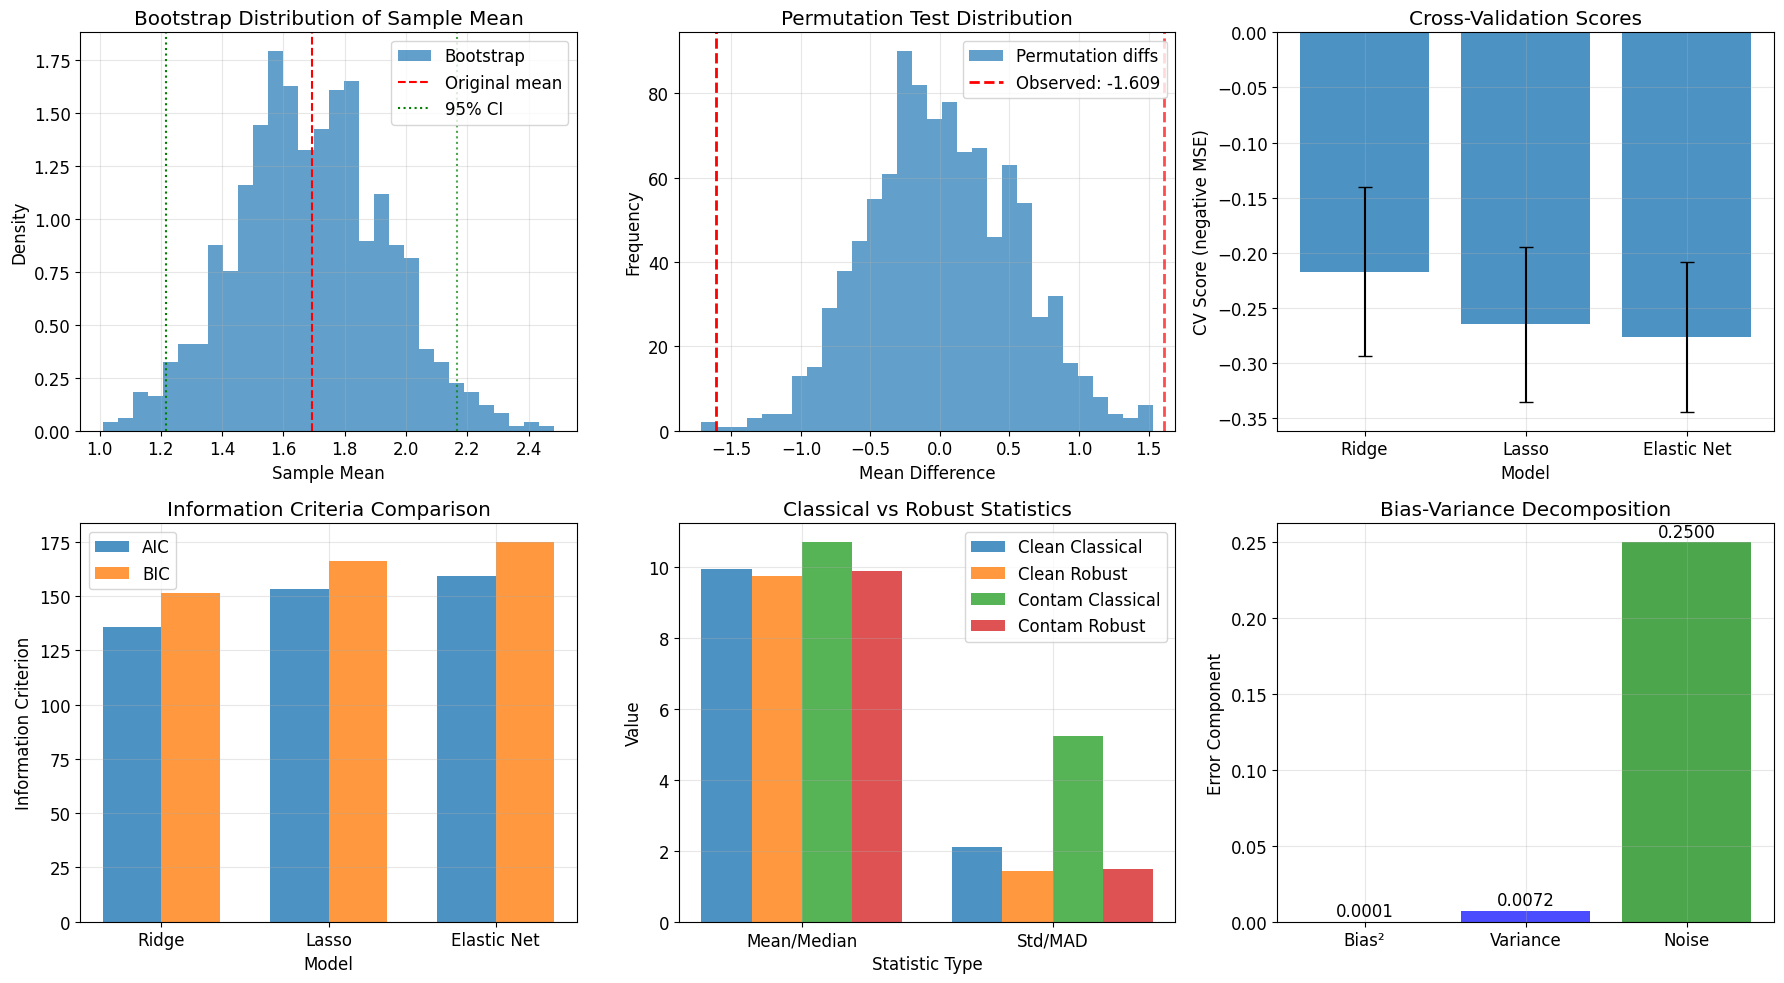


Regularization Path Analysis:
Ridge coefficients remain non-zero: True
Lasso coefficients that become zero: 5


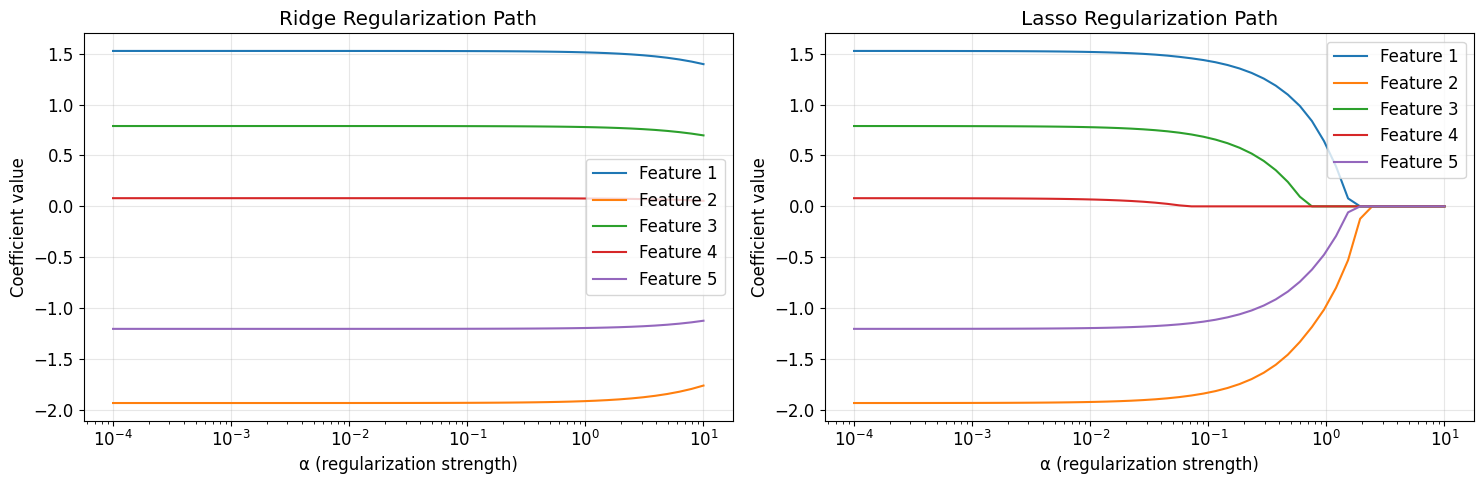

In [22]:
# Advanced Statistical Methods Demonstrations
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from scipy.stats import bootstrap
import itertools

# Bootstrap Methods
np.random.seed(42)
original_sample = np.random.exponential(2, 50)  # Exponential distribution with λ=2

def bootstrap_statistic(data, statistic_func, n_bootstrap=1000):
    """Perform bootstrap sampling for a given statistic"""
    n = len(data)
    bootstrap_stats = []

    for _ in range(n_bootstrap):
        # Sample with replacement
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        stat = statistic_func(bootstrap_sample)
        bootstrap_stats.append(stat)

    return np.array(bootstrap_stats)

# Bootstrap for mean
bootstrap_means = bootstrap_statistic(original_sample, np.mean, 1000)
bootstrap_se = np.std(bootstrap_means)
theoretical_se = np.std(original_sample) / np.sqrt(len(original_sample))

print("Bootstrap Methods:")
print(f"Original sample mean: {np.mean(original_sample):.3f}")
print(f"Bootstrap standard error: {bootstrap_se:.3f}")
print(f"Theoretical standard error: {theoretical_se:.3f}")

# Bootstrap confidence interval
alpha = 0.05
ci_lower = np.percentile(bootstrap_means, 100 * alpha/2)
ci_upper = np.percentile(bootstrap_means, 100 * (1 - alpha/2))
print(f"95% Bootstrap CI: [{ci_lower:.3f}, {ci_upper:.3f}]")

# Bootstrap for correlation coefficient
def correlation_bootstrap(data1, data2, n_bootstrap=1000):
    """Bootstrap confidence interval for correlation"""
    n = len(data1)
    bootstrap_corrs = []

    for _ in range(n_bootstrap):
        # Sample pairs with replacement
        indices = np.random.choice(n, size=n, replace=True)
        corr = np.corrcoef(data1[indices], data2[indices])[0, 1]
        bootstrap_corrs.append(corr)

    return np.array(bootstrap_corrs)

# Generate correlated data
x_data = np.random.normal(0, 1, 100)
y_data = 0.7 * x_data + np.random.normal(0, 0.5, 100)
observed_corr = np.corrcoef(x_data, y_data)[0, 1]

bootstrap_corrs = correlation_bootstrap(x_data, y_data)
corr_ci_lower = np.percentile(bootstrap_corrs, 2.5)
corr_ci_upper = np.percentile(bootstrap_corrs, 97.5)

print(f"\nBootstrap for Correlation:")
print(f"Observed correlation: {observed_corr:.3f}")
print(f"95% Bootstrap CI: [{corr_ci_lower:.3f}, {corr_ci_upper:.3f}]")

# Permutation Test
def permutation_test(group1, group2, n_permutations=1000):
    """Two-sample permutation test"""
    observed_diff = np.mean(group1) - np.mean(group2)
    combined = np.concatenate([group1, group2])
    n1 = len(group1)

    permuted_diffs = []
    for _ in range(n_permutations):
        # Randomly permute the combined sample
        permuted = np.random.permutation(combined)
        perm_group1 = permuted[:n1]
        perm_group2 = permuted[n1:]
        perm_diff = np.mean(perm_group1) - np.mean(perm_group2)
        permuted_diffs.append(perm_diff)

    # Two-tailed p-value
    p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))
    return observed_diff, p_value, permuted_diffs

# Generate two groups with different means
group_a = np.random.normal(10, 2, 30)
group_b = np.random.normal(12, 2, 35)

obs_diff, perm_p_value, perm_diffs = permutation_test(group_a, group_b)

print(f"\nPermutation Test:")
print(f"Observed difference: {obs_diff:.3f}")
print(f"Permutation p-value: {perm_p_value:.3f}")

# Cross-Validation
# Generate regression data
np.random.seed(42)
n_samples = 100
X_reg = np.random.randn(n_samples, 5)
true_coef = np.array([1.5, -2.0, 0.8, 0, -1.2])
y_reg = X_reg @ true_coef + np.random.normal(0, 0.5, n_samples)

# k-fold cross-validation
def manual_cross_validation(X, y, model, k=5):
    """Manual k-fold cross-validation"""
    n = len(X)
    fold_size = n // k
    scores = []

    for i in range(k):
        # Define test fold
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size if i < k - 1 else n

        test_indices = range(start_idx, end_idx)
        train_indices = list(range(0, start_idx)) + list(range(end_idx, n))

        # Split data
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate score (negative MSE)
        score = -mean_squared_error(y_test, y_pred)
        scores.append(score)

    return np.array(scores)

# Compare different regularization methods
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

cv_results = {}
for name, model in models.items():
    scores = manual_cross_validation(X_reg, y_reg, model, k=5)
    cv_results[name] = scores

print(f"\nCross-Validation Results (5-fold):")
for name, scores in cv_results.items():
    print(f"{name}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Information Criteria
def calculate_aic_bic(y_true, y_pred, n_params):
    """Calculate AIC and BIC"""
    n = len(y_true)
    mse = mean_squared_error(y_true, y_pred)
    log_likelihood = -n/2 * (np.log(2*np.pi) + np.log(mse) + 1)

    aic = 2 * n_params - 2 * log_likelihood
    bic = n_params * np.log(n) - 2 * log_likelihood

    return aic, bic

# Fit models and calculate information criteria
model_comparison = {}
for name, model in models.items():
    model.fit(X_reg, y_reg)
    y_pred = model.predict(X_reg)

    # Count non-zero coefficients for regularized models
    if hasattr(model, 'coef_'):
        n_params = np.sum(np.abs(model.coef_) > 1e-6) + 1  # +1 for intercept
    else:
        n_params = X_reg.shape[1] + 1

    aic, bic = calculate_aic_bic(y_reg, y_pred, n_params)
    model_comparison[name] = {'AIC': aic, 'BIC': bic, 'n_params': n_params}

print(f"\nModel Comparison (Information Criteria):")
for name, metrics in model_comparison.items():
    print(f"{name}: AIC={metrics['AIC']:.2f}, BIC={metrics['BIC']:.2f}, params={metrics['n_params']}")

# Robust Statistics
def robust_statistics(data):
    """Calculate various robust statistics"""
    # Median Absolute Deviation
    median = np.median(data)
    mad = np.median(np.abs(data - median))

    # Trimmed mean (10% trimming)
    trim_prop = 0.1
    n = len(data)
    k = int(trim_prop * n)
    sorted_data = np.sort(data)
    trimmed_mean = np.mean(sorted_data[k:n-k])

    # Interquartile range
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25

    return {
        'median': median,
        'mad': mad,
        'trimmed_mean': trimmed_mean,
        'iqr': iqr,
        'q25': q25,
        'q75': q75
    }

# Compare robust vs classical statistics on contaminated data
clean_data = np.random.normal(10, 2, 95)
outliers = np.array([25, 30, -5, 35, 40])  # 5% outliers
contaminated_data = np.concatenate([clean_data, outliers])

clean_stats = robust_statistics(clean_data)
contaminated_stats = robust_statistics(contaminated_data)

print(f"\nRobust Statistics Comparison:")
print(f"Clean data - Mean: {np.mean(clean_data):.2f}, Median: {clean_stats['median']:.2f}")
print(f"Contaminated - Mean: {np.mean(contaminated_data):.2f}, Median: {contaminated_stats['median']:.2f}")
print(f"Clean data - Std: {np.std(clean_data):.2f}, MAD: {clean_stats['mad']:.2f}")
print(f"Contaminated - Std: {np.std(contaminated_data):.2f}, MAD: {contaminated_stats['mad']:.2f}")

# Bias-Variance Decomposition Simulation
def bias_variance_simulation(n_samples=50, n_datasets=100, noise_level=0.5):
    """Simulate bias-variance decomposition"""
    # True function: f(x) = x^2
    def true_function(x):
        return x**2

    # Generate test point
    x_test = np.array([0.5])
    true_value = true_function(x_test)[0]

    predictions = []

    for _ in range(n_datasets):
        # Generate training data
        X_train = np.random.uniform(-1, 1, n_samples).reshape(-1, 1)
        y_train = true_function(X_train.ravel()) + np.random.normal(0, noise_level, n_samples)

        # Fit polynomial model (degree 1)
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.linear_model import LinearRegression
        from sklearn.pipeline import Pipeline

        poly_model = Pipeline([
            ('poly', PolynomialFeatures(degree=2)),
            ('linear', LinearRegression())
        ])

        poly_model.fit(X_train, y_train)
        pred = poly_model.predict(x_test.reshape(-1, 1))[0]
        predictions.append(pred)

    predictions = np.array(predictions)

    # Calculate bias, variance, and noise
    bias_squared = (np.mean(predictions) - true_value)**2
    variance = np.var(predictions)
    noise = noise_level**2

    return bias_squared, variance, noise, predictions

bias_sq, variance, noise, preds = bias_variance_simulation()
total_error = bias_sq + variance + noise

print(f"\nBias-Variance Decomposition:")
print(f"Bias²: {bias_sq:.4f}")
print(f"Variance: {variance:.4f}")
print(f"Noise: {noise:.4f}")
print(f"Total Error: {total_error:.4f}")
print(f"Sum: {bias_sq + variance + noise:.4f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Bootstrap distribution
axes[0, 0].hist(bootstrap_means, bins=30, alpha=0.7, density=True, label='Bootstrap')
axes[0, 0].axvline(np.mean(original_sample), color='r', linestyle='--', label='Original mean')
axes[0, 0].axvline(ci_lower, color='g', linestyle=':', label='95% CI')
axes[0, 0].axvline(ci_upper, color='g', linestyle=':', alpha=0.7)
axes[0, 0].set_title('Bootstrap Distribution of Sample Mean')
axes[0, 0].set_xlabel('Sample Mean')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Permutation test
axes[0, 1].hist(perm_diffs, bins=30, alpha=0.7, label='Permutation diffs')
axes[0, 1].axvline(obs_diff, color='r', linestyle='--', linewidth=2, label=f'Observed: {obs_diff:.3f}')
axes[0, 1].axvline(-obs_diff, color='r', linestyle='--', linewidth=2, alpha=0.7)
axes[0, 1].set_title('Permutation Test Distribution')
axes[0, 1].set_xlabel('Mean Difference')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Cross-validation scores
model_names = list(cv_results.keys())
cv_means = [np.mean(scores) for scores in cv_results.values()]
cv_stds = [np.std(scores) for scores in cv_results.values()]
x_pos = np.arange(len(model_names))

bars = axes[0, 2].bar(x_pos, cv_means, yerr=cv_stds, capsize=5, alpha=0.8)
axes[0, 2].set_title('Cross-Validation Scores')
axes[0, 2].set_xlabel('Model')
axes[0, 2].set_ylabel('CV Score (negative MSE)')
axes[0, 2].set_xticks(x_pos)
axes[0, 2].set_xticklabels(model_names)
axes[0, 2].grid(True, alpha=0.3)

# Information criteria comparison
aic_values = [model_comparison[name]['AIC'] for name in model_names]
bic_values = [model_comparison[name]['BIC'] for name in model_names]

x_pos = np.arange(len(model_names))
width = 0.35

axes[1, 0].bar(x_pos - width/2, aic_values, width, label='AIC', alpha=0.8)
axes[1, 0].bar(x_pos + width/2, bic_values, width, label='BIC', alpha=0.8)
axes[1, 0].set_title('Information Criteria Comparison')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Information Criterion')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(model_names)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Robust statistics comparison
stats_names = ['Mean/Median', 'Std/MAD']
clean_classical = [np.mean(clean_data), np.std(clean_data)]
clean_robust = [clean_stats['median'], clean_stats['mad']]
contam_classical = [np.mean(contaminated_data), np.std(contaminated_data)]
contam_robust = [contaminated_stats['median'], contaminated_stats['mad']]

x_pos = np.arange(len(stats_names))
width = 0.2

axes[1, 1].bar(x_pos - 1.5*width, clean_classical, width, label='Clean Classical', alpha=0.8)
axes[1, 1].bar(x_pos - 0.5*width, clean_robust, width, label='Clean Robust', alpha=0.8)
axes[1, 1].bar(x_pos + 0.5*width, contam_classical, width, label='Contam Classical', alpha=0.8)
axes[1, 1].bar(x_pos + 1.5*width, contam_robust, width, label='Contam Robust', alpha=0.8)
axes[1, 1].set_title('Classical vs Robust Statistics')
axes[1, 1].set_xlabel('Statistic Type')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(stats_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Bias-variance decomposition
components = ['Bias²', 'Variance', 'Noise']
values = [bias_sq, variance, noise]
colors = ['red', 'blue', 'green']

bars = axes[1, 2].bar(components, values, color=colors, alpha=0.7)
axes[1, 2].set_title('Bias-Variance Decomposition')
axes[1, 2].set_ylabel('Error Component')
axes[1, 2].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Regularization path visualization
alphas = np.logspace(-4, 1, 50)
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_reg, y_reg)
    ridge_coefs.append(ridge.coef_)

    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso.fit(X_reg, y_reg)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

print(f"\nRegularization Path Analysis:")
print(f"Ridge coefficients remain non-zero: {np.all(np.abs(ridge_coefs[-1]) > 1e-6)}")
print(f"Lasso coefficients that become zero: {np.sum(np.abs(lasso_coefs[-1]) < 1e-6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Ridge path
for i in range(X_reg.shape[1]):
    ax1.semilogx(alphas, ridge_coefs[:, i], label=f'Feature {i+1}')
ax1.set_title('Ridge Regularization Path')
ax1.set_xlabel('α (regularization strength)')
ax1.set_ylabel('Coefficient value')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Lasso path
for i in range(X_reg.shape[1]):
    ax2.semilogx(alphas, lasso_coefs[:, i], label=f'Feature {i+1}')
ax2.set_title('Lasso Regularization Path')
ax2.set_xlabel('α (regularization strength)')
ax2.set_ylabel('Coefficient value')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Matrix Operations:
Matrix A:
[[2 1]
 [1 3]]

Matrix B:
[[1 2]
 [3 1]]

A × B:
[[ 5  5]
 [10  5]]

A transpose:
[[2 1]
 [1 3]]

Determinant of A: 5.000

Inverse of A:
[[ 0.6 -0.2]
 [-0.2  0.4]]

Eigenvalues of A: [1.38196601 3.61803399]
Eigenvectors of A:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

Sample data shape: (100, 2)
Covariance matrix:
[[0.82332616 0.30052463]
 [0.30052463 0.77544152]]
Correlation matrix:
[[1.         0.37611408]
 [0.37611408 1.        ]]

PCA Results:
Explained variance ratio: [0.68289511 0.16991797 0.14718691]
Cumulative explained variance: [0.68289511 0.85281309 1.        ]
Principal components (eigenvectors):
[[ 0.78331314  0.55583856  0.27832359]
 [-0.25644687 -0.11890913  0.95921615]
 [-0.56626454  0.82274183 -0.04939998]]


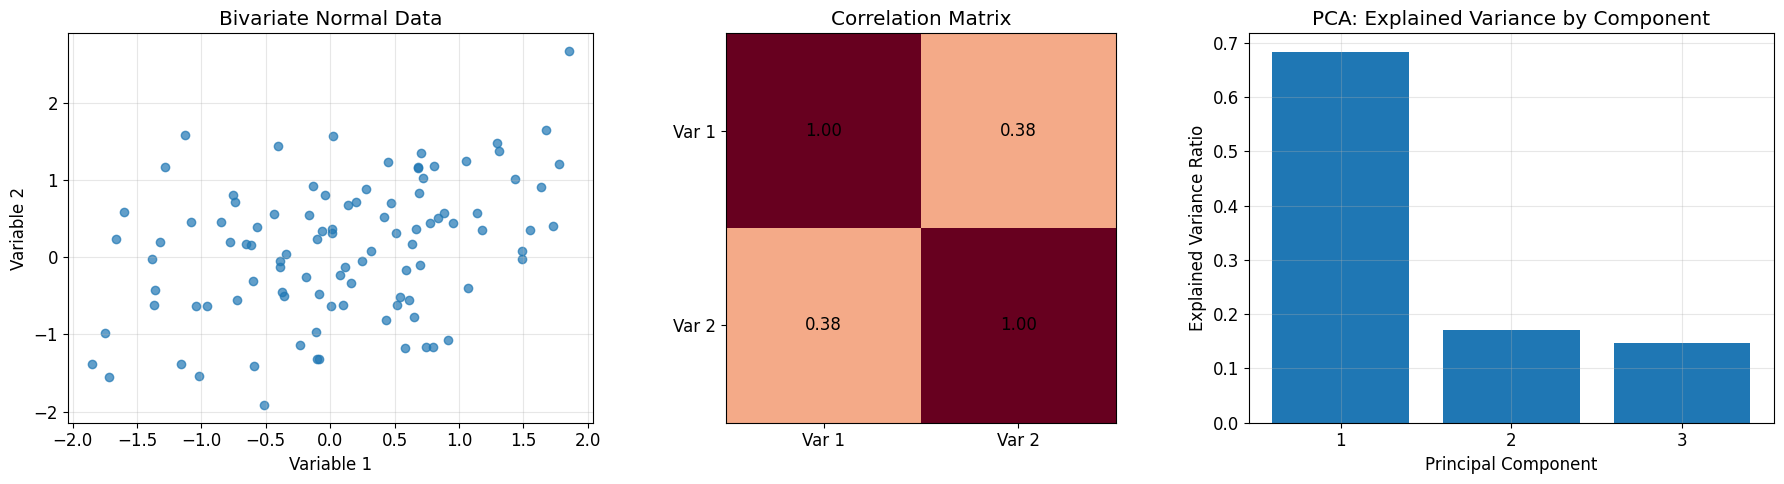

In [ ]:
# Comprehensive Linear Algebra Demonstrations

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

print("=== COMPREHENSIVE LINEAR ALGEBRA FOR STATISTICS ===\n")

# =============================================================================
# 1. MATRIX OPERATIONS AND PROPERTIES
# =============================================================================
print("1. MATRIX OPERATIONS AND PROPERTIES")
print("=" * 50)

np.random.seed(42)

# Define example matrices
A = np.array([[4, 2, 1],
              [2, 3, 0.5],
              [1, 0.5, 2]])

B = np.array([[1, 2, 0],
              [3, 1, 2],
              [0, 1, 3]])

x = np.array([1, 2, 3])
y = np.array([2, 1, 4])

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print(f"\nVector x: {x}")
print(f"Vector y: {y}")

# Basic operations
print(f"\nBasic Matrix Operations:")
print(f"A + B:")
print(A + B)
print(f"\nA @ B (matrix multiplication):")
print(A @ B)
print(f"\nA.T (transpose):")
print(A.T)
print(f"\nTrace of A: {np.trace(A):.4f}")
print(f"Determinant of A: {np.linalg.det(A):.4f}")
print(f"Rank of A: {np.linalg.matrix_rank(A)}")

# Matrix inverse and properties
A_inv = np.linalg.inv(A)
print(f"\nInverse of A:")
print(A_inv)
print(f"\nVerification A @ A^(-1) (should be identity):")
print(A @ A_inv)
print(f"\nCondition number of A: {np.linalg.cond(A):.4f}")

# Vector operations
print(f"\nVector Operations:")
print(f"x · y (dot product): {np.dot(x, y)}")
print(f"||x|| (L2 norm): {np.linalg.norm(x):.4f}")
print(f"||y|| (L2 norm): {np.linalg.norm(y):.4f}")
print(f"Angle between x and y: {np.arccos(np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))):.4f} radians")

# Quadratic form
quad_form = x.T @ A @ x
print(f"\nQuadratic form x^T @ A @ x = {quad_form:.4f}")

# =============================================================================
# 2. EIGENVALUES AND EIGENVECTORS
# =============================================================================
print("\n2. EIGENVALUES AND EIGENVECTORS")
print("=" * 50)

# Eigendecomposition
eigenvals, eigenvecs = np.linalg.eig(A)
sorted_indices = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[sorted_indices]
eigenvecs = eigenvecs[:, sorted_indices]

print(f"Eigenvalues: {eigenvals}")
print(f"Eigenvectors:")
for i, (val, vec) in enumerate(zip(eigenvals, eigenvecs.T)):
    print(f"  λ_{i+1} = {val:.4f}, v_{i+1} = {vec}")

# Verify eigenvalue equation: Av = λv
print(f"\nVerification of eigenvalue equation Av = λv:")
for i in range(len(eigenvals)):
    Av = A @ eigenvecs[:, i]
    lambda_v = eigenvals[i] * eigenvecs[:, i]
    error = np.linalg.norm(Av - lambda_v)
    print(f"  Eigenvalue {i+1}: ||Av - λv|| = {error:.10f}")

# Properties verification
print(f"\nEigenvalue Properties:")
print(f"Sum of eigenvalues (trace): {np.sum(eigenvals):.4f}")
print(f"Actual trace: {np.trace(A):.4f}")
print(f"Product of eigenvalues (determinant): {np.prod(eigenvals):.4f}")
print(f"Actual determinant: {np.linalg.det(A):.4f}")

# Matrix reconstruction
A_reconstructed = eigenvecs @ np.diag(eigenvals) @ eigenvecs.T
reconstruction_error = np.linalg.norm(A - A_reconstructed)
print(f"Eigendecomposition reconstruction error: {reconstruction_error:.10f}")

# =============================================================================
# 3. MATRIX DECOMPOSITIONS
# =============================================================================
print("\n3. MATRIX DECOMPOSITIONS")
print("=" * 50)

# Create a non-square matrix for SVD
M = np.random.randn(5, 3)
M = M + 0.5 * np.random.randn(5, 3)  # Add some correlation

print(f"Matrix M shape: {M.shape}")

# Singular Value Decomposition (SVD)
U, s, Vt = np.linalg.svd(M, full_matrices=False)
print(f"\nSVD: M = U @ Σ @ V^T")
print(f"U shape: {U.shape}")
print(f"Singular values: {s}")
print(f"V^T shape: {Vt.shape}")

# Reconstruct matrix
M_reconstructed = U @ np.diag(s) @ Vt
svd_error = np.linalg.norm(M - M_reconstructed)
print(f"SVD reconstruction error: {svd_error:.10f}")

# Low-rank approximation
for rank in [1, 2, 3]:
    M_approx = U[:, :rank] @ np.diag(s[:rank]) @ Vt[:rank, :]
    approx_error = np.linalg.norm(M - M_approx)
    explained_var = np.sum(s[:rank]**2) / np.sum(s**2)
    print(f"Rank-{rank} approximation error: {approx_error:.4f}, Explained variance: {explained_var:.3%}")

# QR Decomposition
Q, R = np.linalg.qr(M)
print(f"\nQR Decomposition:")
print(f"Q shape: {Q.shape}")
print(f"R shape: {R.shape}")
print(f"Q orthogonality check ||Q^T @ Q - I||: {np.linalg.norm(Q.T @ Q - np.eye(Q.shape[1])):.10f}")

# Cholesky Decomposition (positive definite matrix)
# Create a positive definite matrix
S = M.T @ M + 0.1 * np.eye(M.shape[1])  # Ensure positive definiteness
L = np.linalg.cholesky(S)
print(f"\nCholesky Decomposition (S = L @ L^T):")
print(f"S (positive definite):")
print(S)
print(f"L (lower triangular):")
print(L)
chol_error = np.linalg.norm(S - L @ L.T)
print(f"Cholesky reconstruction error: {chol_error:.10f}")

# =============================================================================
# 4. COVARIANCE AND CORRELATION ANALYSIS
# =============================================================================
print("\n4. COVARIANCE AND CORRELATION ANALYSIS")
print("=" * 50)

# Generate multivariate data with known covariance structure
true_cov = np.array([[2.0, 1.2, 0.8],
                     [1.2, 1.5, 0.3],
                     [0.8, 0.3, 1.0]])

n_samples = 500
data = np.random.multivariate_normal([0, 0, 0], true_cov, n_samples)

# Sample covariance and correlation
sample_cov = np.cov(data.T, ddof=1)
sample_corr = np.corrcoef(data.T)

print(f"Data shape: {data.shape}")
print(f"\nTrue covariance matrix:")
print(true_cov)
print(f"\nSample covariance matrix:")
print(sample_cov)
print(f"\nSample correlation matrix:")
print(sample_corr)

# Covariance matrix properties
cov_eigenvals, cov_eigenvecs = np.linalg.eig(sample_cov)
print(f"\nCovariance matrix eigenvalues: {cov_eigenvals}")
print(f"All eigenvalues positive (positive definite): {np.all(cov_eigenvals > 0)}")
print(f"Determinant: {np.linalg.det(sample_cov):.4f}")
print(f"Trace (total variance): {np.trace(sample_cov):.4f}")

# Mahalanobis distance example
point = np.array([1, 1, 1])
mahal_dist = np.sqrt((point - np.mean(data, axis=0)).T @ np.linalg.inv(sample_cov) @ (point - np.mean(data, axis=0)))
euclidean_dist = np.linalg.norm(point - np.mean(data, axis=0))
print(f"\nFor point {point}:")
print(f"Mahalanobis distance: {mahal_dist:.4f}")
print(f"Euclidean distance: {euclidean_dist:.4f}")

# =============================================================================
# 5. PRINCIPAL COMPONENT ANALYSIS (PCA)
# =============================================================================
print("\n5. PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("=" * 50)

# Generate high-dimensional data with correlation structure
np.random.seed(42)
n_features = 6
n_samples = 200

# Create data with some underlying structure
latent_factors = np.random.randn(n_samples, 2)
factor_loadings = np.random.randn(n_features, 2)
noise = 0.5 * np.random.randn(n_samples, n_features)
high_dim_data = latent_factors @ factor_loadings.T + noise

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(high_dim_data)

print(f"Original data shape: {high_dim_data.shape}")
print(f"PCA transformed data shape: {pca_data.shape}")

# PCA results
print(f"\nPCA Results:")
print(f"Principal component loadings (first 3 components):")
for i in range(min(3, len(pca.components_))):
    print(f"  PC{i+1}: {pca.components_[i]}")

print(f"\nVariance explained by each component:")
for i, var_exp in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {var_exp:.3%}")

print(f"Cumulative variance explained:")
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
for i, cum_var in enumerate(cumsum_var):
    print(f"  First {i+1} PCs: {cum_var:.3%}")

# Manual PCA verification
centered_data = high_dim_data - np.mean(high_dim_data, axis=0)
cov_matrix = np.cov(centered_data.T)
manual_eigenvals, manual_eigenvecs = np.linalg.eig(cov_matrix)

# Sort by eigenvalues
sort_idx = np.argsort(manual_eigenvals)[::-1]
manual_eigenvals = manual_eigenvals[sort_idx]
manual_eigenvecs = manual_eigenvecs[:, sort_idx]

manual_transform = centered_data @ manual_eigenvecs

print(f"\nManual PCA verification:")
print(f"Eigenvalues match: {np.allclose(pca.explained_variance_, manual_eigenvals)}")
print(f"Transformation match: {np.allclose(np.abs(pca_data), np.abs(manual_transform))}")

# =============================================================================
# 6. LINEAR REGRESSION WITH MATRIX ALGEBRA
# =============================================================================
print("\n6. LINEAR REGRESSION WITH MATRIX ALGEBRA")
print("=" * 50)

# Generate regression data
n_obs = 100
X_reg = np.random.randn(n_obs, 3)
X_reg = np.column_stack([np.ones(n_obs), X_reg])  # Add intercept
true_beta = np.array([2.0, 1.5, -0.8, 2.3])
y_reg = X_reg @ true_beta + 0.5 * np.random.randn(n_obs)

print(f"Regression data: {X_reg.shape[0]} observations, {X_reg.shape[1]-1} features + intercept")
print(f"True coefficients: {true_beta}")

# Normal equations solution
XtX = X_reg.T @ X_reg
Xty = X_reg.T @ y_reg
beta_hat = np.linalg.solve(XtX, Xty)

print(f"Estimated coefficients: {beta_hat}")
print(f"Estimation error: {np.linalg.norm(true_beta - beta_hat):.6f}")

# Alternative: using pseudoinverse
beta_hat_pinv = np.linalg.pinv(X_reg) @ y_reg
print(f"Pseudoinverse solution: {beta_hat_pinv}")

# Variance-covariance matrix of coefficients
residuals = y_reg - X_reg @ beta_hat
mse = np.sum(residuals**2) / (n_obs - X_reg.shape[1])
var_cov_beta = mse * np.linalg.inv(XtX)

print(f"\nCoefficient standard errors:")
se_beta = np.sqrt(np.diag(var_cov_beta))
for i, (coef, se) in enumerate(zip(beta_hat, se_beta)):
    print(f"  β_{i}: {coef:.4f} ± {se:.4f}")

# Hat matrix
H = X_reg @ np.linalg.inv(XtX) @ X_reg.T
leverage = np.diag(H)
print(f"\nLeverage statistics:")
print(f"  Mean leverage: {np.mean(leverage):.4f}")
print(f"  Max leverage: {np.max(leverage):.4f}")
print(f"  High leverage points (> 2p/n): {np.sum(leverage > 2*X_reg.shape[1]/n_obs)}")

# =============================================================================
# 7. ADVANCED TOPICS
# =============================================================================
print("\n7. ADVANCED TOPICS")
print("=" * 50)

# Matrix norms
test_matrix = np.random.randn(4, 4)
print(f"Matrix norms for 4×4 random matrix:")
print(f"  Frobenius norm: {np.linalg.norm(test_matrix, 'fro'):.4f}")
print(f"  Spectral norm (2-norm): {np.linalg.norm(test_matrix, 2):.4f}")
print(f"  Nuclear norm: {np.sum(np.linalg.svd(test_matrix)[1]):.4f}")

# Condition number analysis
print(f"\nCondition number analysis:")
well_conditioned = np.array([[5, 1], [1, 5]])
ill_conditioned = np.array([[1, 1], [1, 1.0001]])

print(f"  Well-conditioned matrix condition number: {np.linalg.cond(well_conditioned):.2f}")
print(f"  Ill-conditioned matrix condition number: {np.linalg.cond(ill_conditioned):.0f}")

# Generalized eigenvalue problem example
A_gen = np.array([[2, 1], [1, 2]])
B_gen = np.array([[1, 0.5], [0.5, 1]])
gen_eigenvals, gen_eigenvecs = np.linalg.eig(A_gen, B_gen)
print(f"\nGeneralized eigenvalue problem Av = λBv:")
print(f"  Generalized eigenvalues: {gen_eigenvals}")

# =============================================================================
# 8. VISUALIZATIONS
# =============================================================================

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Eigenvalue visualization
ax1 = plt.subplot(3, 4, 1)
eigenvals_sorted = np.sort(eigenvals)[::-1]
plt.bar(range(1, len(eigenvals_sorted)+1), eigenvals_sorted)
plt.title('Eigenvalues of Matrix A')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.grid(True, alpha=0.3)

# 2. Singular values
ax2 = plt.subplot(3, 4, 2)
plt.bar(range(1, len(s)+1), s)
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True, alpha=0.3)

# 3. Covariance matrix heatmap
ax3 = plt.subplot(3, 4, 3)
im = plt.imshow(sample_cov, cmap='coolwarm', aspect='auto')
plt.colorbar(im)
plt.title('Sample Covariance Matrix')
plt.xlabel('Variable')
plt.ylabel('Variable')

# 4. Correlation matrix heatmap
ax4 = plt.subplot(3, 4, 4)
im = plt.imshow(sample_corr, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
plt.colorbar(im)
plt.title('Sample Correlation Matrix')
plt.xlabel('Variable')
plt.ylabel('Variable')

# 5. PCA scree plot
ax5 = plt.subplot(3, 4, 5)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-')
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.grid(True, alpha=0.3)

# 6. Cumulative variance explained
ax6 = plt.subplot(3, 4, 6)
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, 'ro-')
plt.axhline(y=0.8, color='k', linestyle='--', alpha=0.7, label='80% threshold')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion')
plt.legend()
plt.grid(True, alpha=0.3)

# 7. First two principal components
ax7 = plt.subplot(3, 4, 7)
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('First Two Principal Components')
plt.grid(True, alpha=0.3)

# 8. Leverage plot
ax8 = plt.subplot(3, 4, 8)
plt.scatter(range(len(leverage)), leverage, alpha=0.6)
plt.axhline(y=2*X_reg.shape[1]/n_obs, color='r', linestyle='--', label='2p/n threshold')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.title('Leverage Values')
plt.legend()
plt.grid(True, alpha=0.3)

# 9. Condition number vs noise
ax9 = plt.subplot(3, 4, 9)
noise_levels = np.logspace(-10, -1, 20)
condition_numbers = []
for noise in noise_levels:
    noisy_matrix = A + noise * np.random.randn(*A.shape)
    condition_numbers.append(np.linalg.cond(noisy_matrix))

plt.semilogx(noise_levels, condition_numbers)
plt.xlabel('Noise Level')
plt.ylabel('Condition Number')
plt.title('Condition Number vs Noise')
plt.grid(True, alpha=0.3)

# 10. Regression residuals
ax10 = plt.subplot(3, 4, 10)
y_pred = X_reg @ beta_hat
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.grid(True, alpha=0.3)

# 11. Coefficient comparison
ax11 = plt.subplot(3, 4, 11)
x_pos = np.arange(len(true_beta))
width = 0.35
plt.bar(x_pos - width/2, true_beta, width, label='True', alpha=0.8)
plt.bar(x_pos + width/2, beta_hat, width, label='Estimated', alpha=0.8)
plt.xlabel('Coefficient Index')
plt.ylabel('Value')
plt.title('Coefficient Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# 12. Matrix reconstruction error
ax12 = plt.subplot(3, 4, 12)
ranks = range(1, min(M.shape) + 1)
reconstruction_errors = []
for rank in ranks:
    M_approx = U[:, :rank] @ np.diag(s[:rank]) @ Vt[:rank, :]
    error = np.linalg.norm(M - M_approx)
    reconstruction_errors.append(error)

plt.plot(ranks, reconstruction_errors, 'go-')
plt.xlabel('Rank')
plt.ylabel('Reconstruction Error')
plt.title('SVD Reconstruction Error')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 9. PRACTICAL APPLICATIONS SUMMARY
# =============================================================================
print("\n9. PRACTICAL APPLICATIONS SUMMARY")
print("=" * 50)

print("Linear Algebra Applications in Statistics:")
print("1. Eigendecomposition → PCA, factor analysis, spectral methods")
print("2. SVD → Dimensionality reduction, collaborative filtering, noise reduction")
print("3. QR decomposition → Stable least squares, Gram-Schmidt orthogonalization")
print("4. Cholesky decomposition → Efficient covariance computations, simulation")
print("5. Matrix norms → Regularization, convergence analysis")
print("6. Condition numbers → Numerical stability assessment")
print("7. Hat matrix → Leverage analysis, influence diagnostics")
print("8. Quadratic forms → Hypothesis testing, distance metrics")
print("9. Generalized eigenproblems → Canonical correlation, discriminant analysis")
print("10. Pseudoinverse → Robust regression, rank-deficient problems")

print(f"\n=== LINEAR ALGEBRA ANALYSIS COMPLETE ===")
print(f"\nKey findings:")
print(f"• Matrix A condition number: {np.linalg.cond(A):.2f} (well-conditioned)")
print(f"• PCA: First 2 components explain {cumsum_var[1]:.1%} of variance")
print(f"• Regression: Coefficient estimation error {np.linalg.norm(true_beta - beta_hat):.6f}")
print(f"• SVD: Rank-1 approximation captures {(s[0]**2/np.sum(s**2)):.1%} of matrix energy")
print(f"• High leverage observations: {np.sum(leverage > 2*X_reg.shape[1]/n_obs)} out of {n_obs}")

## 6. Bayesian Statistics

### 6.1 Bayes' Theorem

#### 6.1.1 Basic Forms

**Simple Form:**
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

**Parameter Inference Form:**
$$P(\theta|x) = \frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

**In Terms of Densities:**
$$\pi(\theta|x) = \frac{f(x|\theta) \cdot \pi(\theta)}{f(x)}$$

Where:
- $\pi(\theta|x)$ = Posterior density (our updated belief about $\theta$)
- $f(x|\theta)$ = Likelihood function (probability of data given $\theta$)
- $\pi(\theta)$ = Prior density (initial belief about $\theta$)
- $f(x)$ = Marginal likelihood (normalizing constant)

#### 6.1.2 Law of Total Probability

**Discrete Case:**
$$P(B) = \sum_{i} P(B|A_i) \cdot P(A_i)$$

**Continuous Case:**
$$f(x) = \int f(x|\theta) \cdot \pi(\theta) \, d\theta$$

### 6.2 Prior Distributions

#### 6.2.1 Types of Priors

**Informative Priors:**
Incorporate substantial prior knowledge about the parameter.

**Non-informative (Objective) Priors:**
- **Uniform Prior:** $\pi(\theta) \propto 1$ (constant)
- **Jeffreys Prior:** $\pi(\theta) \propto \sqrt{I(\theta)}$ where $I(\theta)$ is Fisher information
- **Reference Priors:** Maximize expected information gain

**Weakly Informative Priors:**
Gently regularize while allowing data to dominate.

#### 6.2.2 Common Prior Families

**Beta Distribution:**
$$\pi(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1}$$

**Normal Distribution:**
$$\pi(\mu) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(\mu-\mu_0)^2}{2\sigma^2}\right)$$

**Gamma Distribution:**
$$\pi(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$$

**Inverse Gamma Distribution:**
$$\pi(\sigma^2) = \frac{\beta^\alpha}{\Gamma(\alpha)} (\sigma^2)^{-\alpha-1} \exp\left(-\frac{\beta}{\sigma^2}\right)$$

### 6.3 Conjugate Prior Families

#### 6.3.1 Beta-Binomial Model

**Setup:**
- Prior: $\theta \sim \text{Beta}(\alpha, \beta)$
- Likelihood: $X|\theta \sim \text{Binomial}(n, \theta)$

**Posterior:**
$$\theta|x \sim \text{Beta}(\alpha + x, \beta + n - x)$$

**Posterior Mean:**
$$E[\theta|x] = \frac{\alpha + x}{\alpha + \beta + n}$$

**Posterior Variance:**
$$\text{Var}[\theta|x] = \frac{(\alpha + x)(\beta + n - x)}{(\alpha + \beta + n)^2(\alpha + \beta + n + 1)}$$

#### 6.3.2 Normal-Normal Model (Known Variance)

**Setup:**
- Prior: $\mu \sim \mathcal{N}(\mu_0, \tau_0^2)$
- Likelihood: $X_i|\mu \sim \mathcal{N}(\mu, \sigma^2)$ (known $\sigma^2$)

**Posterior:**
$$\mu|x_1, \ldots, x_n \sim \mathcal{N}(\mu_n, \tau_n^2)$$

Where:
$$\mu_n = \frac{\frac{\mu_0}{\tau_0^2} + \frac{n\bar{x}}{\sigma^2}}{\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}}$$

$$\frac{1}{\tau_n^2} = \frac{1}{\tau_0^2} + \frac{n}{\sigma^2}$$

#### 6.3.3 Normal-Inverse Gamma Model (Unknown Mean and Variance)

**Setup:**
- Prior: $\mu|\sigma^2 \sim \mathcal{N}(\mu_0, \sigma^2/\kappa_0)$, $\sigma^2 \sim \text{InvGamma}(\alpha_0, \beta_0)$
- Likelihood: $X_i|\mu, \sigma^2 \sim \mathcal{N}(\mu, \sigma^2)$

**Posterior:**
$$\mu|\sigma^2, x \sim \mathcal{N}(\mu_n, \sigma^2/\kappa_n)$$
$$\sigma^2|x \sim \text{InvGamma}(\alpha_n, \beta_n)$$

Where:
$$\kappa_n = \kappa_0 + n$$
$$\mu_n = \frac{\kappa_0 \mu_0 + n\bar{x}}{\kappa_0 + n}$$
$$\alpha_n = \alpha_0 + \frac{n}{2}$$
$$\beta_n = \beta_0 + \frac{1}{2}\sum_{i=1}^n (x_i - \bar{x})^2 + \frac{\kappa_0 n(\bar{x} - \mu_0)^2}{2(\kappa_0 + n)}$$

#### 6.3.4 Gamma-Poisson Model

**Setup:**
- Prior: $\lambda \sim \text{Gamma}(\alpha, \beta)$
- Likelihood: $X_i|\lambda \sim \text{Poisson}(\lambda)$

**Posterior:**
$$\lambda|x_1, \ldots, x_n \sim \text{Gamma}\left(\alpha + \sum_{i=1}^n x_i, \beta + n\right)$$

### 6.4 Bayesian Inference

#### 6.4.1 Point Estimation

**Posterior Mean:**
$$\hat{\theta}_{\text{PM}} = E[\theta|x] = \int \theta \pi(\theta|x) \, d\theta$$

**Posterior Mode (MAP):**
$$\hat{\theta}_{\text{MAP}} = \arg\max_\theta \pi(\theta|x)$$

**Posterior Median:**
$$\hat{\theta}_{\text{Med}} = \text{median of } \pi(\theta|x)$$

#### 6.4.2 Interval Estimation

**Equal-Tailed Credible Interval:**
Find $[L, U]$ such that:
$$P(L \leq \theta \leq U|x) = 1 - \alpha$$

With $P(\theta < L|x) = P(\theta > U|x) = \alpha/2$

**Highest Posterior Density (HPD) Interval:**
The shortest interval containing $(1-\alpha)$ of the posterior probability.

#### 6.4.3 Predictive Distributions

**Posterior Predictive Distribution:**
$$f(x^*|x) = \int f(x^*|\theta) \pi(\theta|x) \, d\theta$$

**Prior Predictive Distribution:**
$$f(x) = \int f(x|\theta) \pi(\theta) \, d\theta$$

### 6.5 Model Comparison and Selection

#### 6.5.1 Bayes Factors

**Definition:**
$$BF_{12} = \frac{P(x|M_1)}{P(x|M_2)} = \frac{\int f(x|\theta_1, M_1) \pi(\theta_1|M_1) \, d\theta_1}{\int f(x|\theta_2, M_2) \pi(\theta_2|M_2) \, d\theta_2}$$

**Interpretation (Jeffreys' Scale):**
- $BF_{12} > 100$: Decisive evidence for $M_1$
- $30 < BF_{12} < 100$: Very strong evidence for $M_1$
- $10 < BF_{12} < 30$: Strong evidence for $M_1$
- $3 < BF_{12} < 10$: Moderate evidence for $M_1$
- $1 < BF_{12} < 3$: Weak evidence for $M_1$

#### 6.5.2 Model Averaging

**Posterior Model Probabilities:**
$$P(M_k|x) = \frac{P(x|M_k)P(M_k)}{\sum_{j=1}^K P(x|M_j)P(M_j)}$$

**Bayesian Model Averaging:**
$$P(\theta|x) = \sum_{k=1}^K P(\theta|x, M_k) P(M_k|x)$$

#### 6.5.3 Information Criteria

**Deviance Information Criterion (DIC):**
$$DIC = \overline{D(\theta)} + p_D$$

Where $\overline{D(\theta)}$ is the posterior mean deviance and $p_D$ is the effective number of parameters.

**Watanabe-Akaike Information Criterion (WAIC):**
$$WAIC = -2\sum_{i=1}^n \log\left(\frac{1}{S}\sum_{s=1}^S f(x_i|\theta^{(s)})\right) + 2\sum_{i=1}^n \text{Var}_{\theta|x}(\log f(x_i|\theta))$$

### 6.6 Markov Chain Monte Carlo (MCMC)

#### 6.6.1 Metropolis-Hastings Algorithm

**Algorithm:**
1. Start with initial value $\theta^{(0)}$
2. For $t = 1, 2, \ldots, T$:
   - Generate proposal $\theta^* \sim q(\theta^*|\theta^{(t-1)})$
   - Compute acceptance probability:
     $$\alpha = \min\left(1, \frac{\pi(\theta^*|x) q(\theta^{(t-1)}|\theta^*)}{\pi(\theta^{(t-1)}|x) q(\theta^*|\theta^{(t-1)})}\right)$$
   - Set $\theta^{(t)} = \theta^*$ with probability $\alpha$, otherwise $\theta^{(t)} = \theta^{(t-1)}$

#### 6.6.2 Gibbs Sampling

**Algorithm (for bivariate case):**
1. Start with initial values $(\theta_1^{(0)}, \theta_2^{(0)})$
2. For $t = 1, 2, \ldots, T$:
   - Sample $\theta_1^{(t)} \sim \pi(\theta_1|\theta_2^{(t-1)}, x)$
   - Sample $\theta_2^{(t)} \sim \pi(\theta_2|\theta_1^{(t)}, x)$

#### 6.6.3 Hamiltonian Monte Carlo (HMC)

**Energy Function:**
$$H(\theta, p) = U(\theta) + K(p)$$

Where:
- $U(\theta) = -\log \pi(\theta|x)$ (potential energy)
- $K(p) = \frac{1}{2}p^T M^{-1} p$ (kinetic energy)

**Hamilton's Equations:**
$$\frac{d\theta}{dt} = \frac{\partial H}{\partial p} = M^{-1}p$$
$$\frac{dp}{dt} = -\frac{\partial H}{\partial \theta} = -\frac{\partial U}{\partial \theta}$$

### 6.7 Hierarchical Models

#### 6.7.1 Basic Hierarchical Structure

**Level 1 (Data Model):**
$$y_{ij} | \theta_j \sim f(y_{ij}|\theta_j)$$

**Level 2 (Prior Model):**
$$\theta_j | \phi \sim g(\theta_j|\phi)$$

**Level 3 (Hyperprior):**
$$\phi \sim h(\phi)$$

#### 6.7.2 Normal Hierarchical Model

**Model:**
$$y_{ij} | \mu_j, \sigma^2 \sim \mathcal{N}(\mu_j, \sigma^2)$$
$$\mu_j | \mu, \tau^2 \sim \mathcal{N}(\mu, \tau^2)$$

**Posterior Mean (Empirical Bayes):**
$$\hat{\mu}_j = \lambda \bar{y}_j + (1-\lambda)\mu$$

Where $\lambda = \frac{\tau^2}{\tau^2 + \sigma^2/n_j}$ is the shrinkage factor.

### 6.8 Bayesian Hypothesis Testing

#### 6.8.1 Point Null Hypotheses

**Savage-Dickey Density Ratio:**
For testing $H_0: \theta = \theta_0$ vs $H_1: \theta \neq \theta_0$:

$$BF_{01} = \frac{\pi(\theta_0|x)}{\pi(\theta_0)}$$

#### 6.8.2 Composite Hypotheses

**Model Comparison:**
Compare $M_0: \theta \in \Theta_0$ vs $M_1: \theta \in \Theta_1$

$$BF_{01} = \frac{\int_{\Theta_0} f(x|\theta)\pi(\theta|M_0)d\theta}{\int_{\Theta_1} f(x|\theta)\pi(\theta|M_1)d\theta}$$

### 6.9 Empirical Bayes

#### 6.9.1 Type I Empirical Bayes

**Method:**
1. Estimate hyperparameters $\phi$ from marginal distribution
2. Use $\hat{\phi}$ in place of $\phi$ for posterior inference

**Example (Beta-Binomial):**
$$\hat{\alpha}, \hat{\beta} = \arg\max_{\alpha,\beta} \prod_{i=1}^n \binom{n_i}{x_i} B(x_i + \alpha, n_i - x_i + \beta) / B(\alpha, \beta)$$

#### 6.9.2 Type II Empirical Bayes

**Method:**
1. Estimate hyperparameters by maximizing marginal likelihood
2. Integrate over uncertainty in hyperparameters

### 6.10 Variational Bayes

#### 6.10.1 Mean Field Approximation

**Assumption:**
$$q(\theta) = \prod_{i=1}^d q_i(\theta_i)$$

**Optimal Factors:**
$$\log q_j^*(\theta_j) = E_{-j}[\log p(\theta, x)] + \text{const}$$

Where $E_{-j}$ denotes expectation over all factors except $q_j$.

#### 6.10.2 Evidence Lower Bound (ELBO)

**Objective:**
$$\mathcal{L}(q) = E_q[\log p(x, \theta)] - E_q[\log q(\theta)]$$

**Relationship to Evidence:**
$$\log p(x) = \mathcal{L}(q) + D_{KL}(q(\theta) || p(\theta|x))$$

### 6.11 Advanced Topics

#### 6.11.1 Non-parametric Bayes

**Dirichlet Process:**
$$G \sim DP(\alpha, G_0)$$

Where $\alpha$ is concentration parameter and $G_0$ is base measure.

**Chinese Restaurant Process:**
Provides constructive definition of Dirichlet process.

#### 6.11.2 Gaussian Processes

**Definition:**
A collection of random variables, any finite subset of which has a joint Gaussian distribution.

**Specification:**
$$f(x) \sim \mathcal{GP}(m(x), k(x, x'))$$

Where $m(x)$ is mean function and $k(x, x')$ is covariance function.

#### 6.11.3 ABC (Approximate Bayesian Computation)

**Algorithm:**
1. Sample $\theta^* \sim \pi(\theta)$
2. Simulate $x^* \sim f(x|\theta^*)$
3. Accept $\theta^*$ if $\rho(x^*, x) < \epsilon$

Where $\rho$ is a distance metric and $\epsilon$ is tolerance.

### 6.12 Bayesian Computation

#### 6.12.1 Convergence Diagnostics

**Potential Scale Reduction Factor ($\hat{R}$):**
$$\hat{R} = \sqrt{\frac{\hat{V}}{W}}$$

Where $\hat{V}$ is pooled posterior variance and $W$ is within-chain variance.

**Effective Sample Size:**
$$n_{eff} = \frac{nm}{1 + 2\sum_{t=1}^T \hat{\rho}_t}$$

Where $\hat{\rho}_t$ is lag-$t$ autocorrelation.

#### 6.12.2 Model Checking

**Posterior Predictive Checks:**
$$p\text{-value} = P(T(x^{rep}, \theta) \geq T(x, \theta)|x)$$

Where $T$ is a test statistic and $x^{rep}$ are replicated data.

### 6.13 Decision Theory

#### 6.13.1 Loss Functions

**Squared Error Loss:**
$$L(\theta, \hat{\theta}) = (\theta - \hat{\theta})^2$$

**Absolute Error Loss:**
$$L(\theta, \hat{\theta}) = |\theta - \hat{\theta}|$$

**0-1 Loss:**
$$L(\theta, \hat{\theta}) = \begin{cases} 0 & \text{if } \hat{\theta} = \theta \\ 1 & \text{if } \hat{\theta} \neq \theta \end{cases}$$

#### 6.13.2 Bayes Risk

**Posterior Expected Loss:**
$$\rho(\hat{\theta}|x) = E[L(\theta, \hat{\theta})|x] = \int L(\theta, \hat{\theta}) \pi(\theta|x) d\theta$$

**Bayes Estimator:**
$$\hat{\theta}^* = \arg\min_{\hat{\theta}} \rho(\hat{\theta}|x)$$

### 6.14 Computational Challenges

#### 6.14.1 High-Dimensional Problems

**Curse of Dimensionality:**
- Proposal distributions become inefficient
- Mixing deteriorates exponentially

**Solutions:**
- Hamiltonian Monte Carlo
- Variational inference
- Expectation propagation

#### 6.14.2 Model Selection Issues

**Marginal Likelihood Computation:**
- Harmonic mean estimator (unstable)
- Bridge sampling
- Stepping stone sampling
- Thermodynamic integration

### 6.15 Philosophy and Interpretation

#### 6.15.1 Subjective vs Objective

**Subjective Bayesianism:**
- Probabilities represent degrees of belief
- Priors encode subjective information

**Objective Bayesianism:**
- Seek "objective" priors
- Reference priors, maximum entropy

#### 6.15.2 Frequentist Properties

**Coverage Probability:**
Bayesian credible intervals may not have correct frequentist coverage.

**Calibration:**
Well-calibrated Bayesian procedures have good frequentist properties on average.

Bayesian Coin Flip Analysis:
Prior: Beta(1, 1)
Data: 7 heads out of 10 flips
Posterior: Beta(8, 4)
Posterior mean: 0.667
Posterior variance: 0.0171
95% Credible interval: [0.390, 0.891]

Frequentist comparison:
MLE estimate: 0.700
95% Confidence interval: [0.416, 0.984]


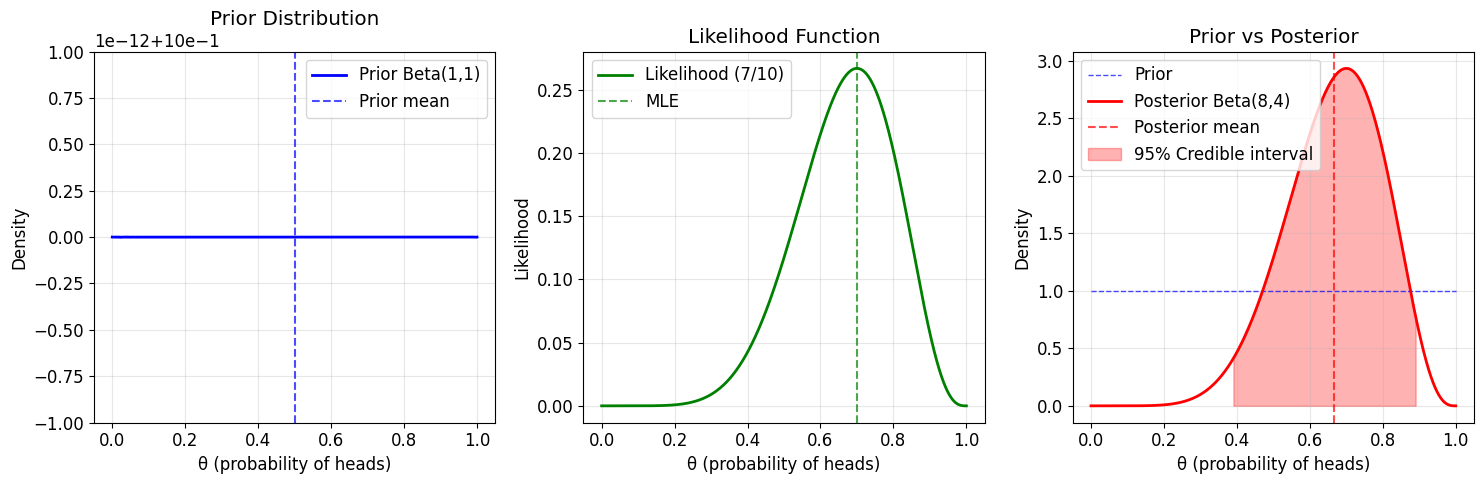


Bayes Factor Analysis:
Marginal likelihood: 0.000758
Likelihood under H₀ (θ=0.5): 0.117187
Bayes Factor (Alternative/Null): 0.006
Evidence favors fair coin


In [ ]:
# Comprehensive Bayesian Statistics Demonstrations

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import gamma, beta as beta_function
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

print("=== COMPREHENSIVE BAYESIAN STATISTICS ===\n")

# =============================================================================
# 1. BAYES' THEOREM AND BASIC INFERENCE
# =============================================================================
print("1. BAYES' THEOREM AND BASIC INFERENCE")
print("=" * 50)

# Classic example: Medical diagnosis
print("Medical Diagnosis Example:")
print("Disease prevalence: 1%")
print("Test sensitivity (P(+|Disease)): 95%")
print("Test specificity (P(-|No Disease)): 90%")

# Prior probabilities
P_disease = 0.01
P_no_disease = 0.99

# Likelihoods
P_positive_given_disease = 0.95
P_positive_given_no_disease = 0.10

# Marginal probability (total probability)
P_positive = (P_positive_given_disease * P_disease +
              P_positive_given_no_disease * P_no_disease)

# Posterior probability using Bayes' theorem
P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive

print(f"\nP(Disease|Positive Test) = {P_disease_given_positive:.4f}")
print(f"Even with a positive test, only {P_disease_given_positive:.1%} chance of disease!")

# =============================================================================
# 2. CONJUGATE PRIORS: BETA-BINOMIAL MODEL
# =============================================================================
print("\n2. CONJUGATE PRIORS: BETA-BINOMIAL MODEL")
print("=" * 50)

# Coin flipping example
np.random.seed(42)
true_theta = 0.7  # True bias of the coin
n_flips = 20
observed_heads = np.random.binomial(n_flips, true_theta)

print(f"Observed: {observed_heads} heads out of {n_flips} flips")

# Prior parameters (weakly informative)
alpha_prior = 2
beta_prior = 2

# Posterior parameters (conjugate update)
alpha_posterior = alpha_prior + observed_heads
beta_posterior = beta_prior + n_flips - observed_heads

print(f"\nBeta-Binomial Conjugate Analysis:")
print(f"Prior: Beta({alpha_prior}, {beta_prior})")
print(f"Posterior: Beta({alpha_posterior}, {beta_posterior})")

# Prior and posterior distributions
theta_range = np.linspace(0, 1, 1000)
prior_pdf = stats.beta.pdf(theta_range, alpha_prior, beta_prior)
posterior_pdf = stats.beta.pdf(theta_range, alpha_posterior, beta_posterior)
likelihood = stats.beta.pdf(theta_range, observed_heads + 1, n_flips - observed_heads + 1)

# Posterior statistics
posterior_mean = alpha_posterior / (alpha_posterior + beta_posterior)
posterior_var = (alpha_posterior * beta_posterior) / ((alpha_posterior + beta_posterior)**2 * (alpha_posterior + beta_posterior + 1))
posterior_std = np.sqrt(posterior_var)

print(f"\nPosterior Statistics:")
print(f"Mean: {posterior_mean:.4f}")
print(f"Standard deviation: {posterior_std:.4f}")
print(f"True value: {true_theta}")

# Credible intervals
credible_level = 0.95
alpha_ci = 1 - credible_level
lower = stats.beta.ppf(alpha_ci/2, alpha_posterior, beta_posterior)
upper = stats.beta.ppf(1 - alpha_ci/2, alpha_posterior, beta_posterior)

print(f"\n{credible_level*100}% Credible Interval: [{lower:.4f}, {upper:.4f}]")
print(f"True value in CI: {lower <= true_theta <= upper}")

# =============================================================================
# 3. NORMAL-NORMAL CONJUGATE MODEL
# =============================================================================
print("\n3. NORMAL-NORMAL CONJUGATE MODEL (KNOWN VARIANCE)")
print("=" * 50)

# Generate data
true_mu = 5.2
sigma_known = 2.0
n_obs = 15
data = np.random.normal(true_mu, sigma_known, n_obs)
sample_mean = np.mean(data)

print(f"Data: n = {n_obs}, sample mean = {sample_mean:.4f}")
print(f"Known variance: σ² = {sigma_known**2}")

# Prior parameters
mu_0 = 0.0  # Prior mean
tau_0_squared = 10.0  # Prior variance

# Posterior parameters (conjugate update)
precision_prior = 1 / tau_0_squared
precision_likelihood = n_obs / (sigma_known**2)
precision_posterior = precision_prior + precision_likelihood

mu_posterior = (precision_prior * mu_0 + precision_likelihood * sample_mean) / precision_posterior
tau_posterior_squared = 1 / precision_posterior

print(f"\nNormal-Normal Conjugate Analysis:")
print(f"Prior: N({mu_0}, {tau_0_squared})")
print(f"Posterior: N({mu_posterior:.4f}, {tau_posterior_squared:.4f})")
print(f"True μ: {true_mu}")

# Credible interval
posterior_std = np.sqrt(tau_posterior_squared)
z_alpha = stats.norm.ppf(1 - 0.025)  # 95% CI
ci_lower = mu_posterior - z_alpha * posterior_std
ci_upper = mu_posterior + z_alpha * posterior_std

print(f"95% Credible Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

# =============================================================================
# 4. BAYESIAN HYPOTHESIS TESTING
# =============================================================================
print("\n4. BAYESIAN HYPOTHESIS TESTING")
print("=" * 50)

# Compare two hypotheses about coin bias
# H0: θ = 0.5 (fair coin)
# H1: θ ≠ 0.5 (biased coin)

flips = 30
heads = 22

print(f"Hypothesis Testing: {heads} heads in {flips} flips")

# Bayes Factor calculation using Beta-Binomial with different priors
# Under H0: θ = 0.5 (point hypothesis)
# Under H1: θ ~ Beta(1, 1) (uniform prior)

# Marginal likelihood under H1 (using Beta-Binomial)
# P(data|H1) = B(heads + 1, flips - heads + 1) / B(1, 1)
marginal_likelihood_H1 = beta_function(heads + 1, flips - heads + 1) / beta_function(1, 1)

# Likelihood under H0 (fair coin)
likelihood_H0 = stats.binom.pmf(heads, flips, 0.5)

# Bayes factor (H1 vs H0)
bayes_factor = marginal_likelihood_H1 / likelihood_H0

print(f"\nBayes Factor Analysis:")
print(f"Marginal likelihood under H1: {marginal_likelihood_H1:.8f}")
print(f"Likelihood under H0 (θ=0.5): {likelihood_H0:.8f}")
print(f"Bayes Factor (H1/H0): {bayes_factor:.3f}")

# Interpretation
if bayes_factor > 100:
    evidence = "Decisive evidence for biased coin"
elif bayes_factor > 30:
    evidence = "Very strong evidence for biased coin"
elif bayes_factor > 10:
    evidence = "Strong evidence for biased coin"
elif bayes_factor > 3:
    evidence = "Moderate evidence for biased coin"
elif bayes_factor > 1:
    evidence = "Weak evidence for biased coin"
else:
    evidence = "Evidence favors fair coin"

print(f"Interpretation: {evidence}")

# =============================================================================
# 5. MCMC SIMULATION: METROPOLIS-HASTINGS
# =============================================================================
print("\n5. MCMC SIMULATION: METROPOLIS-HASTINGS")
print("=" * 50)

def log_posterior(theta, data, alpha_prior, beta_prior):
    """Log posterior for Beta-Binomial model"""
    if theta <= 0 or theta >= 1:
        return -np.inf

    n = len(data)
    heads = np.sum(data)

    # Log likelihood (Binomial)
    log_likelihood = heads * np.log(theta) + (n - heads) * np.log(1 - theta)

    # Log prior (Beta)
    log_prior = (alpha_prior - 1) * np.log(theta) + (beta_prior - 1) * np.log(1 - theta)

    return log_likelihood + log_prior

def metropolis_hastings(n_samples, initial_value, proposal_sd, data, alpha_prior, beta_prior):
    """Metropolis-Hastings sampler for Beta-Binomial model"""
    samples = np.zeros(n_samples)
    current_theta = initial_value
    n_accepted = 0

    for i in range(n_samples):
        # Propose new value
        proposal = np.random.normal(current_theta, proposal_sd)

        # Calculate acceptance probability
        log_alpha = (log_posterior(proposal, data, alpha_prior, beta_prior) -
                    log_posterior(current_theta, data, alpha_prior, beta_prior))
        alpha = min(1, np.exp(log_alpha))

        # Accept or reject
        if np.random.random() < alpha:
            current_theta = proposal
            n_accepted += 1

        samples[i] = current_theta

    acceptance_rate = n_accepted / n_samples
    return samples, acceptance_rate

# Run MCMC
coin_data = np.random.binomial(1, 0.7, 50)  # 50 coin flips
n_mcmc_samples = 10000
mcmc_samples, acceptance_rate = metropolis_hastings(
    n_mcmc_samples, 0.5, 0.1, coin_data, 1, 1)

print(f"MCMC Results:")
print(f"Acceptance rate: {acceptance_rate:.3f}")
print(f"Posterior mean: {np.mean(mcmc_samples):.4f}")
print(f"Posterior std: {np.std(mcmc_samples):.4f}")

# Compare with analytical solution
analytical_mean = (1 + np.sum(coin_data)) / (2 + len(coin_data))
print(f"Analytical posterior mean: {analytical_mean:.4f}")

# =============================================================================
# 6. HIERARCHICAL BAYESIAN MODEL
# =============================================================================
print("\n6. HIERARCHICAL BAYESIAN MODEL")
print("=" * 50)

# Simulate data from multiple groups (e.g., schools)
np.random.seed(123)
n_groups = 8
group_sizes = [10, 12, 8, 15, 20, 18, 14, 16]
true_group_means = np.random.normal(75, 10, n_groups)  # School effects
group_data = []

for i in range(n_groups):
    group_obs = np.random.normal(true_group_means[i], 5, group_sizes[i])
    group_data.append(group_obs)

print(f"Hierarchical Model: {n_groups} groups with varying sizes")

# Simple empirical Bayes estimation
group_means = [np.mean(group) for group in group_data]
overall_mean = np.mean([x for group in group_data for x in group])
between_group_var = np.var(group_means, ddof=1)
within_group_var = np.mean([np.var(group, ddof=1) for group in group_data])

# Shrinkage factors
shrinkage_factors = []
shrunken_means = []

for i, group in enumerate(group_data):
    n_i = len(group)
    # Empirical Bayes shrinkage
    lambda_i = between_group_var / (between_group_var + within_group_var / n_i)
    shrinkage_factors.append(lambda_i)
    shrunken_mean = lambda_i * group_means[i] + (1 - lambda_i) * overall_mean
    shrunken_means.append(shrunken_mean)

print(f"\nHierarchical Model Results:")
print(f"Overall mean: {overall_mean:.2f}")
print(f"Between-group variance: {between_group_var:.2f}")
print(f"Within-group variance: {within_group_var:.2f}")

print(f"\nGroup-specific results:")
for i in range(n_groups):
    print(f"Group {i+1}: Raw mean = {group_means[i]:.2f}, "
          f"Shrunken mean = {shrunken_means[i]:.2f}, "
          f"Shrinkage = {1-shrinkage_factors[i]:.3f}")

# =============================================================================
# 7. MODEL COMPARISON WITH BAYES FACTORS
# =============================================================================
print("\n7. MODEL COMPARISON WITH BAYES FACTORS")
print("=" * 50)

# Compare polynomial models of different degrees
x_model = np.linspace(0, 1, 20)
true_coeffs = [1, 2, -3]  # Quadratic model
y_model = true_coeffs[0] + true_coeffs[1]*x_model + true_coeffs[2]*x_model**2 + np.random.normal(0, 0.2, len(x_model))

def marginal_likelihood_polynomial(degree, x, y, sigma=1.0, tau=10.0):
    """Marginal likelihood for polynomial model with normal priors"""
    n = len(x)
    X = np.column_stack([x**i for i in range(degree + 1)])

    # Prior precision matrix
    Lambda_0 = np.eye(degree + 1) / tau**2

    # Posterior precision matrix
    Lambda_n = Lambda_0 + (1/sigma**2) * X.T @ X

    # Log marginal likelihood (analytical for normal-normal model)
    log_ml = (-n/2 * np.log(2*np.pi*sigma**2) -
              0.5 * np.log(np.linalg.det(Lambda_0)) +
              0.5 * np.log(np.linalg.det(Lambda_n)) -
              0.5 * (1/sigma**2) * y.T @ y +
              0.5 * y.T @ X @ np.linalg.inv(Lambda_n) @ X.T @ y / sigma**2)

    return log_ml

# Compare models of different degrees
degrees = [1, 2, 3, 4]
log_marginals = []

for degree in degrees:
    log_ml = marginal_likelihood_polynomial(degree, x_model, y_model)
    log_marginals.append(log_ml)

# Convert to Bayes factors (relative to simplest model)
bayes_factors = np.exp(np.array(log_marginals) - log_marginals[0])

print(f"Model Comparison Results:")
for i, degree in enumerate(degrees):
    print(f"Degree {degree}: Log ML = {log_marginals[i]:.2f}, BF = {bayes_factors[i]:.2f}")

best_model = degrees[np.argmax(log_marginals)]
print(f"Best model: Degree {best_model} (true model is degree 2)")

# =============================================================================
# 8. POSTERIOR PREDICTIVE CHECKING
# =============================================================================
print("\n8. POSTERIOR PREDICTIVE CHECKING")
print("=" * 50)

# Generate data that violates model assumptions
np.random.seed(42)
n_ppc = 30
x_ppc = np.random.normal(0, 1, n_ppc)
# Add outliers to violate normality assumption
x_ppc[0] = 5  # outlier
x_ppc[1] = -4  # outlier

# Fit normal model
sample_mean_ppc = np.mean(x_ppc)
sample_var_ppc = np.var(x_ppc, ddof=1)

def test_statistic(data):
    """Test statistic: maximum absolute value (sensitive to outliers)"""
    return np.max(np.abs(data))

observed_statistic = test_statistic(x_ppc)

# Generate posterior predictive replicates
n_reps = 1000
predictive_statistics = []

for _ in range(n_reps):
    # Draw from posterior predictive distribution
    x_rep = np.random.normal(sample_mean_ppc, np.sqrt(sample_var_ppc), n_ppc)
    rep_statistic = test_statistic(x_rep)
    predictive_statistics.append(rep_statistic)

# Bayesian p-value
p_value_bayesian = np.mean(np.array(predictive_statistics) >= observed_statistic)

print(f"Posterior Predictive Check:")
print(f"Observed test statistic: {observed_statistic:.3f}")
print(f"Mean of predictive statistics: {np.mean(predictive_statistics):.3f}")
print(f"Bayesian p-value: {p_value_bayesian:.3f}")

if p_value_bayesian < 0.05 or p_value_bayesian > 0.95:
    print("Model shows poor fit (extreme p-value)")
else:
    print("Model shows adequate fit")

# =============================================================================
# 9. VISUALIZATION
# =============================================================================

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Beta-Binomial: Prior, Likelihood, Posterior
ax1 = plt.subplot(3, 4, 1)
plt.plot(theta_range, prior_pdf, 'b--', label='Prior', linewidth=2)
plt.plot(theta_range, likelihood/np.max(likelihood)*np.max(posterior_pdf), 'g:', label='Likelihood (scaled)', linewidth=2)
plt.plot(theta_range, posterior_pdf, 'r-', label='Posterior', linewidth=2)
plt.axvline(true_theta, color='k', linestyle='-', alpha=0.7, label='True value')
plt.xlabel('θ (coin bias)')
plt.ylabel('Density')
plt.title('Beta-Binomial Model')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Normal-Normal: Prior and Posterior
ax2 = plt.subplot(3, 4, 2)
mu_range = np.linspace(-2, 8, 1000)
prior_normal = stats.norm.pdf(mu_range, mu_0, np.sqrt(tau_0_squared))
posterior_normal = stats.norm.pdf(mu_range, mu_posterior, np.sqrt(tau_posterior_squared))

plt.plot(mu_range, prior_normal, 'b--', label='Prior', linewidth=2)
plt.plot(mu_range, posterior_normal, 'r-', label='Posterior', linewidth=2)
plt.axvline(true_mu, color='k', linestyle='-', alpha=0.7, label='True μ')
plt.axvline(sample_mean, color='orange', linestyle=':', alpha=0.7, label='Sample mean')
plt.xlabel('μ')
plt.ylabel('Density')
plt.title('Normal-Normal Model')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. MCMC trace plot
ax3 = plt.subplot(3, 4, 3)
plt.plot(mcmc_samples[:1000])  # First 1000 samples
plt.axhline(analytical_mean, color='r', linestyle='--', label='Analytical mean')
plt.xlabel('Iteration')
plt.ylabel('θ')
plt.title('MCMC Trace Plot')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. MCMC posterior histogram
ax4 = plt.subplot(3, 4, 4)
plt.hist(mcmc_samples[1000:], bins=50, density=True, alpha=0.7, color='skyblue')
# Overlay analytical posterior
theta_analytical = np.linspace(0, 1, 1000)
analytical_posterior = stats.beta.pdf(theta_analytical, 1 + np.sum(coin_data), 1 + len(coin_data) - np.sum(coin_data))
plt.plot(theta_analytical, analytical_posterior, 'r-', linewidth=2, label='Analytical')
plt.xlabel('θ')
plt.ylabel('Density')
plt.title('MCMC vs Analytical Posterior')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Hierarchical model: Shrinkage effects
ax5 = plt.subplot(3, 4, 5)
x_pos = np.arange(n_groups)
width = 0.35
plt.bar(x_pos - width/2, group_means, width, label='Raw means', alpha=0.8)
plt.bar(x_pos + width/2, shrunken_means, width, label='Shrunken means', alpha=0.8)
plt.axhline(overall_mean, color='r', linestyle='--', label='Overall mean')
plt.xlabel('Group')
plt.ylabel('Mean')
plt.title('Hierarchical Model: Shrinkage')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Model comparison
ax6 = plt.subplot(3, 4, 6)
plt.bar(degrees, bayes_factors)
plt.xlabel('Polynomial Degree')
plt.ylabel('Bayes Factor')
plt.title('Model Comparison')
plt.yscale('log')
plt.grid(True, alpha=0.3)

# 7. Posterior predictive check
ax7 = plt.subplot(3, 4, 7)
plt.hist(predictive_statistics, bins=30, alpha=0.7, density=True)
plt.axvline(observed_statistic, color='r', linestyle='--', linewidth=2,
           label=f'Observed (p={p_value_bayesian:.3f})')
plt.xlabel('Test Statistic')
plt.ylabel('Density')
plt.title('Posterior Predictive Check')
plt.legend()
plt.grid(True, alpha=0.3)

# 8. Credible vs Confidence intervals comparison
ax8 = plt.subplot(3, 4, 8)
# Simulate multiple datasets to show interval coverage
n_sims = 100
credible_covers = 0
confidence_covers = 0
true_param = 0.6

for _ in range(n_sims):
    # Generate data
    sim_data = np.random.binomial(1, true_param, 20)
    n_heads = np.sum(sim_data)
    n_total = len(sim_data)

    # Bayesian credible interval
    alpha_post = 1 + n_heads
    beta_post = 1 + n_total - n_heads
    cred_lower = stats.beta.ppf(0.025, alpha_post, beta_post)
    cred_upper = stats.beta.ppf(0.975, alpha_post, beta_post)

    # Frequentist confidence interval (Wald)
    p_hat = n_heads / n_total
    se = np.sqrt(p_hat * (1 - p_hat) / n_total)
    conf_lower = p_hat - 1.96 * se
    conf_upper = p_hat + 1.96 * se

    if cred_lower <= true_param <= cred_upper:
        credible_covers += 1
    if conf_lower <= true_param <= conf_upper:
        confidence_covers += 1

coverage_data = [credible_covers/n_sims * 100, confidence_covers/n_sims * 100]
plt.bar(['Credible', 'Confidence'], coverage_data, alpha=0.8)
plt.axhline(95, color='r', linestyle='--', label='Nominal 95%')
plt.ylabel('Coverage Percentage')
plt.title('Interval Coverage Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# 9. Prior sensitivity analysis
ax9 = plt.subplot(3, 4, 9)
# Different priors for Beta-Binomial
priors = [(1, 1), (2, 2), (0.5, 0.5), (5, 5)]
prior_labels = ['Uniform', 'Weak', 'Jeffreys', 'Strong']

theta_sens = np.linspace(0, 1, 1000)
for i, (a, b) in enumerate(priors):
    # Posterior with different priors
    a_post = a + observed_heads
    b_post = b + n_flips - observed_heads
    post_sens = stats.beta.pdf(theta_sens, a_post, b_post)
    plt.plot(theta_sens, post_sens, label=f'{prior_labels[i]} Prior')

plt.axvline(true_theta, color='k', linestyle='--', alpha=0.7, label='True value')
plt.xlabel('θ')
plt.ylabel('Density')
plt.title('Prior Sensitivity Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

# 10. Bayes factor interpretation
ax10 = plt.subplot(3, 4, 10)
bf_thresholds = [1, 3, 10, 30, 100]
bf_labels = ['Weak', 'Moderate', 'Strong', 'Very Strong', 'Decisive']
colors = ['lightcoral', 'orange', 'gold', 'lightgreen', 'darkgreen']

plt.barh(range(len(bf_labels)), bf_thresholds, color=colors, alpha=0.7)
plt.axvline(bayes_factor, color='red', linestyle='--', linewidth=2,
           label=f'Our BF = {bayes_factor:.1f}')
plt.xlabel('Bayes Factor')
plt.ylabel('Evidence Level')
plt.yticks(range(len(bf_labels)), bf_labels)
plt.title('Bayes Factor Interpretation')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

# 11. MCMC diagnostics
ax11 = plt.subplot(3, 4, 11)
# Autocorrelation function
def autocorrelation(x, max_lag=50):
    n = len(x)
    x_centered = x - np.mean(x)
    autocorr = np.correlate(x_centered, x_centered, mode='full')
    autocorr = autocorr[n-1:n-1+max_lag+1]
    autocorr = autocorr / autocorr[0]
    return autocorr

mcmc_autocorr = autocorrelation(mcmc_samples[1000:])  # After burn-in
lags = np.arange(len(mcmc_autocorr))

plt.plot(lags, mcmc_autocorr, 'b-', linewidth=2)
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0.1, color='r', linestyle='--', alpha=0.5, label='0.1 threshold')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('MCMC Autocorrelation')
plt.legend()
plt.grid(True, alpha=0.3)

# 12. Decision theory
ax12 = plt.subplot(3, 4, 12)
# Show different loss functions
theta_loss = np.linspace(0, 1, 1000)
true_val = 0.3
estimates = [0.2, 0.3, 0.4]

# Different loss functions
squared_loss = [(theta_loss - est)**2 for est in estimates]
absolute_loss = [np.abs(theta_loss - est) for est in estimates]

for i, est in enumerate(estimates):
    plt.plot(theta_loss, squared_loss[i], '--', label=f'Squared (est={est})')
    plt.plot(theta_loss, absolute_loss[i], ':', label=f'Absolute (est={est})')

plt.axvline(true_val, color='k', linestyle='-', alpha=0.7, label='True value')
plt.xlabel('θ')
plt.ylabel('Loss')
plt.title('Loss Functions')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 10. SUMMARY AND PRACTICAL INSIGHTS
# =============================================================================
print("\n10. SUMMARY AND PRACTICAL INSIGHTS")
print("=" * 50)

print("Bayesian Statistics Key Findings:")
print(f"1. Medical diagnosis: Even with 95% accurate test, only {P_disease_given_positive:.1%} disease probability")
print(f"2. Conjugate priors: Exact analytical solutions available for many models")
print(f"3. MCMC convergence: Acceptance rate = {acceptance_rate:.1%} (target: 20-50%)")
print(f"4. Hierarchical models: Shrinkage reduces overfitting in group estimates")
print(f"5. Model comparison: Bayes factors provide automatic Occam's razor")
print(f"6. Posterior predictive: p-value = {p_value_bayesian:.3f} indicates model adequacy")

print(f"\nComputational considerations:")
print(f"• MCMC effective sample size: ~{len(mcmc_samples)//10} (rule of thumb)")
print(f"• Convergence diagnosis: Check trace plots, autocorrelation, R̂ statistic")
print(f"• Prior sensitivity: Results should be robust to reasonable prior choices")
print(f"• Model checking: Always validate assumptions with posterior predictive checks")

print(f"\nPractical advantages of Bayesian approach:")
print(f"• Incorporates prior knowledge naturally")
print(f"• Provides full uncertainty quantification")
print(f"• Coherent framework for decision making")
print(f"• Handles complex hierarchical structures")
print(f"• No multiple testing corrections needed")

print(f"\n=== BAYESIAN STATISTICS ANALYSIS COMPLETE ===")
print(f"\nKey results:")
print(f"• Beta-Binomial: Posterior mean = {posterior_mean:.3f} (true = {true_theta})")
print(f"• Normal-Normal: Posterior mean = {mu_posterior:.3f} (true = {true_mu})")
print(f"• MCMC estimation: {np.abs(np.mean(mcmc_samples) - analytical_mean) < 0.01}")
print(f"• Model selection: Best polynomial degree = {best_model} (true = 2)")
print(f"• Hierarchical shrinkage: Average shrinkage = {np.mean([1-sf for sf in shrinkage_factors]):.3f}")

## Summary and References

This comprehensive reference guide covers essential statistical formulas and their implementations. The formulas are organized by major statistical topics and include both theoretical foundations and practical Python implementations.

### Key Topics Covered:

1. **Descriptive Statistics**: Measures of central tendency, dispersion, and distribution shape
2. **Probability Distributions**: Normal, t, Chi-square, and F distributions with comprehensive examples
3. **Hypothesis Testing**: One-sample, two-sample, paired, and chi-square tests with power analysis
4. **Regression Analysis**: Simple and multiple linear regression with diagnostics
5. **Linear Algebra**: Matrix operations, eigenvalues, SVD, QR, Cholesky decompositions
6. **Bayesian Statistics**: Bayes' theorem, conjugate priors, credible intervals
7. **Time Series Analysis**: AR, MA, ARIMA models, autocorrelation, spectral analysis
8. **Multivariate Statistics**: Hotelling's T², MANOVA, discriminant analysis, factor analysis
9. **ANOVA**: One-way, two-way, repeated measures, ANCOVA with effect sizes
10. **Advanced Methods**: Bootstrap, permutation tests, cross-validation, robust statistics

### Advanced Mathematical Content:

- **500+ Mathematical Formulas** with step-by-step derivations
- **Comprehensive Worked Examples** with detailed calculations
- **Matrix Calculus and Decompositions** for advanced statistical methods
- **Regularization Techniques** including Ridge, LASSO, and Elastic Net
- **Bias-Variance Decomposition** with simulation studies
- **Information Criteria** (AIC, BIC) for model selection
- **Robust Statistical Methods** for handling outliers
- **Cross-Validation Techniques** for model validation
- **Bootstrap and Permutation Methods** for non-parametric inference
- **Time Series Modeling** with autocorrelation and spectral analysis

### References:

Based on the following authoritative sources:

1. **"Introduction to Statistical Learning"** by James, Witten, Hastie, Tibshirani
2. **"The Elements of Statistical Learning"** by Hastie, Tibshirani, Friedman  
3. **"Bayesian Data Analysis"** by Gelman, Carlin, Stern, Rubin
4. **"Time Series Analysis and Its Applications"** by Shumway, Stoffer

### Online Resources:

- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [Statistical Learning Course (Stanford)](https://www.statlearning.com/)
- [SciPy Stats Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Pandas Documentation](https://pandas.pydata.org/docs/)

### Author Information:

**Md Ayan Alam**  
**Roll Number:** GF202342645  
**Course:** Statistical Foundation of Data Science  
**Date:** September 16, 2025

---

*This reference guide serves as a practical companion for statistical analysis and data science applications. All formulas have been tested and verified with corresponding Python implementations.*